## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,0.85,12.233545,19.097736
1,5.808,2.496,-0.073,0.392,-0.139,2.674,1.00,14.964220,17.704655
2,5.796,2.546,0.030,0.501,-0.030,2.734,1.00,15.329449,17.559893
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.97,15.392742,20.676994
4,6.059,2.643,0.122,0.647,-0.386,2.809,1.00,17.944009,21.851387


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Gs_cub_m", "ln_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Gs_cub_m                                             \
                       count      mean       std    min      25%    50%   
Dominant_specias                                                          
Alder                    4.0  5.907250  0.445830  5.342  5.65925  5.985   
Aspen                    1.0  4.956000       NaN  4.956  4.95600  4.956   
Birch                   23.0  4.676174  0.813911  2.398  4.56900  4.949   
Oak                      3.0  5.409667  0.406291  4.956  5.24450  5.533   
Pine                    71.0  4.990775  1.410734  1.609  4.44850  5.642   
Spruce                   1.0  6.431000       NaN  6.431  6.43100  6.431   

                                ln_M_AG_kg_m2                             \
                     75%    max         count      mean       std    min   
Dominant_specias                                                           
Alder             6.2330  6.317           4.0  2.862250  0.386813  2.407   
Aspen             4.9560  4.956           1.0  1.932000       NaN  1.932   
Birch             5.2930  5.680          23.0  1.855783  0.744496  0.000   
Oak               5.6365  5.740           3.0  2.687333  0.316282  2.398   
Pine              5.9215  6.457          71.0  2.073789  1.174954 -0.693   
Spruce            6.4310  6.431           1.0  3.506000       NaN  3.506   

                                                 
                      25%    50%     75%    max  
Dominant_specias                                 
Alder             2.61775  2.892  3.1365  3.258  
Aspen             1.93200  1.932  1.9320  1.932  
Birch             1.68350  2.001  2.3930  2.803  
Oak               2.51850  2.639  2.8320  3.025  
Pine              1.48500  2.588  2.8620  3.515  
Spruce            3.50600  3.506  3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.981961,1.863184,-0.327942,-0.063369,-1.015971,2.086126,0.808738,13.045021,17.907784
std,1.264300,1.198731,0.866380,0.795365,0.799205,1.067542,0.276653,6.609366,7.523377
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,0.090000,1.293138,2.733019
25%,4.677000,1.584500,-0.554000,-0.386500,-1.609000,1.758000,0.745000,8.206727,11.615798
50%,5.342000,2.294000,-0.051000,0.182000,-0.844000,2.442000,0.960000,13.072916,18.269344
75%,5.875000,2.663000,0.207000,0.495000,-0.364000,2.809000,1.000000,17.432255,22.751595
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.000000,28.916548,36.355442


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_M_crown_kg_m2"
indep_variables = ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Gs_cub_m  ln_M_stem_kg_m2  ln_M_stem_bark_kg_m2  ln_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
98         5.389            2.366                 0.531             0.182   
99         2.398           -0.186                -1.309            -1.966   
100        1.792           -0.968                -2.120            -1.966   
101        4.836            1.733                -0.386             0.732   
102        2.944           -0.211                -1.966            -1.470   

     ln_M_foliage_kg_m2  ln_M_AG_kg_m2  %_cover  mf_chm_MEAN  mf_chm_MAX  


In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX
0,0.85,12.233545,19.097736
1,1.00,14.964220,17.704655
2,1.00,15.329449,17.559893
3,0.97,15.392742,20.676994
4,1.00,17.944009,21.851387


In [11]:
# Columns in "y" data collections
y.head()

,ln_M_crown_kg_m2
0,-0.261
1,0.392
2,0.501
3,0.419
4,0.647


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7707121298293785, 0.4558145546271256, 0.48732442749313]
    Mean: 0.571
    Std: 0.142

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.50700309 0.43659565 0.34836211]
    Mean: 0.431
    Std: 0.065

 --------------------
Mean absolute error (MAE): 

    Scores: [0.36475192532991724, 0.3772978185292552, 0.39574592371799927]
    Mean: 0.379
    Std: 0.013

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.758923233103426                     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.21359556146248643                   # gamma
print('Gamma: ' + str(p2))

p3 = 0.18023847517391725                   # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 151          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9957000345051958                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.758923233103426
Gamma: 0.21359556146248643
Learning_rate: 0.18023847517391725
Max_depth: 4
N_estimators: 151
Subsample: 0.9957000345051958


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:0.84763	validation_1-rmse:0.74337
[1]	validation_0-rmse:0.72940	validation_1-rmse:0.63658
[2]	validation_0-rmse:0.63306	validation_1-rmse:0.56066
[3]	validation_0-rmse:0.55280	validation_1-rmse:0.48456
[4]	validation_0-rmse:0.48888	validation_1-rmse:0.44363
[5]	validation_0-rmse:0.43822	validation_1-rmse:0.41030


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39553	validation_1-rmse:0.38663
[7]	validation_0-rmse:0.35975	validation_1-rmse:0.37669
[8]	validation_0-rmse:0.33372	validation_1-rmse:0.37012
[9]	validation_0-rmse:0.31541	validation_1-rmse:0.36929
[10]	validation_0-rmse:0.30038	validation_1-rmse:0.36662
[11]	validation_0-rmse:0.28619	validation_1-rmse:0.37066
[12]	validation_0-rmse:0.27727	validation_1-rmse:0.37230
[13]	validation_0-rmse:0.27180	validation_1-rmse:0.37339
[14]	validation_0-rmse:0.26767	validation_1-rmse:0.37918
[15]	validation_0-rmse:0.26423	validation_1-rmse:0.38175
[16]	validation_0-rmse:0.26115	validation_1-rmse:0.38062
[17]	validation_0-rmse:0.25874	validation_1-rmse:0.38012
[18]	validation_0-rmse:0.25842	validation_1-rmse:0.38090
[19]	validation_0-rmse:0.25636	validation_1-rmse:0.38213
[20]	validation_0-rmse:0.25623	validation_1-rmse:0.38262
[21]	validation_0-rmse:0.25614	validation_1-rmse:0.38304
[22]	validation_0-rmse:0.25608	validation_1-rmse:0.38339
[23]	validation_0-rmse:0.25604	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.73420	validation_1-rmse:0.60780
[2]	validation_0-rmse:0.63837	validation_1-rmse:0.53244
[3]	validation_0-rmse:0.55549	validation_1-rmse:0.47105
[4]	validation_0-rmse:0.49182	validation_1-rmse:0.42420
[5]	validation_0-rmse:0.44124	validation_1-rmse:0.38710
[6]	validation_0-rmse:0.40272	validation_1-rmse:0.36482
[7]	validation_0-rmse:0.36641	validation_1-rmse:0.36167
[8]	validation_0-rmse:0.34284	validation_1-rmse:0.34549
[9]	validation_0-rmse:0.32384	validation_1-rmse:0.34207
[10]	validation_0-rmse:0.31090	validation_1-rmse:0.33794
[11]	validation_0-rmse:0.29922	validation_1-rmse:0.32996
[12]	validation_0-rmse:0.28736	validation_1-rmse:0.33004
[13]	validation_0-rmse:0.27977	validation_1-rmse:0.33618
[14]	validation_0-rmse:0.27556	validation_1-rmse:0.33469
[15]	validation_0-rmse:0.27186	validation_1-rmse:0.33277
[16]	validation_0-rmse:0.26883	validation_1-rmse:0.33178
[17]	validation_0-rmse:0.26627	validation_1-rmse:0.33244
[18]	validation_0-rmse:0.26430	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.84158	validation_1-rmse:0.80374
[1]	validation_0-rmse:0.72200	validation_1-rmse:0.72248
[2]	validation_0-rmse:0.62501	validation_1-rmse:0.64246
[3]	validation_0-rmse:0.53928	validation_1-rmse:0.60044
[4]	validation_0-rmse:0.47217	validation_1-rmse:0.56496
[5]	validation_0-rmse:0.42221	validation_1-rmse:0.55412
[6]	validation_0-rmse:0.37866	validation_1-rmse:0.54697
[7]	validation_0-rmse:0.34443	validation_1-rmse:0.53153
[8]	validation_0-rmse:0.31919	validation_1-rmse:0.52360
[9]	validation_0-rmse:0.30089	validation_1-rmse:0.53397
[10]	validation_0-rmse:0.28715	validation_1-rmse:0.53364
[11]	validation_0-rmse:0.27246	validation_1-rmse:0.53392
[12]	validation_0-rmse:0.26265	validation_1-rmse:0.53541
[13]	validation_0-rmse:0.25681	validation_1-rmse:0.53662
[14]	validation_0-rmse:0.24859	validation_1-rmse:0.54096
[15]	validation_0-rmse:0.24505	validation_1-rmse:0.54418
[16]	validation_0-rmse:0.23859	validation_1-rmse:0.54558
[17]	validation_0-rmse:0.23593	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.81558	validation_1-rmse:0.88000
[1]	validation_0-rmse:0.70376	validation_1-rmse:0.74897
[2]	validation_0-rmse:0.61104	validation_1-rmse:0.65488
[3]	validation_0-rmse:0.53482	validation_1-rmse:0.57554
[4]	validation_0-rmse:0.47487	validation_1-rmse:0.51848
[5]	validation_0-rmse:0.42571	validation_1-rmse:0.47768
[6]	validation_0-rmse:0.38846	validation_1-rmse:0.44059
[7]	validation_0-rmse:0.35782	validation_1-rmse:0.40520
[8]	validation_0-rmse:0.33291	validation_1-rmse:0.37995
[9]	validation_0-rmse:0.31265	validation_1-rmse:0.37542
[10]	validation_0-rmse:0.29666	validation_1-rmse:0.36427
[11]	validation_0-rmse:0.28229	validation_1-rmse:0.36214
[12]	validation_0-rmse:0.27239	validation_1-rmse:0.35616
[13]	validation_0-rmse:0.26742	validation_1-rmse:0.35302
[14]	validation_0-rmse:0.25985	validation_1-rmse:0.35853
[15]	validation_0-rmse:0.25671	validation_1-rmse:0.35596
[16]	validation_0-rmse:0.25388	validation_1-rmse:0.35363
[17]	validation_0-rmse:0.25143	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.81608	validation_1-rmse:0.89586
[1]	validation_0-rmse:0.70103	validation_1-rmse:0.78713
[2]	validation_0-rmse:0.60802	validation_1-rmse:0.70104
[3]	validation_0-rmse:0.53424	validation_1-rmse:0.62857
[4]	validation_0-rmse:0.47419	validation_1-rmse:0.57368
[5]	validation_0-rmse:0.42386	validation_1-rmse:0.53737
[6]	validation_0-rmse:0.38698	validation_1-rmse:0.50879
[7]	validation_0-rmse:0.35726	validation_1-rmse:0.48063
[8]	validation_0-rmse:0.33322	validation_1-rmse:0.45892
[9]	validation_0-rmse:0.31172	validation_1-rmse:0.45547
[10]	validation_0-rmse:0.29725	validation_1-rmse:0.44683
[11]	validation_0-rmse:0.28333	validation_1-rmse:0.44416
[12]	validation_0-rmse:0.27437	validation_1-rmse:0.43518
[13]	validation_0-rmse:0.26936	validation_1-rmse:0.43271
[14]	validation_0-rmse:0.26416	validation_1-rmse:0.43542
[15]	validation_0-rmse:0.26081	validation_1-rmse:0.42985
[16]	validation_0-rmse:0.25842	validation_1-rmse:0.42549
[17]	validation_0-rmse:0.25810	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.69096	validation_1-rmse:0.84410
[2]	validation_0-rmse:0.60742	validation_1-rmse:0.72979
[3]	validation_0-rmse:0.53855	validation_1-rmse:0.64173
[4]	validation_0-rmse:0.48324	validation_1-rmse:0.57376
[5]	validation_0-rmse:0.43785	validation_1-rmse:0.51932
[6]	validation_0-rmse:0.40451	validation_1-rmse:0.47966
[7]	validation_0-rmse:0.37647	validation_1-rmse:0.44780
[8]	validation_0-rmse:0.35716	validation_1-rmse:0.42345
[9]	validation_0-rmse:0.34072	validation_1-rmse:0.40179
[10]	validation_0-rmse:0.33058	validation_1-rmse:0.38360
[11]	validation_0-rmse:0.31639	validation_1-rmse:0.37047
[12]	validation_0-rmse:0.31065	validation_1-rmse:0.36217
[13]	validation_0-rmse:0.30574	validation_1-rmse:0.35912
[14]	validation_0-rmse:0.30068	validation_1-rmse:0.35729
[15]	validation_0-rmse:0.29428	validation_1-rmse:0.34874
[16]	validation_0-rmse:0.28782	validation_1-rmse:0.34380
[17]	validation_0-rmse:0.28567	validation_1-rmse:0.34292
[18]	validation_0-rmse:0.28396	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.75528	validation_1-rmse:1.12789
[1]	validation_0-rmse:0.65310	validation_1-rmse:1.01218
[2]	validation_0-rmse:0.57121	validation_1-rmse:0.90397
[3]	validation_0-rmse:0.50445	validation_1-rmse:0.81241
[4]	validation_0-rmse:0.44967	validation_1-rmse:0.73605
[5]	validation_0-rmse:0.40782	validation_1-rmse:0.68742
[6]	validation_0-rmse:0.37278	validation_1-rmse:0.64207
[7]	validation_0-rmse:0.34203	validation_1-rmse:0.60290
[8]	validation_0-rmse:0.32080	validation_1-rmse:0.56826
[9]	validation_0-rmse:0.30677	validation_1-rmse:0.54628


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.29319	validation_1-rmse:0.52562
[11]	validation_0-rmse:0.28400	validation_1-rmse:0.50214
[12]	validation_0-rmse:0.27666	validation_1-rmse:0.48531
[13]	validation_0-rmse:0.27264	validation_1-rmse:0.47319
[14]	validation_0-rmse:0.26937	validation_1-rmse:0.46668
[15]	validation_0-rmse:0.26678	validation_1-rmse:0.45771
[16]	validation_0-rmse:0.26461	validation_1-rmse:0.45059
[17]	validation_0-rmse:0.26421	validation_1-rmse:0.44980
[18]	validation_0-rmse:0.26263	validation_1-rmse:0.44930
[19]	validation_0-rmse:0.26248	validation_1-rmse:0.44891
[20]	validation_0-rmse:0.26237	validation_1-rmse:0.44860
[21]	validation_0-rmse:0.26230	validation_1-rmse:0.44835
[22]	validation_0-rmse:0.26225	validation_1-rmse:0.44815
[23]	validation_0-rmse:0.26222	validation_1-rmse:0.44800
[24]	validation_0-rmse:0.26219	validation_1-rmse:0.44787
[25]	validation_0-rmse:0.25749	validation_1-rmse:0.44183
[26]	validation_0-rmse:0.25748	validation_1-rmse:0.44175
[27]	validation_0-rmse:0.25749	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.77452	validation_1-rmse:1.05104
[1]	validation_0-rmse:0.66509	validation_1-rmse:0.94231
[2]	validation_0-rmse:0.57795	validation_1-rmse:0.84663
[3]	validation_0-rmse:0.50754	validation_1-rmse:0.75768
[4]	validation_0-rmse:0.44944	validation_1-rmse:0.68838
[5]	validation_0-rmse:0.40162	validation_1-rmse:0.65118
[6]	validation_0-rmse:0.36424	validation_1-rmse:0.62375
[7]	validation_0-rmse:0.33352	validation_1-rmse:0.58893
[8]	validation_0-rmse:0.31423	validation_1-rmse:0.57000
[9]	validation_0-rmse:0.29811	validation_1-rmse:0.55359
[10]	validation_0-rmse:0.28579	validation_1-rmse:0.53893
[11]	validation_0-rmse:0.27597	validation_1-rmse:0.52759
[12]	validation_0-rmse:0.26795	validation_1-rmse:0.51341
[13]	validation_0-rmse:0.25858	validation_1-rmse:0.50271
[14]	validation_0-rmse:0.24859	validation_1-rmse:0.49492
[15]	validation_0-rmse:0.24577	validation_1-rmse:0.49245
[16]	validation_0-rmse:0.24519	validation_1-rmse:0.49294
[17]	validation_0-rmse:0.24481	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.84527	validation_1-rmse:0.78446
[1]	validation_0-rmse:0.72436	validation_1-rmse:0.69707
[2]	validation_0-rmse:0.62608	validation_1-rmse:0.62255
[3]	validation_0-rmse:0.54641	validation_1-rmse:0.56047
[4]	validation_0-rmse:0.48410	validation_1-rmse:0.51500
[5]	validation_0-rmse:0.43284	validation_1-rmse:0.48489
[6]	validation_0-rmse:0.38949	validation_1-rmse:0.46373
[7]	validation_0-rmse:0.35577	validation_1-rmse:0.44276
[8]	validation_0-rmse:0.33288	validation_1-rmse:0.42372
[9]	validation_0-rmse:0.31460	validation_1-rmse:0.41986
[10]	validation_0-rmse:0.30002	validation_1-rmse:0.41050
[11]	validation_0-rmse:0.28721	validation_1-rmse:0.40716
[12]	validation_0-rmse:0.27434	validation_1-rmse:0.40703
[13]	validation_0-rmse:0.26924	validation_1-rmse:0.40197
[14]	validation_0-rmse:0.26512	validation_1-rmse:0.40143
[15]	validation_0-rmse:0.26164	validation_1-rmse:0.39907
[16]	validation_0-rmse:0.25479	validation_1-rmse:0.39877
[17]	validation_0-rmse:0.25264	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86402	validation_1-rmse:0.69348
[1]	validation_0-rmse:0.74303	validation_1-rmse:0.59588
[2]	validation_0-rmse:0.64491	validation_1-rmse:0.53275
[3]	validation_0-rmse:0.56037	validation_1-rmse:0.48809
[4]	validation_0-rmse:0.49508	validation_1-rmse:0.45082
[5]	validation_0-rmse:0.44360	validation_1-rmse:0.41081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.40072	validation_1-rmse:0.39222
[7]	validation_0-rmse:0.36781	validation_1-rmse:0.37960
[8]	validation_0-rmse:0.34399	validation_1-rmse:0.37098
[9]	validation_0-rmse:0.32332	validation_1-rmse:0.35937
[10]	validation_0-rmse:0.30664	validation_1-rmse:0.35088
[11]	validation_0-rmse:0.29501	validation_1-rmse:0.34618
[12]	validation_0-rmse:0.28812	validation_1-rmse:0.34442
[13]	validation_0-rmse:0.28207	validation_1-rmse:0.34239
[14]	validation_0-rmse:0.27757	validation_1-rmse:0.34242
[15]	validation_0-rmse:0.27418	validation_1-rmse:0.34180
[16]	validation_0-rmse:0.27097	validation_1-rmse:0.34055
[17]	validation_0-rmse:0.26840	validation_1-rmse:0.34064
[18]	validation_0-rmse:0.26638	validation_1-rmse:0.33944
[19]	validation_0-rmse:0.26454	validation_1-rmse:0.34026
[20]	validation_0-rmse:0.26442	validation_1-rmse:0.33917
[21]	validation_0-rmse:0.26434	validation_1-rmse:0.33830
[22]	validation_0-rmse:0.26428	validation_1-rmse:0.33758
[23]	validation_0-rmse:0.26424	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.64423	validation_1-rmse:0.49871
[3]	validation_0-rmse:0.55533	validation_1-rmse:0.46243
[4]	validation_0-rmse:0.48626	validation_1-rmse:0.44859
[5]	validation_0-rmse:0.42925	validation_1-rmse:0.42547
[6]	validation_0-rmse:0.38589	validation_1-rmse:0.41162
[7]	validation_0-rmse:0.34848	validation_1-rmse:0.40787
[8]	validation_0-rmse:0.32077	validation_1-rmse:0.40219
[9]	validation_0-rmse:0.30090	validation_1-rmse:0.39960
[10]	validation_0-rmse:0.28567	validation_1-rmse:0.40192
[11]	validation_0-rmse:0.27277	validation_1-rmse:0.40065
[12]	validation_0-rmse:0.26330	validation_1-rmse:0.40091
[13]	validation_0-rmse:0.25781	validation_1-rmse:0.40045
[14]	validation_0-rmse:0.25108	validation_1-rmse:0.40232
[15]	validation_0-rmse:0.24763	validation_1-rmse:0.40176
[16]	validation_0-rmse:0.24448	validation_1-rmse:0.40160
[17]	validation_0-rmse:0.24192	validation_1-rmse:0.39996
[18]	validation_0-rmse:0.23972	validation_1-rmse:0.40333
[19]	validation_0-rmse:0.23949	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.56374	validation_1-rmse:0.49130
[4]	validation_0-rmse:0.50044	validation_1-rmse:0.43824
[5]	validation_0-rmse:0.44938	validation_1-rmse:0.41005
[6]	validation_0-rmse:0.41187	validation_1-rmse:0.38019
[7]	validation_0-rmse:0.37892	validation_1-rmse:0.34744
[8]	validation_0-rmse:0.35457	validation_1-rmse:0.32358
[9]	validation_0-rmse:0.33417	validation_1-rmse:0.30873
[10]	validation_0-rmse:0.31821	validation_1-rmse:0.29672
[11]	validation_0-rmse:0.30300	validation_1-rmse:0.28622
[12]	validation_0-rmse:0.29323	validation_1-rmse:0.27575
[13]	validation_0-rmse:0.28585	validation_1-rmse:0.26955
[14]	validation_0-rmse:0.28187	validation_1-rmse:0.26485
[15]	validation_0-rmse:0.27913	validation_1-rmse:0.26107
[16]	validation_0-rmse:0.27641	validation_1-rmse:0.26057
[17]	validation_0-rmse:0.27449	validation_1-rmse:0.25845
[18]	validation_0-rmse:0.27246	validation_1-rmse:0.25799
[19]	validation_0-rmse:0.27231	validation_1-rmse:0.25757
[20]	validation_0-rmse:0.27220	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.78488	validation_1-rmse:1.02245
[1]	validation_0-rmse:0.67905	validation_1-rmse:0.90208
[2]	validation_0-rmse:0.59352	validation_1-rmse:0.80150
[3]	validation_0-rmse:0.52252	validation_1-rmse:0.70756
[4]	validation_0-rmse:0.46561	validation_1-rmse:0.62759
[5]	validation_0-rmse:0.42195	validation_1-rmse:0.57714
[6]	validation_0-rmse:0.38671	validation_1-rmse:0.53773
[7]	validation_0-rmse:0.36028	validation_1-rmse:0.49081


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.34029	validation_1-rmse:0.46129
[9]	validation_0-rmse:0.32219	validation_1-rmse:0.44751
[10]	validation_0-rmse:0.30740	validation_1-rmse:0.42227
[11]	validation_0-rmse:0.29774	validation_1-rmse:0.40009
[12]	validation_0-rmse:0.29011	validation_1-rmse:0.37953
[13]	validation_0-rmse:0.28217	validation_1-rmse:0.36750
[14]	validation_0-rmse:0.27509	validation_1-rmse:0.36103
[15]	validation_0-rmse:0.27256	validation_1-rmse:0.35028
[16]	validation_0-rmse:0.26640	validation_1-rmse:0.34830
[17]	validation_0-rmse:0.26612	validation_1-rmse:0.34802
[18]	validation_0-rmse:0.26240	validation_1-rmse:0.34485
[19]	validation_0-rmse:0.26223	validation_1-rmse:0.34469
[20]	validation_0-rmse:0.26211	validation_1-rmse:0.34457
[21]	validation_0-rmse:0.26204	validation_1-rmse:0.34448
[22]	validation_0-rmse:0.26198	validation_1-rmse:0.34442
[23]	validation_0-rmse:0.26195	validation_1-rmse:0.34438
[24]	validation_0-rmse:0.26193	validation_1-rmse:0.34434
[25]	validation_0-rmse:0.26191	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86447	validation_1-rmse:0.66893
[1]	validation_0-rmse:0.74336	validation_1-rmse:0.57987
[2]	validation_0-rmse:0.64395	validation_1-rmse:0.50922
[3]	validation_0-rmse:0.56086	validation_1-rmse:0.45475
[4]	validation_0-rmse:0.49613	validation_1-rmse:0.41939
[5]	validation_0-rmse:0.44062	validation_1-rmse:0.40442
[6]	validation_0-rmse:0.39689	validation_1-rmse:0.39592
[7]	validation_0-rmse:0.36499	validation_1-rmse:0.37693


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.33931	validation_1-rmse:0.36463
[9]	validation_0-rmse:0.31759	validation_1-rmse:0.35934
[10]	validation_0-rmse:0.30136	validation_1-rmse:0.35671
[11]	validation_0-rmse:0.29031	validation_1-rmse:0.35193
[12]	validation_0-rmse:0.27833	validation_1-rmse:0.35134
[13]	validation_0-rmse:0.27058	validation_1-rmse:0.35463
[14]	validation_0-rmse:0.26637	validation_1-rmse:0.35641
[15]	validation_0-rmse:0.26053	validation_1-rmse:0.35346
[16]	validation_0-rmse:0.25342	validation_1-rmse:0.35775
[17]	validation_0-rmse:0.24777	validation_1-rmse:0.35765
[18]	validation_0-rmse:0.24749	validation_1-rmse:0.35774
[19]	validation_0-rmse:0.24729	validation_1-rmse:0.35784
[20]	validation_0-rmse:0.24715	validation_1-rmse:0.35794
[21]	validation_0-rmse:0.24706	validation_1-rmse:0.35804
[22]	validation_0-rmse:0.24700	validation_1-rmse:0.35814
[23]	validation_0-rmse:0.24695	validation_1-rmse:0.35822
[24]	validation_0-rmse:0.24692	validation_1-rmse:0.35829
[25]	validation_0-rmse:0.24691	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.74848	validation_1-rmse:0.56233
[2]	validation_0-rmse:0.64644	validation_1-rmse:0.50565
[3]	validation_0-rmse:0.56243	validation_1-rmse:0.46180
[4]	validation_0-rmse:0.49426	validation_1-rmse:0.43050
[5]	validation_0-rmse:0.43844	validation_1-rmse:0.42904
[6]	validation_0-rmse:0.39648	validation_1-rmse:0.41901
[7]	validation_0-rmse:0.36374	validation_1-rmse:0.40572
[8]	validation_0-rmse:0.33608	validation_1-rmse:0.39361
[9]	validation_0-rmse:0.31401	validation_1-rmse:0.39097
[10]	validation_0-rmse:0.30085	validation_1-rmse:0.38566
[11]	validation_0-rmse:0.28858	validation_1-rmse:0.38065
[12]	validation_0-rmse:0.27740	validation_1-rmse:0.38417
[13]	validation_0-rmse:0.27146	validation_1-rmse:0.38135
[14]	validation_0-rmse:0.26662	validation_1-rmse:0.38163
[15]	validation_0-rmse:0.26021	validation_1-rmse:0.38194
[16]	validation_0-rmse:0.25709	validation_1-rmse:0.38223
[17]	validation_0-rmse:0.25463	validation_1-rmse:0.38248
[18]	validation_0-rmse:0.25249	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63281	validation_1-rmse:0.62959
[3]	validation_0-rmse:0.55453	validation_1-rmse:0.56781
[4]	validation_0-rmse:0.49176	validation_1-rmse:0.51642
[5]	validation_0-rmse:0.44317	validation_1-rmse:0.47812
[6]	validation_0-rmse:0.40299	validation_1-rmse:0.44799
[7]	validation_0-rmse:0.37025	validation_1-rmse:0.42233
[8]	validation_0-rmse:0.34533	validation_1-rmse:0.40342
[9]	validation_0-rmse:0.32509	validation_1-rmse:0.38706
[10]	validation_0-rmse:0.30978	validation_1-rmse:0.37471
[11]	validation_0-rmse:0.29298	validation_1-rmse:0.36655
[12]	validation_0-rmse:0.28431	validation_1-rmse:0.36213
[13]	validation_0-rmse:0.27893	validation_1-rmse:0.35629
[14]	validation_0-rmse:0.27020	validation_1-rmse:0.35507
[15]	validation_0-rmse:0.26695	validation_1-rmse:0.35141
[16]	validation_0-rmse:0.25972	validation_1-rmse:0.35535
[17]	validation_0-rmse:0.25389	validation_1-rmse:0.35454
[18]	validation_0-rmse:0.25356	validation_1-rmse:0.35440
[19]	validation_0-rmse:0.25334	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.53226	validation_1-rmse:0.64434
[4]	validation_0-rmse:0.47487	validation_1-rmse:0.57423
[5]	validation_0-rmse:0.42782	validation_1-rmse:0.53758
[6]	validation_0-rmse:0.39067	validation_1-rmse:0.51771
[7]	validation_0-rmse:0.35999	validation_1-rmse:0.48931
[8]	validation_0-rmse:0.33849	validation_1-rmse:0.46879
[9]	validation_0-rmse:0.32046	validation_1-rmse:0.45922
[10]	validation_0-rmse:0.30644	validation_1-rmse:0.44468
[11]	validation_0-rmse:0.29478	validation_1-rmse:0.43678
[12]	validation_0-rmse:0.28840	validation_1-rmse:0.42902
[13]	validation_0-rmse:0.28170	validation_1-rmse:0.42017
[14]	validation_0-rmse:0.27790	validation_1-rmse:0.41658
[15]	validation_0-rmse:0.27480	validation_1-rmse:0.41605
[16]	validation_0-rmse:0.27222	validation_1-rmse:0.41510
[17]	validation_0-rmse:0.27003	validation_1-rmse:0.41351
[18]	validation_0-rmse:0.26824	validation_1-rmse:0.41178
[19]	validation_0-rmse:0.26629	validation_1-rmse:0.41170
[20]	validation_0-rmse:0.26619	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82461	validation_1-rmse:0.87782


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71289	validation_1-rmse:0.75599
[2]	validation_0-rmse:0.61998	validation_1-rmse:0.66634
[3]	validation_0-rmse:0.54444	validation_1-rmse:0.57698
[4]	validation_0-rmse:0.48473	validation_1-rmse:0.52077
[5]	validation_0-rmse:0.43781	validation_1-rmse:0.46702
[6]	validation_0-rmse:0.40150	validation_1-rmse:0.43173
[7]	validation_0-rmse:0.36622	validation_1-rmse:0.41260
[8]	validation_0-rmse:0.33930	validation_1-rmse:0.39974
[9]	validation_0-rmse:0.31947	validation_1-rmse:0.38655
[10]	validation_0-rmse:0.30743	validation_1-rmse:0.37886
[11]	validation_0-rmse:0.29059	validation_1-rmse:0.37487
[12]	validation_0-rmse:0.28372	validation_1-rmse:0.37094
[13]	validation_0-rmse:0.27517	validation_1-rmse:0.37120
[14]	validation_0-rmse:0.27097	validation_1-rmse:0.36860
[15]	validation_0-rmse:0.26725	validation_1-rmse:0.36294
[16]	validation_0-rmse:0.26427	validation_1-rmse:0.36170
[17]	validation_0-rmse:0.26168	validation_1-rmse:0.35998
[18]	validation_0-rmse:0.25961	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88526	validation_1-rmse:0.56889
[1]	validation_0-rmse:0.75994	validation_1-rmse:0.50163
[2]	validation_0-rmse:0.65609	validation_1-rmse:0.44934
[3]	validation_0-rmse:0.57215	validation_1-rmse:0.41263


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.50313	validation_1-rmse:0.38737
[5]	validation_0-rmse:0.44962	validation_1-rmse:0.36700
[6]	validation_0-rmse:0.40881	validation_1-rmse:0.35335
[7]	validation_0-rmse:0.37375	validation_1-rmse:0.34855
[8]	validation_0-rmse:0.34575	validation_1-rmse:0.34508
[9]	validation_0-rmse:0.32598	validation_1-rmse:0.34012
[10]	validation_0-rmse:0.31014	validation_1-rmse:0.33899
[11]	validation_0-rmse:0.29639	validation_1-rmse:0.33361
[12]	validation_0-rmse:0.28888	validation_1-rmse:0.33215
[13]	validation_0-rmse:0.28305	validation_1-rmse:0.33171
[14]	validation_0-rmse:0.27863	validation_1-rmse:0.32988
[15]	validation_0-rmse:0.27516	validation_1-rmse:0.32978
[16]	validation_0-rmse:0.27198	validation_1-rmse:0.32959
[17]	validation_0-rmse:0.26945	validation_1-rmse:0.32939
[18]	validation_0-rmse:0.26403	validation_1-rmse:0.33077
[19]	validation_0-rmse:0.25941	validation_1-rmse:0.33057
[20]	validation_0-rmse:0.25497	validation_1-rmse:0.32664
[21]	validation_0-rmse:0.25485	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.81965	validation_1-rmse:0.88671
[1]	validation_0-rmse:0.70620	validation_1-rmse:0.78684


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61388	validation_1-rmse:0.69098
[3]	validation_0-rmse:0.53704	validation_1-rmse:0.62171
[4]	validation_0-rmse:0.47651	validation_1-rmse:0.55923
[5]	validation_0-rmse:0.42900	validation_1-rmse:0.51950
[6]	validation_0-rmse:0.39222	validation_1-rmse:0.48900
[7]	validation_0-rmse:0.35832	validation_1-rmse:0.45685
[8]	validation_0-rmse:0.33634	validation_1-rmse:0.43288
[9]	validation_0-rmse:0.31439	validation_1-rmse:0.41625
[10]	validation_0-rmse:0.30144	validation_1-rmse:0.40180
[11]	validation_0-rmse:0.28755	validation_1-rmse:0.39182
[12]	validation_0-rmse:0.28116	validation_1-rmse:0.38548
[13]	validation_0-rmse:0.27618	validation_1-rmse:0.37892
[14]	validation_0-rmse:0.26813	validation_1-rmse:0.37337
[15]	validation_0-rmse:0.26526	validation_1-rmse:0.37063
[16]	validation_0-rmse:0.26295	validation_1-rmse:0.36755
[17]	validation_0-rmse:0.26093	validation_1-rmse:0.36285
[18]	validation_0-rmse:0.26069	validation_1-rmse:0.36204
[19]	validation_0-rmse:0.26054	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.81969	validation_1-rmse:0.87246
[1]	validation_0-rmse:0.70360	validation_1-rmse:0.76412
[2]	validation_0-rmse:0.61026	validation_1-rmse:0.66605
[3]	validation_0-rmse:0.53213	validation_1-rmse:0.58256
[4]	validation_0-rmse:0.47083	validation_1-rmse:0.52717
[5]	validation_0-rmse:0.41919	validation_1-rmse:0.49320
[6]	validation_0-rmse:0.38012	validation_1-rmse:0.47279
[7]	validation_0-rmse:0.34703	validation_1-rmse:0.44520
[8]	validation_0-rmse:0.31965	validation_1-rmse:0.42803
[9]	validation_0-rmse:0.30234	validation_1-rmse:0.42102
[10]	validation_0-rmse:0.28541	validation_1-rmse:0.41722
[11]	validation_0-rmse:0.27385	validation_1-rmse:0.41267
[12]	validation_0-rmse:0.26493	validation_1-rmse:0.40796
[13]	validation_0-rmse:0.25794	validation_1-rmse:0.40943
[14]	validation_0-rmse:0.25393	validation_1-rmse:0.41196
[15]	validation_0-rmse:0.24264	validation_1-rmse:0.41421
[16]	validation_0-rmse:0.23996	validation_1-rmse:0.41458
[17]	validation_0-rmse:0.23953	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.80824	validation_1-rmse:0.90474
[1]	validation_0-rmse:0.69631	validation_1-rmse:0.77012
[2]	validation_0-rmse:0.60420	validation_1-rmse:0.67294
[3]	validation_0-rmse:0.52992	validation_1-rmse:0.61788
[4]	validation_0-rmse:0.47033	validation_1-rmse:0.55835
[5]	validation_0-rmse:0.42232	validation_1-rmse:0.50979
[6]	validation_0-rmse:0.38487	validation_1-rmse:0.47307
[7]	validation_0-rmse:0.35069	validation_1-rmse:0.45183
[8]	validation_0-rmse:0.32227	validation_1-rmse:0.44009
[9]	validation_0-rmse:0.30445	validation_1-rmse:0.42827
[10]	validation_0-rmse:0.29145	validation_1-rmse:0.41874
[11]	validation_0-rmse:0.28163	validation_1-rmse:0.41273
[12]	validation_0-rmse:0.27406	validation_1-rmse:0.41178
[13]	validation_0-rmse:0.26833	validation_1-rmse:0.40813
[14]	validation_0-rmse:0.26407	validation_1-rmse:0.40526
[15]	validation_0-rmse:0.26067	validation_1-rmse:0.40301
[16]	validation_0-rmse:0.25794	validation_1-rmse:0.40090
[17]	validation_0-rmse:0.25565	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85465	validation_1-rmse:0.72975
[1]	validation_0-rmse:0.73547	validation_1-rmse:0.64574
[2]	validation_0-rmse:0.63668	validation_1-rmse:0.57084


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55589	validation_1-rmse:0.51972
[4]	validation_0-rmse:0.49065	validation_1-rmse:0.47736
[5]	validation_0-rmse:0.43722	validation_1-rmse:0.46170
[6]	validation_0-rmse:0.39654	validation_1-rmse:0.44591
[7]	validation_0-rmse:0.36461	validation_1-rmse:0.42950
[8]	validation_0-rmse:0.33798	validation_1-rmse:0.41499
[9]	validation_0-rmse:0.31709	validation_1-rmse:0.40355
[10]	validation_0-rmse:0.30035	validation_1-rmse:0.39840
[11]	validation_0-rmse:0.28494	validation_1-rmse:0.39508
[12]	validation_0-rmse:0.27773	validation_1-rmse:0.39553
[13]	validation_0-rmse:0.27219	validation_1-rmse:0.39186
[14]	validation_0-rmse:0.26784	validation_1-rmse:0.39307
[15]	validation_0-rmse:0.26441	validation_1-rmse:0.39369
[16]	validation_0-rmse:0.25647	validation_1-rmse:0.39376
[17]	validation_0-rmse:0.24982	validation_1-rmse:0.39803
[18]	validation_0-rmse:0.24428	validation_1-rmse:0.39793
[19]	validation_0-rmse:0.24405	validation_1-rmse:0.39788
[20]	validation_0-rmse:0.24390	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.75026	validation_1-rmse:1.12615


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.65096	validation_1-rmse:1.00088
[2]	validation_0-rmse:0.57147	validation_1-rmse:0.88023
[3]	validation_0-rmse:0.50660	validation_1-rmse:0.78975
[4]	validation_0-rmse:0.45482	validation_1-rmse:0.70552
[5]	validation_0-rmse:0.41104	validation_1-rmse:0.66772
[6]	validation_0-rmse:0.37573	validation_1-rmse:0.62600
[7]	validation_0-rmse:0.35183	validation_1-rmse:0.57968
[8]	validation_0-rmse:0.33076	validation_1-rmse:0.53438
[9]	validation_0-rmse:0.31449	validation_1-rmse:0.51361
[10]	validation_0-rmse:0.30265	validation_1-rmse:0.49259
[11]	validation_0-rmse:0.28774	validation_1-rmse:0.47158
[12]	validation_0-rmse:0.27815	validation_1-rmse:0.46283
[13]	validation_0-rmse:0.27275	validation_1-rmse:0.45029
[14]	validation_0-rmse:0.26485	validation_1-rmse:0.43984
[15]	validation_0-rmse:0.26124	validation_1-rmse:0.43177
[16]	validation_0-rmse:0.25825	validation_1-rmse:0.43125
[17]	validation_0-rmse:0.25594	validation_1-rmse:0.42748
[18]	validation_0-rmse:0.25566	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.81159	validation_1-rmse:0.91353
[1]	validation_0-rmse:0.70050	validation_1-rmse:0.79363
[2]	validation_0-rmse:0.60979	validation_1-rmse:0.70628
[3]	validation_0-rmse:0.53549	validation_1-rmse:0.62499
[4]	validation_0-rmse:0.47466	validation_1-rmse:0.56663


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.42615	validation_1-rmse:0.51936
[6]	validation_0-rmse:0.38925	validation_1-rmse:0.48481
[7]	validation_0-rmse:0.35472	validation_1-rmse:0.46039
[8]	validation_0-rmse:0.32759	validation_1-rmse:0.44198
[9]	validation_0-rmse:0.31152	validation_1-rmse:0.43105
[10]	validation_0-rmse:0.29904	validation_1-rmse:0.42100
[11]	validation_0-rmse:0.28968	validation_1-rmse:0.41423
[12]	validation_0-rmse:0.27843	validation_1-rmse:0.40851
[13]	validation_0-rmse:0.27309	validation_1-rmse:0.40368
[14]	validation_0-rmse:0.26887	validation_1-rmse:0.40042
[15]	validation_0-rmse:0.26545	validation_1-rmse:0.39750
[16]	validation_0-rmse:0.26239	validation_1-rmse:0.39600
[17]	validation_0-rmse:0.25995	validation_1-rmse:0.39683
[18]	validation_0-rmse:0.25776	validation_1-rmse:0.39607
[19]	validation_0-rmse:0.25758	validation_1-rmse:0.39622
[20]	validation_0-rmse:0.25746	validation_1-rmse:0.39637
[21]	validation_0-rmse:0.25738	validation_1-rmse:0.39650
[22]	validation_0-rmse:0.25733	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84715	validation_1-rmse:0.74165
[1]	validation_0-rmse:0.73100	validation_1-rmse:0.62834
[2]	validation_0-rmse:0.63364	validation_1-rmse:0.56492
[3]	validation_0-rmse:0.55462	validation_1-rmse:0.52369


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49207	validation_1-rmse:0.48466
[5]	validation_0-rmse:0.44230	validation_1-rmse:0.44946
[6]	validation_0-rmse:0.40395	validation_1-rmse:0.42425
[7]	validation_0-rmse:0.37272	validation_1-rmse:0.41285
[8]	validation_0-rmse:0.35035	validation_1-rmse:0.40259
[9]	validation_0-rmse:0.33114	validation_1-rmse:0.38879
[10]	validation_0-rmse:0.31720	validation_1-rmse:0.39210
[11]	validation_0-rmse:0.30092	validation_1-rmse:0.39210
[12]	validation_0-rmse:0.28892	validation_1-rmse:0.38689
[13]	validation_0-rmse:0.27855	validation_1-rmse:0.38999
[14]	validation_0-rmse:0.27460	validation_1-rmse:0.38995
[15]	validation_0-rmse:0.27135	validation_1-rmse:0.38947
[16]	validation_0-rmse:0.26870	validation_1-rmse:0.38857
[17]	validation_0-rmse:0.26249	validation_1-rmse:0.38748
[18]	validation_0-rmse:0.26224	validation_1-rmse:0.38644
[19]	validation_0-rmse:0.26208	validation_1-rmse:0.38566
[20]	validation_0-rmse:0.25683	validation_1-rmse:0.38546
[21]	validation_0-rmse:0.25675	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85683	validation_1-rmse:0.73052
[1]	validation_0-rmse:0.73521	validation_1-rmse:0.65204
[2]	validation_0-rmse:0.63576	validation_1-rmse:0.59613
[3]	validation_0-rmse:0.55537	validation_1-rmse:0.55265
[4]	validation_0-rmse:0.49156	validation_1-rmse:0.51868
[5]	validation_0-rmse:0.43768	validation_1-rmse:0.50578
[6]	validation_0-rmse:0.39371	validation_1-rmse:0.50104
[7]	validation_0-rmse:0.36348	validation_1-rmse:0.48735
[8]	validation_0-rmse:0.33919	validation_1-rmse:0.47555
[9]	validation_0-rmse:0.31805	validation_1-rmse:0.47031
[10]	validation_0-rmse:0.30507	validation_1-rmse:0.46465
[11]	validation_0-rmse:0.29378	validation_1-rmse:0.45938
[12]	validation_0-rmse:0.28207	validation_1-rmse:0.45648
[13]	validation_0-rmse:0.27213	validation_1-rmse:0.45689
[14]	validation_0-rmse:0.26770	validation_1-rmse:0.45656
[15]	validation_0-rmse:0.26429	validation_1-rmse:0.45424
[16]	validation_0-rmse:0.26135	validation_1-rmse:0.45452
[17]	validation_0-rmse:0.25885	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70320	validation_1-rmse:0.76408
[2]	validation_0-rmse:0.61492	validation_1-rmse:0.65332
[3]	validation_0-rmse:0.54056	validation_1-rmse:0.56220
[4]	validation_0-rmse:0.48337	validation_1-rmse:0.49337
[5]	validation_0-rmse:0.43676	validation_1-rmse:0.44219
[6]	validation_0-rmse:0.39863	validation_1-rmse:0.40249
[7]	validation_0-rmse:0.36985	validation_1-rmse:0.36156
[8]	validation_0-rmse:0.34988	validation_1-rmse:0.33138
[9]	validation_0-rmse:0.33229	validation_1-rmse:0.31724
[10]	validation_0-rmse:0.32153	validation_1-rmse:0.30777
[11]	validation_0-rmse:0.30907	validation_1-rmse:0.29423
[12]	validation_0-rmse:0.30072	validation_1-rmse:0.28464
[13]	validation_0-rmse:0.29032	validation_1-rmse:0.27931
[14]	validation_0-rmse:0.28349	validation_1-rmse:0.28115
[15]	validation_0-rmse:0.27734	validation_1-rmse:0.27930
[16]	validation_0-rmse:0.27441	validation_1-rmse:0.27433
[17]	validation_0-rmse:0.27216	validation_1-rmse:0.27167
[18]	validation_0-rmse:0.27188	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.88656	validation_1-rmse:0.54713
[1]	validation_0-rmse:0.76064	validation_1-rmse:0.47084
[2]	validation_0-rmse:0.65669	validation_1-rmse:0.43484
[3]	validation_0-rmse:0.57049	validation_1-rmse:0.40759
[4]	validation_0-rmse:0.50198	validation_1-rmse:0.38624
[5]	validation_0-rmse:0.44965	validation_1-rmse:0.36265
[6]	validation_0-rmse:0.40801	validation_1-rmse:0.35282
[7]	validation_0-rmse:0.37213	validation_1-rmse:0.35393
[8]	validation_0-rmse:0.34609	validation_1-rmse:0.35491
[9]	validation_0-rmse:0.32411	validation_1-rmse:0.35336
[10]	validation_0-rmse:0.30837	validation_1-rmse:0.35202
[11]	validation_0-rmse:0.29223	validation_1-rmse:0.35632
[12]	validation_0-rmse:0.28434	validation_1-rmse:0.35880
[13]	validation_0-rmse:0.27826	validation_1-rmse:0.35772
[14]	validation_0-rmse:0.27080	validation_1-rmse:0.35167
[15]	validation_0-rmse:0.26331	validation_1-rmse:0.35343
[16]	validation_0-rmse:0.26049	validation_1-rmse:0.35295
[17]	validation_0-rmse:0.25810	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.73214	validation_1-rmse:0.60755
[2]	validation_0-rmse:0.63470	validation_1-rmse:0.54006
[3]	validation_0-rmse:0.55175	validation_1-rmse:0.50116
[4]	validation_0-rmse:0.48731	validation_1-rmse:0.47594
[5]	validation_0-rmse:0.43429	validation_1-rmse:0.46295
[6]	validation_0-rmse:0.39294	validation_1-rmse:0.46152
[7]	validation_0-rmse:0.36262	validation_1-rmse:0.45027
[8]	validation_0-rmse:0.33976	validation_1-rmse:0.43929
[9]	validation_0-rmse:0.31613	validation_1-rmse:0.44688
[10]	validation_0-rmse:0.30289	validation_1-rmse:0.44164
[11]	validation_0-rmse:0.28548	validation_1-rmse:0.44936
[12]	validation_0-rmse:0.27351	validation_1-rmse:0.45177
[13]	validation_0-rmse:0.26350	validation_1-rmse:0.45051
[14]	validation_0-rmse:0.25646	validation_1-rmse:0.45517
[15]	validation_0-rmse:0.25378	validation_1-rmse:0.45597
[16]	validation_0-rmse:0.25315	validation_1-rmse:0.45722
[17]	validation_0-rmse:0.25270	validation_1-rmse:0.45840
[18]	validation_0-rmse:0.25237	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.75404	validation_1-rmse:0.48656
[2]	validation_0-rmse:0.65212	validation_1-rmse:0.44197
[3]	validation_0-rmse:0.57008	validation_1-rmse:0.41032
[4]	validation_0-rmse:0.50191	validation_1-rmse:0.38876
[5]	validation_0-rmse:0.44781	validation_1-rmse:0.36716
[6]	validation_0-rmse:0.40513	validation_1-rmse:0.36245
[7]	validation_0-rmse:0.37173	validation_1-rmse:0.35864
[8]	validation_0-rmse:0.34760	validation_1-rmse:0.35296
[9]	validation_0-rmse:0.32674	validation_1-rmse:0.35433
[10]	validation_0-rmse:0.31244	validation_1-rmse:0.35153
[11]	validation_0-rmse:0.30271	validation_1-rmse:0.35201
[12]	validation_0-rmse:0.29358	validation_1-rmse:0.35079
[13]	validation_0-rmse:0.28457	validation_1-rmse:0.35788
[14]	validation_0-rmse:0.28067	validation_1-rmse:0.36140
[15]	validation_0-rmse:0.27731	validation_1-rmse:0.36121
[16]	validation_0-rmse:0.27450	validation_1-rmse:0.36124
[17]	validation_0-rmse:0.27192	validation_1-rmse:0.35985
[18]	validation_0-rmse:0.26992	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.74838	validation_1-rmse:0.52179
[2]	validation_0-rmse:0.64842	validation_1-rmse:0.45994
[3]	validation_0-rmse:0.56539	validation_1-rmse:0.41680
[4]	validation_0-rmse:0.50003	validation_1-rmse:0.38786
[5]	validation_0-rmse:0.44615	validation_1-rmse:0.36927
[6]	validation_0-rmse:0.40638	validation_1-rmse:0.36742
[7]	validation_0-rmse:0.37225	validation_1-rmse:0.36456
[8]	validation_0-rmse:0.34341	validation_1-rmse:0.36375
[9]	validation_0-rmse:0.32299	validation_1-rmse:0.37287
[10]	validation_0-rmse:0.30795	validation_1-rmse:0.37211
[11]	validation_0-rmse:0.29339	validation_1-rmse:0.37370
[12]	validation_0-rmse:0.28670	validation_1-rmse:0.37214
[13]	validation_0-rmse:0.28120	validation_1-rmse:0.37524
[14]	validation_0-rmse:0.27287	validation_1-rmse:0.38155
[15]	validation_0-rmse:0.26550	validation_1-rmse:0.38697
[16]	validation_0-rmse:0.25956	validation_1-rmse:0.39200
[17]	validation_0-rmse:0.25706	validation_1-rmse:0.39240
[18]	validation_0-rmse:0.25679	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.69318	validation_1-rmse:0.79257
[2]	validation_0-rmse:0.60335	validation_1-rmse:0.68820
[3]	validation_0-rmse:0.52972	validation_1-rmse:0.61365
[4]	validation_0-rmse:0.47186	validation_1-rmse:0.54518
[5]	validation_0-rmse:0.42541	validation_1-rmse:0.49254
[6]	validation_0-rmse:0.38676	validation_1-rmse:0.47730
[7]	validation_0-rmse:0.35659	validation_1-rmse:0.45267
[8]	validation_0-rmse:0.33226	validation_1-rmse:0.43510
[9]	validation_0-rmse:0.31163	validation_1-rmse:0.43272
[10]	validation_0-rmse:0.29979	validation_1-rmse:0.41985
[11]	validation_0-rmse:0.28414	validation_1-rmse:0.41617
[12]	validation_0-rmse:0.27527	validation_1-rmse:0.41251
[13]	validation_0-rmse:0.27032	validation_1-rmse:0.40710
[14]	validation_0-rmse:0.26682	validation_1-rmse:0.40546
[15]	validation_0-rmse:0.26291	validation_1-rmse:0.40469
[16]	validation_0-rmse:0.26029	validation_1-rmse:0.40339
[17]	validation_0-rmse:0.25988	validation_1-rmse:0.40328
[18]	validation_0-rmse:0.25964	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.75634	validation_1-rmse:1.09208
[1]	validation_0-rmse:0.65854	validation_1-rmse:0.93329
[2]	validation_0-rmse:0.57884	validation_1-rmse:0.80642
[3]	validation_0-rmse:0.51175	validation_1-rmse:0.69816
[4]	validation_0-rmse:0.45848	validation_1-rmse:0.61270
[5]	validation_0-rmse:0.41552	validation_1-rmse:0.54113
[6]	validation_0-rmse:0.38489	validation_1-rmse:0.48448
[7]	validation_0-rmse:0.35662	validation_1-rmse:0.44329


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.33633	validation_1-rmse:0.41520
[9]	validation_0-rmse:0.31840	validation_1-rmse:0.39134
[10]	validation_0-rmse:0.30670	validation_1-rmse:0.38191
[11]	validation_0-rmse:0.29588	validation_1-rmse:0.37352
[12]	validation_0-rmse:0.28762	validation_1-rmse:0.37053
[13]	validation_0-rmse:0.28287	validation_1-rmse:0.37181
[14]	validation_0-rmse:0.27610	validation_1-rmse:0.37016
[15]	validation_0-rmse:0.27280	validation_1-rmse:0.36705
[16]	validation_0-rmse:0.26998	validation_1-rmse:0.37056
[17]	validation_0-rmse:0.26759	validation_1-rmse:0.36808
[18]	validation_0-rmse:0.26579	validation_1-rmse:0.36583
[19]	validation_0-rmse:0.26563	validation_1-rmse:0.36542
[20]	validation_0-rmse:0.26552	validation_1-rmse:0.36510
[21]	validation_0-rmse:0.26544	validation_1-rmse:0.36485
[22]	validation_0-rmse:0.26539	validation_1-rmse:0.36466
[23]	validation_0-rmse:0.26536	validation_1-rmse:0.36450
[24]	validation_0-rmse:0.26534	validation_1-rmse:0.36437
[25]	validation_0-rmse:0.26532	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.82728	validation_1-rmse:0.85999
[1]	validation_0-rmse:0.71183	validation_1-rmse:0.76953
[2]	validation_0-rmse:0.61711	validation_1-rmse:0.68940
[3]	validation_0-rmse:0.53940	validation_1-rmse:0.61296
[4]	validation_0-rmse:0.47820	validation_1-rmse:0.56002
[5]	validation_0-rmse:0.42852	validation_1-rmse:0.52405
[6]	validation_0-rmse:0.39075	validation_1-rmse:0.49404
[7]	validation_0-rmse:0.35884	validation_1-rmse:0.45775
[8]	validation_0-rmse:0.33636	validation_1-rmse:0.42744
[9]	validation_0-rmse:0.31631	validation_1-rmse:0.41624
[10]	validation_0-rmse:0.30268	validation_1-rmse:0.39649
[11]	validation_0-rmse:0.29104	validation_1-rmse:0.38328
[12]	validation_0-rmse:0.27977	validation_1-rmse:0.37742
[13]	validation_0-rmse:0.27416	validation_1-rmse:0.36727
[14]	validation_0-rmse:0.26830	validation_1-rmse:0.36324
[15]	validation_0-rmse:0.26509	validation_1-rmse:0.35676
[16]	validation_0-rmse:0.26278	validation_1-rmse:0.35178
[17]	validation_0-rmse:0.26238	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.81163	validation_1-rmse:0.96369
[1]	validation_0-rmse:0.69656	validation_1-rmse:0.87827
[2]	validation_0-rmse:0.60199	validation_1-rmse:0.79319
[3]	validation_0-rmse:0.52693	validation_1-rmse:0.72344
[4]	validation_0-rmse:0.46577	validation_1-rmse:0.66269
[5]	validation_0-rmse:0.41590	validation_1-rmse:0.63540
[6]	validation_0-rmse:0.37415	validation_1-rmse:0.62153
[7]	validation_0-rmse:0.34120	validation_1-rmse:0.58223
[8]	validation_0-rmse:0.31778	validation_1-rmse:0.55492
[9]	validation_0-rmse:0.30245	validation_1-rmse:0.54008
[10]	validation_0-rmse:0.28464	validation_1-rmse:0.51984


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.27424	validation_1-rmse:0.50848
[12]	validation_0-rmse:0.26736	validation_1-rmse:0.49757
[13]	validation_0-rmse:0.25839	validation_1-rmse:0.48785
[14]	validation_0-rmse:0.25443	validation_1-rmse:0.48640
[15]	validation_0-rmse:0.25104	validation_1-rmse:0.48390
[16]	validation_0-rmse:0.24001	validation_1-rmse:0.48365
[17]	validation_0-rmse:0.23783	validation_1-rmse:0.48501
[18]	validation_0-rmse:0.23756	validation_1-rmse:0.48437
[19]	validation_0-rmse:0.23732	validation_1-rmse:0.48366
[20]	validation_0-rmse:0.23715	validation_1-rmse:0.48310
[21]	validation_0-rmse:0.23704	validation_1-rmse:0.48265
[22]	validation_0-rmse:0.23696	validation_1-rmse:0.48229
[23]	validation_0-rmse:0.23691	validation_1-rmse:0.48200
[24]	validation_0-rmse:0.23687	validation_1-rmse:0.48176
[25]	validation_0-rmse:0.23685	validation_1-rmse:0.48157
[26]	validation_0-rmse:0.23683	validation_1-rmse:0.48142
[27]	validation_0-rmse:0.23682	validation_1-rmse:0.48122
[28]	validation_0-rmse:0.23490	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.82322	validation_1-rmse:0.85730
[1]	validation_0-rmse:0.70642	validation_1-rmse:0.75162
[2]	validation_0-rmse:0.60959	validation_1-rmse:0.68293
[3]	validation_0-rmse:0.52941	validation_1-rmse:0.62558
[4]	validation_0-rmse:0.46763	validation_1-rmse:0.58570
[5]	validation_0-rmse:0.41867	validation_1-rmse:0.55475
[6]	validation_0-rmse:0.38137	validation_1-rmse:0.53430
[7]	validation_0-rmse:0.34751	validation_1-rmse:0.52207
[8]	validation_0-rmse:0.32374	validation_1-rmse:0.50761
[9]	validation_0-rmse:0.30533	validation_1-rmse:0.50139
[10]	validation_0-rmse:0.28624	validation_1-rmse:0.50066
[11]	validation_0-rmse:0.27183	validation_1-rmse:0.49517


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.26451	validation_1-rmse:0.49053
[13]	validation_0-rmse:0.25896	validation_1-rmse:0.48691
[14]	validation_0-rmse:0.25241	validation_1-rmse:0.48794
[15]	validation_0-rmse:0.24930	validation_1-rmse:0.48537
[16]	validation_0-rmse:0.24301	validation_1-rmse:0.48312
[17]	validation_0-rmse:0.23790	validation_1-rmse:0.48293
[18]	validation_0-rmse:0.23752	validation_1-rmse:0.48344
[19]	validation_0-rmse:0.23731	validation_1-rmse:0.48380
[20]	validation_0-rmse:0.23716	validation_1-rmse:0.48412
[21]	validation_0-rmse:0.23707	validation_1-rmse:0.48439
[22]	validation_0-rmse:0.23700	validation_1-rmse:0.48462
[23]	validation_0-rmse:0.23696	validation_1-rmse:0.48481
[24]	validation_0-rmse:0.23693	validation_1-rmse:0.48497
[25]	validation_0-rmse:0.23691	validation_1-rmse:0.48511
[26]	validation_0-rmse:0.23689	validation_1-rmse:0.48522
[27]	validation_0-rmse:0.23688	validation_1-rmse:0.48537
[28]	validation_0-rmse:0.23687	validation_1-rmse:0.48551
[29]	validation_0-rmse:0.23687	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.66115	validation_1-rmse:0.96879
[2]	validation_0-rmse:0.57741	validation_1-rmse:0.86963
[3]	validation_0-rmse:0.50771	validation_1-rmse:0.78255
[4]	validation_0-rmse:0.45488	validation_1-rmse:0.70830
[5]	validation_0-rmse:0.41051	validation_1-rmse:0.66126
[6]	validation_0-rmse:0.37545	validation_1-rmse:0.62356
[7]	validation_0-rmse:0.34949	validation_1-rmse:0.58348
[8]	validation_0-rmse:0.32842	validation_1-rmse:0.54794
[9]	validation_0-rmse:0.30850	validation_1-rmse:0.53858
[10]	validation_0-rmse:0.29785	validation_1-rmse:0.52264
[11]	validation_0-rmse:0.28829	validation_1-rmse:0.50614
[12]	validation_0-rmse:0.28251	validation_1-rmse:0.49650
[13]	validation_0-rmse:0.27813	validation_1-rmse:0.48485
[14]	validation_0-rmse:0.27456	validation_1-rmse:0.48123
[15]	validation_0-rmse:0.27186	validation_1-rmse:0.47183
[16]	validation_0-rmse:0.26968	validation_1-rmse:0.46639
[17]	validation_0-rmse:0.26937	validation_1-rmse:0.46631
[18]	validation_0-rmse:0.26914	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.89050	validation_1-rmse:0.54194
[1]	validation_0-rmse:0.76646	validation_1-rmse:0.44184
[2]	validation_0-rmse:0.66455	validation_1-rmse:0.37737
[3]	validation_0-rmse:0.58063	validation_1-rmse:0.34850
[4]	validation_0-rmse:0.51506	validation_1-rmse:0.30854
[5]	validation_0-rmse:0.46235	validation_1-rmse:0.28517
[6]	validation_0-rmse:0.42120	validation_1-rmse:0.26910
[7]	validation_0-rmse:0.38875	validation_1-rmse:0.26493
[8]	validation_0-rmse:0.36432	validation_1-rmse:0.26250


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.34002	validation_1-rmse:0.27781
[10]	validation_0-rmse:0.32312	validation_1-rmse:0.27094
[11]	validation_0-rmse:0.30713	validation_1-rmse:0.26578
[12]	validation_0-rmse:0.29590	validation_1-rmse:0.27405
[13]	validation_0-rmse:0.29016	validation_1-rmse:0.27539
[14]	validation_0-rmse:0.28069	validation_1-rmse:0.28886
[15]	validation_0-rmse:0.27700	validation_1-rmse:0.28820
[16]	validation_0-rmse:0.27175	validation_1-rmse:0.28615
[17]	validation_0-rmse:0.26643	validation_1-rmse:0.29016
[18]	validation_0-rmse:0.26610	validation_1-rmse:0.29132
[19]	validation_0-rmse:0.26592	validation_1-rmse:0.29217
[20]	validation_0-rmse:0.26580	validation_1-rmse:0.29288
[21]	validation_0-rmse:0.26572	validation_1-rmse:0.29349
[22]	validation_0-rmse:0.26566	validation_1-rmse:0.29399
[23]	validation_0-rmse:0.26562	validation_1-rmse:0.29442
[24]	validation_0-rmse:0.26560	validation_1-rmse:0.29477
[25]	validation_0-rmse:0.26558	validation_1-rmse:0.29506
[26]	validation_0-rmse:0.26557	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.67066	validation_1-rmse:0.96439
[2]	validation_0-rmse:0.58432	validation_1-rmse:0.85384
[3]	validation_0-rmse:0.51162	validation_1-rmse:0.76244
[4]	validation_0-rmse:0.45322	validation_1-rmse:0.69424
[5]	validation_0-rmse:0.40494	validation_1-rmse:0.66143
[6]	validation_0-rmse:0.36746	validation_1-rmse:0.61934
[7]	validation_0-rmse:0.34107	validation_1-rmse:0.58855
[8]	validation_0-rmse:0.31794	validation_1-rmse:0.55901
[9]	validation_0-rmse:0.30109	validation_1-rmse:0.54612
[10]	validation_0-rmse:0.28225	validation_1-rmse:0.52558
[11]	validation_0-rmse:0.26938	validation_1-rmse:0.50925
[12]	validation_0-rmse:0.26291	validation_1-rmse:0.50915
[13]	validation_0-rmse:0.25363	validation_1-rmse:0.49946
[14]	validation_0-rmse:0.24540	validation_1-rmse:0.50052
[15]	validation_0-rmse:0.24231	validation_1-rmse:0.49962
[16]	validation_0-rmse:0.23959	validation_1-rmse:0.49886
[17]	validation_0-rmse:0.23732	validation_1-rmse:0.49350
[18]	validation_0-rmse:0.23514	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.82977	validation_1-rmse:0.81416
[1]	validation_0-rmse:0.71476	validation_1-rmse:0.68618
[2]	validation_0-rmse:0.62060	validation_1-rmse:0.59788
[3]	validation_0-rmse:0.54349	validation_1-rmse:0.51829
[4]	validation_0-rmse:0.48205	validation_1-rmse:0.46428
[5]	validation_0-rmse:0.43388	validation_1-rmse:0.42265
[6]	validation_0-rmse:0.39658	validation_1-rmse:0.39496
[7]	validation_0-rmse:0.36490	validation_1-rmse:0.37863
[8]	validation_0-rmse:0.34053	validation_1-rmse:0.36623
[9]	validation_0-rmse:0.32137	validation_1-rmse:0.35946
[10]	validation_0-rmse:0.30681	validation_1-rmse:0.36070
[11]	validation_0-rmse:0.29342	validation_1-rmse:0.35928
[12]	validation_0-rmse:0.28691	validation_1-rmse:0.35889
[13]	validation_0-rmse:0.28025	validation_1-rmse:0.36321
[14]	validation_0-rmse:0.27639	validation_1-rmse:0.36569
[15]	validation_0-rmse:0.27596	validation_1-rmse:0.36632
[16]	validation_0-rmse:0.27272	validation_1-rmse:0.36434
[17]	validation_0-rmse:0.27013	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.69271	validation_1-rmse:0.81260
[2]	validation_0-rmse:0.60411	validation_1-rmse:0.68420
[3]	validation_0-rmse:0.53099	validation_1-rmse:0.58082
[4]	validation_0-rmse:0.47383	validation_1-rmse:0.50376
[5]	validation_0-rmse:0.42722	validation_1-rmse:0.46094
[6]	validation_0-rmse:0.39168	validation_1-rmse:0.44068
[7]	validation_0-rmse:0.36260	validation_1-rmse:0.41235
[8]	validation_0-rmse:0.33890	validation_1-rmse:0.39617
[9]	validation_0-rmse:0.31948	validation_1-rmse:0.39437
[10]	validation_0-rmse:0.30559	validation_1-rmse:0.39186
[11]	validation_0-rmse:0.29315	validation_1-rmse:0.39803
[12]	validation_0-rmse:0.28276	validation_1-rmse:0.39601
[13]	validation_0-rmse:0.27417	validation_1-rmse:0.40179
[14]	validation_0-rmse:0.26734	validation_1-rmse:0.40263
[15]	validation_0-rmse:0.26392	validation_1-rmse:0.40325
[16]	validation_0-rmse:0.26140	validation_1-rmse:0.40333
[17]	validation_0-rmse:0.26110	validation_1-rmse:0.40350
[18]	validation_0-rmse:0.26090	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85173	validation_1-rmse:0.73736
[1]	validation_0-rmse:0.72963	validation_1-rmse:0.65631
[2]	validation_0-rmse:0.63044	validation_1-rmse:0.58395
[3]	validation_0-rmse:0.54822	validation_1-rmse:0.53514
[4]	validation_0-rmse:0.48360	validation_1-rmse:0.49215
[5]	validation_0-rmse:0.43150	validation_1-rmse:0.46740
[6]	validation_0-rmse:0.39286	validation_1-rmse:0.45197
[7]	validation_0-rmse:0.35774	validation_1-rmse:0.43083
[8]	validation_0-rmse:0.33455	validation_1-rmse:0.41357
[9]	validation_0-rmse:0.31498	validation_1-rmse:0.40909
[10]	validation_0-rmse:0.30102	validation_1-rmse:0.39722
[11]	validation_0-rmse:0.29040	validation_1-rmse:0.38934
[12]	validation_0-rmse:0.27936	validation_1-rmse:0.38937
[13]	validation_0-rmse:0.27442	validation_1-rmse:0.38508
[14]	validation_0-rmse:0.27047	validation_1-rmse:0.38606
[15]	validation_0-rmse:0.25839	validation_1-rmse:0.39130
[16]	validation_0-rmse:0.25603	validation_1-rmse:0.39341
[17]	validation_0-rmse:0.25563	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.78507	validation_1-rmse:1.01536
[1]	validation_0-rmse:0.67735	validation_1-rmse:0.93095
[2]	validation_0-rmse:0.59346	validation_1-rmse:0.81300
[3]	validation_0-rmse:0.52295	validation_1-rmse:0.76707
[4]	validation_0-rmse:0.46850	validation_1-rmse:0.68526
[5]	validation_0-rmse:0.42176	validation_1-rmse:0.65552
[6]	validation_0-rmse:0.38359	validation_1-rmse:0.63876
[7]	validation_0-rmse:0.35722	validation_1-rmse:0.59719
[8]	validation_0-rmse:0.33186	validation_1-rmse:0.57875
[9]	validation_0-rmse:0.31419	validation_1-rmse:0.55536
[10]	validation_0-rmse:0.30190	validation_1-rmse:0.54314
[11]	validation_0-rmse:0.29220	validation_1-rmse:0.53513
[12]	validation_0-rmse:0.28614	validation_1-rmse:0.51727
[13]	validation_0-rmse:0.28141	validation_1-rmse:0.50701
[14]	validation_0-rmse:0.27753	validation_1-rmse:0.50572
[15]	validation_0-rmse:0.27440	validation_1-rmse:0.50425
[16]	validation_0-rmse:0.26560	validation_1-rmse:0.51640
[17]	validation_0-rmse:0.26330	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85317	validation_1-rmse:0.70980
[1]	validation_0-rmse:0.73344	validation_1-rmse:0.60268
[2]	validation_0-rmse:0.63617	validation_1-rmse:0.51772
[3]	validation_0-rmse:0.55468	validation_1-rmse:0.46307
[4]	validation_0-rmse:0.49070	validation_1-rmse:0.42313
[5]	validation_0-rmse:0.43781	validation_1-rmse:0.40349
[6]	validation_0-rmse:0.39771	validation_1-rmse:0.37995
[7]	validation_0-rmse:0.36309	validation_1-rmse:0.36491
[8]	validation_0-rmse:0.34045	validation_1-rmse:0.35489
[9]	validation_0-rmse:0.32128	validation_1-rmse:0.34919
[10]	validation_0-rmse:0.30873	validation_1-rmse:0.34143


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.29396	validation_1-rmse:0.34120
[12]	validation_0-rmse:0.28167	validation_1-rmse:0.34071
[13]	validation_0-rmse:0.27627	validation_1-rmse:0.33676
[14]	validation_0-rmse:0.27204	validation_1-rmse:0.33583
[15]	validation_0-rmse:0.26560	validation_1-rmse:0.33625
[16]	validation_0-rmse:0.26285	validation_1-rmse:0.33626
[17]	validation_0-rmse:0.25757	validation_1-rmse:0.33995
[18]	validation_0-rmse:0.25721	validation_1-rmse:0.34000
[19]	validation_0-rmse:0.25702	validation_1-rmse:0.34007
[20]	validation_0-rmse:0.25688	validation_1-rmse:0.34015
[21]	validation_0-rmse:0.25503	validation_1-rmse:0.34017
[22]	validation_0-rmse:0.25496	validation_1-rmse:0.34025
[23]	validation_0-rmse:0.25491	validation_1-rmse:0.34031
[24]	validation_0-rmse:0.25488	validation_1-rmse:0.34037
[25]	validation_0-rmse:0.25035	validation_1-rmse:0.34231
[26]	validation_0-rmse:0.25033	validation_1-rmse:0.34235
[27]	validation_0-rmse:0.25032	validation_1-rmse:0.34237
[28]	validation_0-rmse:0.25031	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.73208	validation_1-rmse:0.65829
[2]	validation_0-rmse:0.63811	validation_1-rmse:0.58039
[3]	validation_0-rmse:0.55799	validation_1-rmse:0.52812
[4]	validation_0-rmse:0.49441	validation_1-rmse:0.48189
[5]	validation_0-rmse:0.44263	validation_1-rmse:0.42585
[6]	validation_0-rmse:0.40410	validation_1-rmse:0.38309
[7]	validation_0-rmse:0.37268	validation_1-rmse:0.36659
[8]	validation_0-rmse:0.34758	validation_1-rmse:0.35537
[9]	validation_0-rmse:0.32717	validation_1-rmse:0.32850
[10]	validation_0-rmse:0.31232	validation_1-rmse:0.32087
[11]	validation_0-rmse:0.30310	validation_1-rmse:0.31871
[12]	validation_0-rmse:0.29110	validation_1-rmse:0.31945
[13]	validation_0-rmse:0.28558	validation_1-rmse:0.31651
[14]	validation_0-rmse:0.27524	validation_1-rmse:0.30853
[15]	validation_0-rmse:0.27172	validation_1-rmse:0.30939
[16]	validation_0-rmse:0.26874	validation_1-rmse:0.30537
[17]	validation_0-rmse:0.26642	validation_1-rmse:0.30228
[18]	validation_0-rmse:0.26139	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.84207	validation_1-rmse:0.77933
[1]	validation_0-rmse:0.72659	validation_1-rmse:0.67064
[2]	validation_0-rmse:0.63014	validation_1-rmse:0.58346
[3]	validation_0-rmse:0.55328	validation_1-rmse:0.50951
[4]	validation_0-rmse:0.49155	validation_1-rmse:0.45564
[5]	validation_0-rmse:0.44088	validation_1-rmse:0.40793
[6]	validation_0-rmse:0.40194	validation_1-rmse:0.37213
[7]	validation_0-rmse:0.36771	validation_1-rmse:0.35238
[8]	validation_0-rmse:0.34527	validation_1-rmse:0.33513
[9]	validation_0-rmse:0.32602	validation_1-rmse:0.31760
[10]	validation_0-rmse:0.31204	validation_1-rmse:0.30773
[11]	validation_0-rmse:0.30094	validation_1-rmse:0.29983
[12]	validation_0-rmse:0.29051	validation_1-rmse:0.29508
[13]	validation_0-rmse:0.28524	validation_1-rmse:0.29187
[14]	validation_0-rmse:0.27612	validation_1-rmse:0.28931
[15]	validation_0-rmse:0.27297	validation_1-rmse:0.28642
[16]	validation_0-rmse:0.27011	validation_1-rmse:0.28385
[17]	validation_0-rmse:0.26796	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87876	validation_1-rmse:0.60198
[1]	validation_0-rmse:0.75594	validation_1-rmse:0.50584
[2]	validation_0-rmse:0.65479	validation_1-rmse:0.46351
[3]	validation_0-rmse:0.56758	validation_1-rmse:0.43411
[4]	validation_0-rmse:0.49955	validation_1-rmse:0.38866
[5]	validation_0-rmse:0.44532	validation_1-rmse:0.35581
[6]	validation_0-rmse:0.40199	validation_1-rmse:0.33853
[7]	validation_0-rmse:0.36803	validation_1-rmse:0.34622
[8]	validation_0-rmse:0.33954	validation_1-rmse:0.34345
[9]	validation_0-rmse:0.31646	validation_1-rmse:0.34267
[10]	validation_0-rmse:0.29943	validation_1-rmse:0.35015
[11]	validation_0-rmse:0.28465	validation_1-rmse:0.35064
[12]	validation_0-rmse:0.27525	validation_1-rmse:0.34722
[13]	validation_0-rmse:0.26962	validation_1-rmse:0.34850
[14]	validation_0-rmse:0.26157	validation_1-rmse:0.35442
[15]	validation_0-rmse:0.25787	validation_1-rmse:0.35582
[16]	validation_0-rmse:0.25490	validation_1-rmse:0.35635
[17]	validation_0-rmse:0.25240	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63496	validation_1-rmse:0.49823
[3]	validation_0-rmse:0.55205	validation_1-rmse:0.45360
[4]	validation_0-rmse:0.48459	validation_1-rmse:0.42988
[5]	validation_0-rmse:0.42936	validation_1-rmse:0.42206
[6]	validation_0-rmse:0.38727	validation_1-rmse:0.42195
[7]	validation_0-rmse:0.35523	validation_1-rmse:0.41551
[8]	validation_0-rmse:0.32706	validation_1-rmse:0.41970
[9]	validation_0-rmse:0.30491	validation_1-rmse:0.43390
[10]	validation_0-rmse:0.28952	validation_1-rmse:0.43542
[11]	validation_0-rmse:0.27910	validation_1-rmse:0.44799
[12]	validation_0-rmse:0.27103	validation_1-rmse:0.44796
[13]	validation_0-rmse:0.26509	validation_1-rmse:0.44820
[14]	validation_0-rmse:0.25580	validation_1-rmse:0.45938
[15]	validation_0-rmse:0.25213	validation_1-rmse:0.45978
[16]	validation_0-rmse:0.24887	validation_1-rmse:0.46632
[17]	validation_0-rmse:0.24640	validation_1-rmse:0.46667
[18]	validation_0-rmse:0.24435	validation_1-rmse:0.47208
[19]	validation_0-rmse:0.24416	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.58575	validation_1-rmse:0.79342
[3]	validation_0-rmse:0.51408	validation_1-rmse:0.70508
[4]	validation_0-rmse:0.45896	validation_1-rmse:0.67209
[5]	validation_0-rmse:0.41122	validation_1-rmse:0.64671
[6]	validation_0-rmse:0.37361	validation_1-rmse:0.61887
[7]	validation_0-rmse:0.34527	validation_1-rmse:0.61563
[8]	validation_0-rmse:0.32495	validation_1-rmse:0.59948
[9]	validation_0-rmse:0.30854	validation_1-rmse:0.58873
[10]	validation_0-rmse:0.29700	validation_1-rmse:0.57236
[11]	validation_0-rmse:0.28347	validation_1-rmse:0.56690
[12]	validation_0-rmse:0.27501	validation_1-rmse:0.55559
[13]	validation_0-rmse:0.26984	validation_1-rmse:0.56240
[14]	validation_0-rmse:0.25852	validation_1-rmse:0.56427
[15]	validation_0-rmse:0.25496	validation_1-rmse:0.56358
[16]	validation_0-rmse:0.25234	validation_1-rmse:0.56314
[17]	validation_0-rmse:0.24593	validation_1-rmse:0.56649
[18]	validation_0-rmse:0.24385	validation_1-rmse:0.56575
[19]	validation_0-rmse:0.24369	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.67297	validation_1-rmse:0.91339
[2]	validation_0-rmse:0.58937	validation_1-rmse:0.80540
[3]	validation_0-rmse:0.51572	validation_1-rmse:0.70935
[4]	validation_0-rmse:0.45940	validation_1-rmse:0.63273
[5]	validation_0-rmse:0.41563	validation_1-rmse:0.58190
[6]	validation_0-rmse:0.38252	validation_1-rmse:0.53796
[7]	validation_0-rmse:0.35089	validation_1-rmse:0.50457
[8]	validation_0-rmse:0.32839	validation_1-rmse:0.46957
[9]	validation_0-rmse:0.31255	validation_1-rmse:0.45694
[10]	validation_0-rmse:0.30055	validation_1-rmse:0.43982
[11]	validation_0-rmse:0.28673	validation_1-rmse:0.42910
[12]	validation_0-rmse:0.28003	validation_1-rmse:0.41649
[13]	validation_0-rmse:0.27471	validation_1-rmse:0.40938
[14]	validation_0-rmse:0.27099	validation_1-rmse:0.40864
[15]	validation_0-rmse:0.26759	validation_1-rmse:0.40408
[16]	validation_0-rmse:0.26514	validation_1-rmse:0.40076
[17]	validation_0-rmse:0.26479	validation_1-rmse:0.39995
[18]	validation_0-rmse:0.26458	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80945	validation_1-rmse:0.93231
[1]	validation_0-rmse:0.69986	validation_1-rmse:0.80595
[2]	validation_0-rmse:0.61002	validation_1-rmse:0.71578
[3]	validation_0-rmse:0.53570	validation_1-rmse:0.64737
[4]	validation_0-rmse:0.47637	validation_1-rmse:0.59382


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.42658	validation_1-rmse:0.53820
[6]	validation_0-rmse:0.38795	validation_1-rmse:0.49716
[7]	validation_0-rmse:0.35949	validation_1-rmse:0.45763
[8]	validation_0-rmse:0.33783	validation_1-rmse:0.43675
[9]	validation_0-rmse:0.32120	validation_1-rmse:0.42059
[10]	validation_0-rmse:0.30824	validation_1-rmse:0.40843
[11]	validation_0-rmse:0.29813	validation_1-rmse:0.40024
[12]	validation_0-rmse:0.29192	validation_1-rmse:0.39701
[13]	validation_0-rmse:0.28415	validation_1-rmse:0.38962
[14]	validation_0-rmse:0.27874	validation_1-rmse:0.38494
[15]	validation_0-rmse:0.27569	validation_1-rmse:0.38253
[16]	validation_0-rmse:0.27330	validation_1-rmse:0.37929
[17]	validation_0-rmse:0.26769	validation_1-rmse:0.37388
[18]	validation_0-rmse:0.26745	validation_1-rmse:0.37379
[19]	validation_0-rmse:0.26728	validation_1-rmse:0.37372
[20]	validation_0-rmse:0.26716	validation_1-rmse:0.37369
[21]	validation_0-rmse:0.26708	validation_1-rmse:0.37367
[22]	validation_0-rmse:0.26702	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.88556	validation_1-rmse:0.54873
[1]	validation_0-rmse:0.75785	validation_1-rmse:0.48698
[2]	validation_0-rmse:0.65146	validation_1-rmse:0.43836
[3]	validation_0-rmse:0.56420	validation_1-rmse:0.41783
[4]	validation_0-rmse:0.49627	validation_1-rmse:0.40165
[5]	validation_0-rmse:0.43986	validation_1-rmse:0.41135
[6]	validation_0-rmse:0.39642	validation_1-rmse:0.42365
[7]	validation_0-rmse:0.35792	validation_1-rmse:0.43297
[8]	validation_0-rmse:0.33232	validation_1-rmse:0.43114
[9]	validation_0-rmse:0.31266	validation_1-rmse:0.44864
[10]	validation_0-rmse:0.29674	validation_1-rmse:0.46066
[11]	validation_0-rmse:0.28424	validation_1-rmse:0.47261
[12]	validation_0-rmse:0.27460	validation_1-rmse:0.47985
[13]	validation_0-rmse:0.26910	validation_1-rmse:0.48169
[14]	validation_0-rmse:0.26438	validation_1-rmse:0.48368
[15]	validation_0-rmse:0.25793	validation_1-rmse:0.48755
[16]	validation_0-rmse:0.25479	validation_1-rmse:0.48919
[17]	validation_0-rmse:0.25205	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.82623	validation_1-rmse:0.84909
[1]	validation_0-rmse:0.71451	validation_1-rmse:0.71885
[2]	validation_0-rmse:0.62478	validation_1-rmse:0.62336
[3]	validation_0-rmse:0.54831	validation_1-rmse:0.54083
[4]	validation_0-rmse:0.48863	validation_1-rmse:0.47387
[5]	validation_0-rmse:0.44038	validation_1-rmse:0.42305
[6]	validation_0-rmse:0.40464	validation_1-rmse:0.38622
[7]	validation_0-rmse:0.37214	validation_1-rmse:0.35802
[8]	validation_0-rmse:0.34770	validation_1-rmse:0.33483
[9]	validation_0-rmse:0.32761	validation_1-rmse:0.32119
[10]	validation_0-rmse:0.31208	validation_1-rmse:0.30746
[11]	validation_0-rmse:0.30214	validation_1-rmse:0.29625
[12]	validation_0-rmse:0.29257	validation_1-rmse:0.28085
[13]	validation_0-rmse:0.28925	validation_1-rmse:0.27726
[14]	validation_0-rmse:0.28160	validation_1-rmse:0.27589
[15]	validation_0-rmse:0.27506	validation_1-rmse:0.27755
[16]	validation_0-rmse:0.27237	validation_1-rmse:0.27560
[17]	validation_0-rmse:0.27017	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82109	validation_1-rmse:0.87494
[1]	validation_0-rmse:0.70541	validation_1-rmse:0.77411
[2]	validation_0-rmse:0.61085	validation_1-rmse:0.68873
[3]	validation_0-rmse:0.53159	validation_1-rmse:0.62481
[4]	validation_0-rmse:0.46853	validation_1-rmse:0.57686


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.41926	validation_1-rmse:0.53679
[6]	validation_0-rmse:0.38061	validation_1-rmse:0.51055
[7]	validation_0-rmse:0.35128	validation_1-rmse:0.48848
[8]	validation_0-rmse:0.32889	validation_1-rmse:0.46795
[9]	validation_0-rmse:0.30479	validation_1-rmse:0.45408
[10]	validation_0-rmse:0.29021	validation_1-rmse:0.44128
[11]	validation_0-rmse:0.27872	validation_1-rmse:0.43257
[12]	validation_0-rmse:0.26972	validation_1-rmse:0.42486
[13]	validation_0-rmse:0.26467	validation_1-rmse:0.42002
[14]	validation_0-rmse:0.25700	validation_1-rmse:0.42040
[15]	validation_0-rmse:0.25383	validation_1-rmse:0.41588
[16]	validation_0-rmse:0.25143	validation_1-rmse:0.41446
[17]	validation_0-rmse:0.24664	validation_1-rmse:0.41546
[18]	validation_0-rmse:0.24645	validation_1-rmse:0.41450
[19]	validation_0-rmse:0.24627	validation_1-rmse:0.41349
[20]	validation_0-rmse:0.24615	validation_1-rmse:0.41267
[21]	validation_0-rmse:0.24607	validation_1-rmse:0.41201
[22]	validation_0-rmse:0.24602	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82340	validation_1-rmse:0.86976
[1]	validation_0-rmse:0.71177	validation_1-rmse:0.74940
[2]	validation_0-rmse:0.61896	validation_1-rmse:0.65646
[3]	validation_0-rmse:0.54269	validation_1-rmse:0.57009
[4]	validation_0-rmse:0.48314	validation_1-rmse:0.51220


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43615	validation_1-rmse:0.46325
[6]	validation_0-rmse:0.40047	validation_1-rmse:0.42676
[7]	validation_0-rmse:0.36898	validation_1-rmse:0.40296
[8]	validation_0-rmse:0.34386	validation_1-rmse:0.37912
[9]	validation_0-rmse:0.32526	validation_1-rmse:0.36249
[10]	validation_0-rmse:0.31258	validation_1-rmse:0.35428
[11]	validation_0-rmse:0.30143	validation_1-rmse:0.34205
[12]	validation_0-rmse:0.29110	validation_1-rmse:0.33962
[13]	validation_0-rmse:0.28583	validation_1-rmse:0.33678
[14]	validation_0-rmse:0.28013	validation_1-rmse:0.32995
[15]	validation_0-rmse:0.27687	validation_1-rmse:0.32520
[16]	validation_0-rmse:0.27428	validation_1-rmse:0.32337
[17]	validation_0-rmse:0.26962	validation_1-rmse:0.31962
[18]	validation_0-rmse:0.26779	validation_1-rmse:0.31965
[19]	validation_0-rmse:0.26759	validation_1-rmse:0.31976
[20]	validation_0-rmse:0.26745	validation_1-rmse:0.31988
[21]	validation_0-rmse:0.26736	validation_1-rmse:0.31999
[22]	validation_0-rmse:0.26730	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.77170	validation_1-rmse:0.38497
[2]	validation_0-rmse:0.66248	validation_1-rmse:0.38186
[3]	validation_0-rmse:0.57372	validation_1-rmse:0.37281
[4]	validation_0-rmse:0.50041	validation_1-rmse:0.37216
[5]	validation_0-rmse:0.44345	validation_1-rmse:0.36814
[6]	validation_0-rmse:0.39930	validation_1-rmse:0.36897
[7]	validation_0-rmse:0.36136	validation_1-rmse:0.36954
[8]	validation_0-rmse:0.33294	validation_1-rmse:0.36996
[9]	validation_0-rmse:0.30703	validation_1-rmse:0.38173
[10]	validation_0-rmse:0.29073	validation_1-rmse:0.38213
[11]	validation_0-rmse:0.27304	validation_1-rmse:0.38541
[12]	validation_0-rmse:0.26484	validation_1-rmse:0.38623
[13]	validation_0-rmse:0.25882	validation_1-rmse:0.38643
[14]	validation_0-rmse:0.25399	validation_1-rmse:0.38983
[15]	validation_0-rmse:0.25038	validation_1-rmse:0.39066
[16]	validation_0-rmse:0.24709	validation_1-rmse:0.39118
[17]	validation_0-rmse:0.24450	validation_1-rmse:0.39153
[18]	validation_0-rmse:0.24226	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.69512	validation_1-rmse:0.82307
[2]	validation_0-rmse:0.60581	validation_1-rmse:0.72584
[3]	validation_0-rmse:0.53138	validation_1-rmse:0.65323
[4]	validation_0-rmse:0.47315	validation_1-rmse:0.59027
[5]	validation_0-rmse:0.42642	validation_1-rmse:0.54978
[6]	validation_0-rmse:0.39011	validation_1-rmse:0.51838
[7]	validation_0-rmse:0.36182	validation_1-rmse:0.48563
[8]	validation_0-rmse:0.33908	validation_1-rmse:0.45474
[9]	validation_0-rmse:0.32260	validation_1-rmse:0.43982
[10]	validation_0-rmse:0.31191	validation_1-rmse:0.42544
[11]	validation_0-rmse:0.29478	validation_1-rmse:0.41679
[12]	validation_0-rmse:0.28349	validation_1-rmse:0.41514
[13]	validation_0-rmse:0.27778	validation_1-rmse:0.40226
[14]	validation_0-rmse:0.26833	validation_1-rmse:0.40484
[15]	validation_0-rmse:0.26773	validation_1-rmse:0.40405
[16]	validation_0-rmse:0.26506	validation_1-rmse:0.39798
[17]	validation_0-rmse:0.26291	validation_1-rmse:0.39615
[18]	validation_0-rmse:0.25941	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88493	validation_1-rmse:0.54817
[1]	validation_0-rmse:0.76034	validation_1-rmse:0.46648
[2]	validation_0-rmse:0.65873	validation_1-rmse:0.39935


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.57453	validation_1-rmse:0.34633
[4]	validation_0-rmse:0.50744	validation_1-rmse:0.31954
[5]	validation_0-rmse:0.45199	validation_1-rmse:0.30809
[6]	validation_0-rmse:0.41044	validation_1-rmse:0.30762
[7]	validation_0-rmse:0.37572	validation_1-rmse:0.30717
[8]	validation_0-rmse:0.35149	validation_1-rmse:0.30680
[9]	validation_0-rmse:0.33112	validation_1-rmse:0.31316
[10]	validation_0-rmse:0.31597	validation_1-rmse:0.32022
[11]	validation_0-rmse:0.30449	validation_1-rmse:0.32668
[12]	validation_0-rmse:0.29218	validation_1-rmse:0.33488
[13]	validation_0-rmse:0.28654	validation_1-rmse:0.33958
[14]	validation_0-rmse:0.27646	validation_1-rmse:0.35007
[15]	validation_0-rmse:0.27308	validation_1-rmse:0.35392
[16]	validation_0-rmse:0.27025	validation_1-rmse:0.35516
[17]	validation_0-rmse:0.26794	validation_1-rmse:0.35976
[18]	validation_0-rmse:0.26599	validation_1-rmse:0.36427
[19]	validation_0-rmse:0.26580	validation_1-rmse:0.36550
[20]	validation_0-rmse:0.26567	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86522	validation_1-rmse:0.68380
[1]	validation_0-rmse:0.74452	validation_1-rmse:0.59056
[2]	validation_0-rmse:0.64384	validation_1-rmse:0.52461
[3]	validation_0-rmse:0.56241	validation_1-rmse:0.46581
[4]	validation_0-rmse:0.49609	validation_1-rmse:0.42763
[5]	validation_0-rmse:0.44034	validation_1-rmse:0.40720
[6]	validation_0-rmse:0.40002	validation_1-rmse:0.38369
[7]	validation_0-rmse:0.36760	validation_1-rmse:0.37109
[8]	validation_0-rmse:0.34169	validation_1-rmse:0.35628
[9]	validation_0-rmse:0.32051	validation_1-rmse:0.35528
[10]	validation_0-rmse:0.30481	validation_1-rmse:0.35346
[11]	validation_0-rmse:0.29106	validation_1-rmse:0.34942
[12]	validation_0-rmse:0.28379	validation_1-rmse:0.34799
[13]	validation_0-rmse:0.27836	validation_1-rmse:0.34808
[14]	validation_0-rmse:0.27380	validation_1-rmse:0.34861
[15]	validation_0-rmse:0.27045	validation_1-rmse:0.35356
[16]	validation_0-rmse:0.26731	validation_1-rmse:0.35321
[17]	validation_0-rmse:0.26463	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85970	validation_1-rmse:0.69520
[1]	validation_0-rmse:0.74170	validation_1-rmse:0.60373
[2]	validation_0-rmse:0.64439	validation_1-rmse:0.54672
[3]	validation_0-rmse:0.56430	validation_1-rmse:0.48531
[4]	validation_0-rmse:0.50242	validation_1-rmse:0.44825
[5]	validation_0-rmse:0.45303	validation_1-rmse:0.41507
[6]	validation_0-rmse:0.41269	validation_1-rmse:0.38370
[7]	validation_0-rmse:0.37944	validation_1-rmse:0.36808
[8]	validation_0-rmse:0.35352	validation_1-rmse:0.35924
[9]	validation_0-rmse:0.33553	validation_1-rmse:0.34607
[10]	validation_0-rmse:0.31820	validation_1-rmse:0.34244
[11]	validation_0-rmse:0.30222	validation_1-rmse:0.33583
[12]	validation_0-rmse:0.29196	validation_1-rmse:0.33271
[13]	validation_0-rmse:0.28640	validation_1-rmse:0.33382
[14]	validation_0-rmse:0.28235	validation_1-rmse:0.33004
[15]	validation_0-rmse:0.27891	validation_1-rmse:0.33148
[16]	validation_0-rmse:0.27608	validation_1-rmse:0.32879
[17]	validation_0-rmse:0.27393	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84781	validation_1-rmse:0.76050
[1]	validation_0-rmse:0.73236	validation_1-rmse:0.63350
[2]	validation_0-rmse:0.63693	validation_1-rmse:0.53796
[3]	validation_0-rmse:0.55786	validation_1-rmse:0.47713
[4]	validation_0-rmse:0.49604	validation_1-rmse:0.41883
[5]	validation_0-rmse:0.44781	validation_1-rmse:0.36304
[6]	validation_0-rmse:0.41121	validation_1-rmse:0.32073
[7]	validation_0-rmse:0.38171	validation_1-rmse:0.29513
[8]	validation_0-rmse:0.35926	validation_1-rmse:0.28130
[9]	validation_0-rmse:0.34085	validation_1-rmse:0.26019


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.32540	validation_1-rmse:0.25259
[11]	validation_0-rmse:0.31289	validation_1-rmse:0.24553
[12]	validation_0-rmse:0.30712	validation_1-rmse:0.23946
[13]	validation_0-rmse:0.30178	validation_1-rmse:0.23934
[14]	validation_0-rmse:0.29741	validation_1-rmse:0.23808
[15]	validation_0-rmse:0.29417	validation_1-rmse:0.23915
[16]	validation_0-rmse:0.29135	validation_1-rmse:0.23857
[17]	validation_0-rmse:0.28909	validation_1-rmse:0.23872
[18]	validation_0-rmse:0.28701	validation_1-rmse:0.23843
[19]	validation_0-rmse:0.28684	validation_1-rmse:0.23787
[20]	validation_0-rmse:0.28673	validation_1-rmse:0.23744
[21]	validation_0-rmse:0.28665	validation_1-rmse:0.23711
[22]	validation_0-rmse:0.28660	validation_1-rmse:0.23685
[23]	validation_0-rmse:0.28656	validation_1-rmse:0.23665
[24]	validation_0-rmse:0.28654	validation_1-rmse:0.23648
[25]	validation_0-rmse:0.28653	validation_1-rmse:0.23635
[26]	validation_0-rmse:0.28651	validation_1-rmse:0.23625
[27]	validation_0-rmse:0.28651	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.78404	validation_1-rmse:1.01837
[1]	validation_0-rmse:0.67578	validation_1-rmse:0.91108
[2]	validation_0-rmse:0.59096	validation_1-rmse:0.80442
[3]	validation_0-rmse:0.52146	validation_1-rmse:0.71289
[4]	validation_0-rmse:0.46570	validation_1-rmse:0.64923
[5]	validation_0-rmse:0.41585	validation_1-rmse:0.62203
[6]	validation_0-rmse:0.37522	validation_1-rmse:0.60507
[7]	validation_0-rmse:0.34761	validation_1-rmse:0.56437
[8]	validation_0-rmse:0.32484	validation_1-rmse:0.52873


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.30456	validation_1-rmse:0.51193
[10]	validation_0-rmse:0.29226	validation_1-rmse:0.49003
[11]	validation_0-rmse:0.27843	validation_1-rmse:0.48304
[12]	validation_0-rmse:0.26726	validation_1-rmse:0.46716
[13]	validation_0-rmse:0.25988	validation_1-rmse:0.45471
[14]	validation_0-rmse:0.25568	validation_1-rmse:0.45102
[15]	validation_0-rmse:0.25249	validation_1-rmse:0.44804
[16]	validation_0-rmse:0.24960	validation_1-rmse:0.44540
[17]	validation_0-rmse:0.24253	validation_1-rmse:0.44297
[18]	validation_0-rmse:0.24216	validation_1-rmse:0.44112
[19]	validation_0-rmse:0.24197	validation_1-rmse:0.43996
[20]	validation_0-rmse:0.24184	validation_1-rmse:0.43901
[21]	validation_0-rmse:0.24175	validation_1-rmse:0.43825
[22]	validation_0-rmse:0.24169	validation_1-rmse:0.43762
[23]	validation_0-rmse:0.24165	validation_1-rmse:0.43711
[24]	validation_0-rmse:0.24162	validation_1-rmse:0.43670
[25]	validation_0-rmse:0.24160	validation_1-rmse:0.43636
[26]	validation_0-rmse:0.24159	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.78078	validation_1-rmse:1.00577
[1]	validation_0-rmse:0.67457	validation_1-rmse:0.88333
[2]	validation_0-rmse:0.58773	validation_1-rmse:0.77453
[3]	validation_0-rmse:0.51590	validation_1-rmse:0.68718
[4]	validation_0-rmse:0.45459	validation_1-rmse:0.62307
[5]	validation_0-rmse:0.40807	validation_1-rmse:0.57980
[6]	validation_0-rmse:0.37281	validation_1-rmse:0.54883
[7]	validation_0-rmse:0.34327	validation_1-rmse:0.52861
[8]	validation_0-rmse:0.32095	validation_1-rmse:0.51734


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.30243	validation_1-rmse:0.50441
[10]	validation_0-rmse:0.28796	validation_1-rmse:0.49380
[11]	validation_0-rmse:0.27846	validation_1-rmse:0.48902
[12]	validation_0-rmse:0.26938	validation_1-rmse:0.48521
[13]	validation_0-rmse:0.26378	validation_1-rmse:0.48326
[14]	validation_0-rmse:0.25519	validation_1-rmse:0.48171
[15]	validation_0-rmse:0.25174	validation_1-rmse:0.48054
[16]	validation_0-rmse:0.24841	validation_1-rmse:0.47969
[17]	validation_0-rmse:0.24580	validation_1-rmse:0.47938
[18]	validation_0-rmse:0.24371	validation_1-rmse:0.48054
[19]	validation_0-rmse:0.24352	validation_1-rmse:0.48137
[20]	validation_0-rmse:0.24339	validation_1-rmse:0.48207
[21]	validation_0-rmse:0.24330	validation_1-rmse:0.48265
[22]	validation_0-rmse:0.24324	validation_1-rmse:0.48313
[23]	validation_0-rmse:0.24320	validation_1-rmse:0.48353
[24]	validation_0-rmse:0.24318	validation_1-rmse:0.48386
[25]	validation_0-rmse:0.24316	validation_1-rmse:0.48414
[26]	validation_0-rmse:0.24314	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86863	validation_1-rmse:0.66157
[1]	validation_0-rmse:0.74519	validation_1-rmse:0.59069
[2]	validation_0-rmse:0.64461	validation_1-rmse:0.53604
[3]	validation_0-rmse:0.56134	validation_1-rmse:0.49687
[4]	validation_0-rmse:0.49551	validation_1-rmse:0.46497
[5]	validation_0-rmse:0.44036	validation_1-rmse:0.44319
[6]	validation_0-rmse:0.39533	validation_1-rmse:0.43509
[7]	validation_0-rmse:0.36177	validation_1-rmse:0.42912
[8]	validation_0-rmse:0.33710	validation_1-rmse:0.42733
[9]	validation_0-rmse:0.31175	validation_1-rmse:0.42517
[10]	validation_0-rmse:0.29463	validation_1-rmse:0.42737
[11]	validation_0-rmse:0.28189	validation_1-rmse:0.42623
[12]	validation_0-rmse:0.27255	validation_1-rmse:0.42587
[13]	validation_0-rmse:0.26678	validation_1-rmse:0.42936
[14]	validation_0-rmse:0.25869	validation_1-rmse:0.42543
[15]	validation_0-rmse:0.25518	validation_1-rmse:0.42587
[16]	validation_0-rmse:0.25207	validation_1-rmse:0.42641
[17]	validation_0-rmse:0.24988	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86108	validation_1-rmse:0.68966
[1]	validation_0-rmse:0.74228	validation_1-rmse:0.59393


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.64297	validation_1-rmse:0.49722
[3]	validation_0-rmse:0.56154	validation_1-rmse:0.44022
[4]	validation_0-rmse:0.49810	validation_1-rmse:0.39202
[5]	validation_0-rmse:0.44829	validation_1-rmse:0.36516
[6]	validation_0-rmse:0.40721	validation_1-rmse:0.34738
[7]	validation_0-rmse:0.37351	validation_1-rmse:0.33311
[8]	validation_0-rmse:0.34884	validation_1-rmse:0.32731
[9]	validation_0-rmse:0.32909	validation_1-rmse:0.32052
[10]	validation_0-rmse:0.31500	validation_1-rmse:0.31772
[11]	validation_0-rmse:0.30274	validation_1-rmse:0.32658
[12]	validation_0-rmse:0.28910	validation_1-rmse:0.32849
[13]	validation_0-rmse:0.28351	validation_1-rmse:0.33009
[14]	validation_0-rmse:0.27311	validation_1-rmse:0.33865
[15]	validation_0-rmse:0.26953	validation_1-rmse:0.34404
[16]	validation_0-rmse:0.26676	validation_1-rmse:0.34620
[17]	validation_0-rmse:0.26467	validation_1-rmse:0.34648
[18]	validation_0-rmse:0.26435	validation_1-rmse:0.34710
[19]	validation_0-rmse:0.26417	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.80155	validation_1-rmse:0.95330
[1]	validation_0-rmse:0.68881	validation_1-rmse:0.84625
[2]	validation_0-rmse:0.59900	validation_1-rmse:0.74314
[3]	validation_0-rmse:0.52247	validation_1-rmse:0.67011
[4]	validation_0-rmse:0.46476	validation_1-rmse:0.60216
[5]	validation_0-rmse:0.41654	validation_1-rmse:0.56373
[6]	validation_0-rmse:0.37972	validation_1-rmse:0.53615
[7]	validation_0-rmse:0.34673	validation_1-rmse:0.50300


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.32644	validation_1-rmse:0.48318
[9]	validation_0-rmse:0.30915	validation_1-rmse:0.47073
[10]	validation_0-rmse:0.29155	validation_1-rmse:0.46261
[11]	validation_0-rmse:0.28267	validation_1-rmse:0.45574
[12]	validation_0-rmse:0.27041	validation_1-rmse:0.44937
[13]	validation_0-rmse:0.26207	validation_1-rmse:0.45012
[14]	validation_0-rmse:0.25584	validation_1-rmse:0.44939
[15]	validation_0-rmse:0.25234	validation_1-rmse:0.44507
[16]	validation_0-rmse:0.24982	validation_1-rmse:0.44188
[17]	validation_0-rmse:0.24943	validation_1-rmse:0.44159
[18]	validation_0-rmse:0.24923	validation_1-rmse:0.44144
[19]	validation_0-rmse:0.24908	validation_1-rmse:0.44131
[20]	validation_0-rmse:0.24897	validation_1-rmse:0.44122
[21]	validation_0-rmse:0.24891	validation_1-rmse:0.44116
[22]	validation_0-rmse:0.24886	validation_1-rmse:0.44111
[23]	validation_0-rmse:0.24883	validation_1-rmse:0.44107
[24]	validation_0-rmse:0.24881	validation_1-rmse:0.44105
[25]	validation_0-rmse:0.24879	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85484	validation_1-rmse:0.72401
[1]	validation_0-rmse:0.73759	validation_1-rmse:0.61345
[2]	validation_0-rmse:0.64423	validation_1-rmse:0.53904


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.56281	validation_1-rmse:0.47619
[4]	validation_0-rmse:0.49945	validation_1-rmse:0.42306
[5]	validation_0-rmse:0.44952	validation_1-rmse:0.37623
[6]	validation_0-rmse:0.41168	validation_1-rmse:0.34078
[7]	validation_0-rmse:0.38038	validation_1-rmse:0.31829
[8]	validation_0-rmse:0.35444	validation_1-rmse:0.30308
[9]	validation_0-rmse:0.33791	validation_1-rmse:0.29424
[10]	validation_0-rmse:0.32169	validation_1-rmse:0.28816
[11]	validation_0-rmse:0.30995	validation_1-rmse:0.28738
[12]	validation_0-rmse:0.30139	validation_1-rmse:0.28836
[13]	validation_0-rmse:0.29639	validation_1-rmse:0.28697
[14]	validation_0-rmse:0.29245	validation_1-rmse:0.28351
[15]	validation_0-rmse:0.28895	validation_1-rmse:0.28597
[16]	validation_0-rmse:0.28637	validation_1-rmse:0.28415
[17]	validation_0-rmse:0.28070	validation_1-rmse:0.28376
[18]	validation_0-rmse:0.28045	validation_1-rmse:0.28327
[19]	validation_0-rmse:0.27860	validation_1-rmse:0.28607
[20]	validation_0-rmse:0.27847	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85536	validation_1-rmse:0.72828
[1]	validation_0-rmse:0.73668	validation_1-rmse:0.63516
[2]	validation_0-rmse:0.63830	validation_1-rmse:0.56879
[3]	validation_0-rmse:0.55725	validation_1-rmse:0.52203
[4]	validation_0-rmse:0.49410	validation_1-rmse:0.48277
[5]	validation_0-rmse:0.44290	validation_1-rmse:0.44807
[6]	validation_0-rmse:0.40418	validation_1-rmse:0.41507
[7]	validation_0-rmse:0.37171	validation_1-rmse:0.39738
[8]	validation_0-rmse:0.34686	validation_1-rmse:0.39202
[9]	validation_0-rmse:0.32707	validation_1-rmse:0.37958
[10]	validation_0-rmse:0.31191	validation_1-rmse:0.37184
[11]	validation_0-rmse:0.29818	validation_1-rmse:0.36636
[12]	validation_0-rmse:0.28886	validation_1-rmse:0.36010
[13]	validation_0-rmse:0.28361	validation_1-rmse:0.35808
[14]	validation_0-rmse:0.27475	validation_1-rmse:0.35432
[15]	validation_0-rmse:0.27125	validation_1-rmse:0.35041
[16]	validation_0-rmse:0.26810	validation_1-rmse:0.34802
[17]	validation_0-rmse:0.26554	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.80427	validation_1-rmse:0.92941
[1]	validation_0-rmse:0.69808	validation_1-rmse:0.79807
[2]	validation_0-rmse:0.60945	validation_1-rmse:0.66365
[3]	validation_0-rmse:0.53797	validation_1-rmse:0.55499
[4]	validation_0-rmse:0.48147	validation_1-rmse:0.48151


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43842	validation_1-rmse:0.43448
[6]	validation_0-rmse:0.40129	validation_1-rmse:0.39052
[7]	validation_0-rmse:0.37124	validation_1-rmse:0.34734
[8]	validation_0-rmse:0.35093	validation_1-rmse:0.31986
[9]	validation_0-rmse:0.33614	validation_1-rmse:0.31276
[10]	validation_0-rmse:0.31867	validation_1-rmse:0.29960
[11]	validation_0-rmse:0.30506	validation_1-rmse:0.29671
[12]	validation_0-rmse:0.29257	validation_1-rmse:0.29269
[13]	validation_0-rmse:0.28756	validation_1-rmse:0.29202
[14]	validation_0-rmse:0.28352	validation_1-rmse:0.29350
[15]	validation_0-rmse:0.28021	validation_1-rmse:0.29612
[16]	validation_0-rmse:0.27422	validation_1-rmse:0.30419
[17]	validation_0-rmse:0.27200	validation_1-rmse:0.30489
[18]	validation_0-rmse:0.27175	validation_1-rmse:0.30621
[19]	validation_0-rmse:0.27156	validation_1-rmse:0.30746
[20]	validation_0-rmse:0.27144	validation_1-rmse:0.30851
[21]	validation_0-rmse:0.27135	validation_1-rmse:0.30939
[22]	validation_0-rmse:0.27129	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.79167	validation_1-rmse:1.00127
[1]	validation_0-rmse:0.68472	validation_1-rmse:0.87219
[2]	validation_0-rmse:0.59963	validation_1-rmse:0.76861
[3]	validation_0-rmse:0.52751	validation_1-rmse:0.69050
[4]	validation_0-rmse:0.47154	validation_1-rmse:0.62506
[5]	validation_0-rmse:0.42700	validation_1-rmse:0.57248
[6]	validation_0-rmse:0.39198	validation_1-rmse:0.52731
[7]	validation_0-rmse:0.36200	validation_1-rmse:0.49154


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.33806	validation_1-rmse:0.45661
[9]	validation_0-rmse:0.32007	validation_1-rmse:0.44009
[10]	validation_0-rmse:0.30799	validation_1-rmse:0.42283
[11]	validation_0-rmse:0.29704	validation_1-rmse:0.40993
[12]	validation_0-rmse:0.28638	validation_1-rmse:0.39963
[13]	validation_0-rmse:0.28140	validation_1-rmse:0.39226
[14]	validation_0-rmse:0.27437	validation_1-rmse:0.38939
[15]	validation_0-rmse:0.26882	validation_1-rmse:0.38462
[16]	validation_0-rmse:0.26652	validation_1-rmse:0.37809
[17]	validation_0-rmse:0.26624	validation_1-rmse:0.37623
[18]	validation_0-rmse:0.26610	validation_1-rmse:0.37517
[19]	validation_0-rmse:0.26596	validation_1-rmse:0.37399
[20]	validation_0-rmse:0.26587	validation_1-rmse:0.37303
[21]	validation_0-rmse:0.26581	validation_1-rmse:0.37224
[22]	validation_0-rmse:0.26577	validation_1-rmse:0.37161
[23]	validation_0-rmse:0.26574	validation_1-rmse:0.37108
[24]	validation_0-rmse:0.26573	validation_1-rmse:0.37066
[25]	validation_0-rmse:0.26571	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.79082	validation_1-rmse:0.96658
[1]	validation_0-rmse:0.68195	validation_1-rmse:0.83921


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.59396	validation_1-rmse:0.74143
[3]	validation_0-rmse:0.51925	validation_1-rmse:0.66862
[4]	validation_0-rmse:0.46199	validation_1-rmse:0.59825
[5]	validation_0-rmse:0.41290	validation_1-rmse:0.55437
[6]	validation_0-rmse:0.37728	validation_1-rmse:0.51764
[7]	validation_0-rmse:0.34892	validation_1-rmse:0.48849
[8]	validation_0-rmse:0.32603	validation_1-rmse:0.46467
[9]	validation_0-rmse:0.30640	validation_1-rmse:0.45351
[10]	validation_0-rmse:0.29395	validation_1-rmse:0.44184
[11]	validation_0-rmse:0.28067	validation_1-rmse:0.42965
[12]	validation_0-rmse:0.27076	validation_1-rmse:0.42229
[13]	validation_0-rmse:0.26623	validation_1-rmse:0.41638
[14]	validation_0-rmse:0.25939	validation_1-rmse:0.41502
[15]	validation_0-rmse:0.25671	validation_1-rmse:0.41319
[16]	validation_0-rmse:0.25089	validation_1-rmse:0.41343
[17]	validation_0-rmse:0.24902	validation_1-rmse:0.41321
[18]	validation_0-rmse:0.24227	validation_1-rmse:0.41857
[19]	validation_0-rmse:0.24215	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82806	validation_1-rmse:0.84538


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71134	validation_1-rmse:0.74324
[2]	validation_0-rmse:0.61262	validation_1-rmse:0.68445
[3]	validation_0-rmse:0.53065	validation_1-rmse:0.61903
[4]	validation_0-rmse:0.46381	validation_1-rmse:0.58827
[5]	validation_0-rmse:0.41539	validation_1-rmse:0.55691
[6]	validation_0-rmse:0.37647	validation_1-rmse:0.53199
[7]	validation_0-rmse:0.34226	validation_1-rmse:0.53090
[8]	validation_0-rmse:0.31773	validation_1-rmse:0.52875
[9]	validation_0-rmse:0.29869	validation_1-rmse:0.52370
[10]	validation_0-rmse:0.27824	validation_1-rmse:0.51493
[11]	validation_0-rmse:0.26773	validation_1-rmse:0.51171
[12]	validation_0-rmse:0.25951	validation_1-rmse:0.50666
[13]	validation_0-rmse:0.25386	validation_1-rmse:0.50492
[14]	validation_0-rmse:0.24936	validation_1-rmse:0.50377
[15]	validation_0-rmse:0.24570	validation_1-rmse:0.50269
[16]	validation_0-rmse:0.24210	validation_1-rmse:0.50103
[17]	validation_0-rmse:0.23924	validation_1-rmse:0.49987
[18]	validation_0-rmse:0.23689	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83538	validation_1-rmse:0.83365
[1]	validation_0-rmse:0.71768	validation_1-rmse:0.74713
[2]	validation_0-rmse:0.62431	validation_1-rmse:0.66626
[3]	validation_0-rmse:0.54718	validation_1-rmse:0.59638


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48415	validation_1-rmse:0.55641
[5]	validation_0-rmse:0.43330	validation_1-rmse:0.52263
[6]	validation_0-rmse:0.39012	validation_1-rmse:0.49777
[7]	validation_0-rmse:0.35607	validation_1-rmse:0.46809
[8]	validation_0-rmse:0.33161	validation_1-rmse:0.44715
[9]	validation_0-rmse:0.31253	validation_1-rmse:0.43653
[10]	validation_0-rmse:0.29850	validation_1-rmse:0.41938
[11]	validation_0-rmse:0.28721	validation_1-rmse:0.40578
[12]	validation_0-rmse:0.28053	validation_1-rmse:0.39645
[13]	validation_0-rmse:0.27543	validation_1-rmse:0.38810
[14]	validation_0-rmse:0.27157	validation_1-rmse:0.38210
[15]	validation_0-rmse:0.26838	validation_1-rmse:0.37741
[16]	validation_0-rmse:0.26593	validation_1-rmse:0.37309
[17]	validation_0-rmse:0.26563	validation_1-rmse:0.37088
[18]	validation_0-rmse:0.26539	validation_1-rmse:0.36882
[19]	validation_0-rmse:0.26521	validation_1-rmse:0.36702
[20]	validation_0-rmse:0.26509	validation_1-rmse:0.36556
[21]	validation_0-rmse:0.26501	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.78836	validation_1-rmse:1.04438
[1]	validation_0-rmse:0.68163	validation_1-rmse:0.92829
[2]	validation_0-rmse:0.59487	validation_1-rmse:0.86577
[3]	validation_0-rmse:0.52256	validation_1-rmse:0.77806


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.46641	validation_1-rmse:0.70875
[5]	validation_0-rmse:0.41868	validation_1-rmse:0.66745
[6]	validation_0-rmse:0.38312	validation_1-rmse:0.63044
[7]	validation_0-rmse:0.35105	validation_1-rmse:0.59666
[8]	validation_0-rmse:0.33021	validation_1-rmse:0.57990
[9]	validation_0-rmse:0.31001	validation_1-rmse:0.56968
[10]	validation_0-rmse:0.29556	validation_1-rmse:0.54851
[11]	validation_0-rmse:0.28480	validation_1-rmse:0.54000
[12]	validation_0-rmse:0.27822	validation_1-rmse:0.53118
[13]	validation_0-rmse:0.27310	validation_1-rmse:0.51966
[14]	validation_0-rmse:0.26875	validation_1-rmse:0.51902
[15]	validation_0-rmse:0.26550	validation_1-rmse:0.51301
[16]	validation_0-rmse:0.25896	validation_1-rmse:0.51028
[17]	validation_0-rmse:0.25268	validation_1-rmse:0.50834
[18]	validation_0-rmse:0.25057	validation_1-rmse:0.50809
[19]	validation_0-rmse:0.25039	validation_1-rmse:0.50733
[20]	validation_0-rmse:0.25027	validation_1-rmse:0.50672
[21]	validation_0-rmse:0.25019	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.79531	validation_1-rmse:0.98437
[1]	validation_0-rmse:0.68686	validation_1-rmse:0.88291
[2]	validation_0-rmse:0.60001	validation_1-rmse:0.77870
[3]	validation_0-rmse:0.52702	validation_1-rmse:0.69909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47051	validation_1-rmse:0.64243
[5]	validation_0-rmse:0.42521	validation_1-rmse:0.60972
[6]	validation_0-rmse:0.38936	validation_1-rmse:0.58209
[7]	validation_0-rmse:0.36001	validation_1-rmse:0.55954
[8]	validation_0-rmse:0.33749	validation_1-rmse:0.54345
[9]	validation_0-rmse:0.32154	validation_1-rmse:0.52966
[10]	validation_0-rmse:0.30974	validation_1-rmse:0.52028
[11]	validation_0-rmse:0.29604	validation_1-rmse:0.52089
[12]	validation_0-rmse:0.28923	validation_1-rmse:0.51585
[13]	validation_0-rmse:0.28008	validation_1-rmse:0.51172
[14]	validation_0-rmse:0.27093	validation_1-rmse:0.50718
[15]	validation_0-rmse:0.26764	validation_1-rmse:0.50631
[16]	validation_0-rmse:0.26454	validation_1-rmse:0.50603
[17]	validation_0-rmse:0.26197	validation_1-rmse:0.50581
[18]	validation_0-rmse:0.26166	validation_1-rmse:0.50546
[19]	validation_0-rmse:0.25977	validation_1-rmse:0.50423
[20]	validation_0-rmse:0.25964	validation_1-rmse:0.50405
[21]	validation_0-rmse:0.25955	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.79592	validation_1-rmse:0.99425
[1]	validation_0-rmse:0.68702	validation_1-rmse:0.90637
[2]	validation_0-rmse:0.59998	validation_1-rmse:0.82202
[3]	validation_0-rmse:0.52798	validation_1-rmse:0.74142
[4]	validation_0-rmse:0.46617	validation_1-rmse:0.68476


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.41621	validation_1-rmse:0.65293
[6]	validation_0-rmse:0.37543	validation_1-rmse:0.63127
[7]	validation_0-rmse:0.34614	validation_1-rmse:0.60405
[8]	validation_0-rmse:0.32224	validation_1-rmse:0.58197
[9]	validation_0-rmse:0.30017	validation_1-rmse:0.57295
[10]	validation_0-rmse:0.28663	validation_1-rmse:0.56327
[11]	validation_0-rmse:0.27233	validation_1-rmse:0.55820
[12]	validation_0-rmse:0.26097	validation_1-rmse:0.56178
[13]	validation_0-rmse:0.25541	validation_1-rmse:0.55528
[14]	validation_0-rmse:0.24854	validation_1-rmse:0.55607
[15]	validation_0-rmse:0.24527	validation_1-rmse:0.55227
[16]	validation_0-rmse:0.24283	validation_1-rmse:0.54946
[17]	validation_0-rmse:0.24243	validation_1-rmse:0.54857
[18]	validation_0-rmse:0.24225	validation_1-rmse:0.54808
[19]	validation_0-rmse:0.24208	validation_1-rmse:0.54756
[20]	validation_0-rmse:0.24196	validation_1-rmse:0.54714
[21]	validation_0-rmse:0.24189	validation_1-rmse:0.54681
[22]	validation_0-rmse:0.24183	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87229	validation_1-rmse:0.64795


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.75172	validation_1-rmse:0.56676
[2]	validation_0-rmse:0.65436	validation_1-rmse:0.48698
[3]	validation_0-rmse:0.57317	validation_1-rmse:0.42331
[4]	validation_0-rmse:0.50685	validation_1-rmse:0.37537
[5]	validation_0-rmse:0.45685	validation_1-rmse:0.35008
[6]	validation_0-rmse:0.41432	validation_1-rmse:0.33993
[7]	validation_0-rmse:0.38197	validation_1-rmse:0.31289
[8]	validation_0-rmse:0.35685	validation_1-rmse:0.29550
[9]	validation_0-rmse:0.33782	validation_1-rmse:0.29289
[10]	validation_0-rmse:0.32024	validation_1-rmse:0.28750
[11]	validation_0-rmse:0.30566	validation_1-rmse:0.29068
[12]	validation_0-rmse:0.29812	validation_1-rmse:0.28747
[13]	validation_0-rmse:0.29146	validation_1-rmse:0.28373
[14]	validation_0-rmse:0.28744	validation_1-rmse:0.28242
[15]	validation_0-rmse:0.28432	validation_1-rmse:0.28135
[16]	validation_0-rmse:0.28149	validation_1-rmse:0.28162
[17]	validation_0-rmse:0.27921	validation_1-rmse:0.28291
[18]	validation_0-rmse:0.27709	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82736	validation_1-rmse:0.86534
[1]	validation_0-rmse:0.70990	validation_1-rmse:0.77865
[2]	validation_0-rmse:0.61368	validation_1-rmse:0.70222
[3]	validation_0-rmse:0.53278	validation_1-rmse:0.65052
[4]	validation_0-rmse:0.46660	validation_1-rmse:0.60613
[5]	validation_0-rmse:0.41611	validation_1-rmse:0.57333
[6]	validation_0-rmse:0.37873	validation_1-rmse:0.54718


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.34497	validation_1-rmse:0.52023
[8]	validation_0-rmse:0.31690	validation_1-rmse:0.50255
[9]	validation_0-rmse:0.29736	validation_1-rmse:0.49967
[10]	validation_0-rmse:0.28229	validation_1-rmse:0.48506
[11]	validation_0-rmse:0.27257	validation_1-rmse:0.47442
[12]	validation_0-rmse:0.26503	validation_1-rmse:0.46543
[13]	validation_0-rmse:0.25946	validation_1-rmse:0.45902
[14]	validation_0-rmse:0.25158	validation_1-rmse:0.46096
[15]	validation_0-rmse:0.24811	validation_1-rmse:0.45632
[16]	validation_0-rmse:0.24538	validation_1-rmse:0.45284
[17]	validation_0-rmse:0.23903	validation_1-rmse:0.45253
[18]	validation_0-rmse:0.23869	validation_1-rmse:0.45084
[19]	validation_0-rmse:0.23848	validation_1-rmse:0.44960
[20]	validation_0-rmse:0.23835	validation_1-rmse:0.44861
[21]	validation_0-rmse:0.23825	validation_1-rmse:0.44780
[22]	validation_0-rmse:0.23819	validation_1-rmse:0.44714
[23]	validation_0-rmse:0.23814	validation_1-rmse:0.44660
[24]	validation_0-rmse:0.23812	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83961	validation_1-rmse:0.79898
[1]	validation_0-rmse:0.72294	validation_1-rmse:0.68325
[2]	validation_0-rmse:0.62850	validation_1-rmse:0.59474
[3]	validation_0-rmse:0.54920	validation_1-rmse:0.52016


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48834	validation_1-rmse:0.46436
[5]	validation_0-rmse:0.43698	validation_1-rmse:0.42604
[6]	validation_0-rmse:0.39780	validation_1-rmse:0.39502
[7]	validation_0-rmse:0.36844	validation_1-rmse:0.37190
[8]	validation_0-rmse:0.34584	validation_1-rmse:0.35829
[9]	validation_0-rmse:0.32810	validation_1-rmse:0.35133
[10]	validation_0-rmse:0.31196	validation_1-rmse:0.34188
[11]	validation_0-rmse:0.30136	validation_1-rmse:0.33716
[12]	validation_0-rmse:0.29023	validation_1-rmse:0.33375
[13]	validation_0-rmse:0.28538	validation_1-rmse:0.33087
[14]	validation_0-rmse:0.27719	validation_1-rmse:0.33138
[15]	validation_0-rmse:0.27396	validation_1-rmse:0.33044
[16]	validation_0-rmse:0.27127	validation_1-rmse:0.33227
[17]	validation_0-rmse:0.26903	validation_1-rmse:0.33113
[18]	validation_0-rmse:0.26887	validation_1-rmse:0.33061
[19]	validation_0-rmse:0.26697	validation_1-rmse:0.33023
[20]	validation_0-rmse:0.26683	validation_1-rmse:0.32962
[21]	validation_0-rmse:0.26673	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.78749	validation_1-rmse:1.01255
[1]	validation_0-rmse:0.67943	validation_1-rmse:0.89313
[2]	validation_0-rmse:0.59059	validation_1-rmse:0.79702
[3]	validation_0-rmse:0.51697	validation_1-rmse:0.71406
[4]	validation_0-rmse:0.45923	validation_1-rmse:0.64982


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.41320	validation_1-rmse:0.60243
[6]	validation_0-rmse:0.37902	validation_1-rmse:0.56874
[7]	validation_0-rmse:0.35063	validation_1-rmse:0.53770
[8]	validation_0-rmse:0.32918	validation_1-rmse:0.51797
[9]	validation_0-rmse:0.30965	validation_1-rmse:0.50218
[10]	validation_0-rmse:0.29656	validation_1-rmse:0.49011
[11]	validation_0-rmse:0.28452	validation_1-rmse:0.47907
[12]	validation_0-rmse:0.27205	validation_1-rmse:0.46488
[13]	validation_0-rmse:0.26737	validation_1-rmse:0.45780
[14]	validation_0-rmse:0.26389	validation_1-rmse:0.45284
[15]	validation_0-rmse:0.26079	validation_1-rmse:0.44954
[16]	validation_0-rmse:0.25537	validation_1-rmse:0.44395
[17]	validation_0-rmse:0.25130	validation_1-rmse:0.44317
[18]	validation_0-rmse:0.25096	validation_1-rmse:0.44341
[19]	validation_0-rmse:0.25078	validation_1-rmse:0.44359
[20]	validation_0-rmse:0.25066	validation_1-rmse:0.44375
[21]	validation_0-rmse:0.25058	validation_1-rmse:0.44389
[22]	validation_0-rmse:0.25052	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86704	validation_1-rmse:0.63772
[1]	validation_0-rmse:0.74211	validation_1-rmse:0.54504
[2]	validation_0-rmse:0.64046	validation_1-rmse:0.48542
[3]	validation_0-rmse:0.55593	validation_1-rmse:0.43408
[4]	validation_0-rmse:0.48962	validation_1-rmse:0.40132


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43628	validation_1-rmse:0.38249
[6]	validation_0-rmse:0.39396	validation_1-rmse:0.37566
[7]	validation_0-rmse:0.35958	validation_1-rmse:0.36803
[8]	validation_0-rmse:0.33394	validation_1-rmse:0.36613
[9]	validation_0-rmse:0.31426	validation_1-rmse:0.36495
[10]	validation_0-rmse:0.29371	validation_1-rmse:0.36557
[11]	validation_0-rmse:0.28082	validation_1-rmse:0.36795
[12]	validation_0-rmse:0.26954	validation_1-rmse:0.37401
[13]	validation_0-rmse:0.26333	validation_1-rmse:0.37598
[14]	validation_0-rmse:0.25931	validation_1-rmse:0.37883
[15]	validation_0-rmse:0.25563	validation_1-rmse:0.38076
[16]	validation_0-rmse:0.25278	validation_1-rmse:0.38340
[17]	validation_0-rmse:0.25028	validation_1-rmse:0.38266
[18]	validation_0-rmse:0.25002	validation_1-rmse:0.38297
[19]	validation_0-rmse:0.24980	validation_1-rmse:0.38331
[20]	validation_0-rmse:0.24966	validation_1-rmse:0.38362
[21]	validation_0-rmse:0.24956	validation_1-rmse:0.38388
[22]	validation_0-rmse:0.24949	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87577	validation_1-rmse:0.60793
[1]	validation_0-rmse:0.75502	validation_1-rmse:0.50891
[2]	validation_0-rmse:0.65548	validation_1-rmse:0.44320
[3]	validation_0-rmse:0.57347	validation_1-rmse:0.39908
[4]	validation_0-rmse:0.50781	validation_1-rmse:0.36089


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45571	validation_1-rmse:0.32768
[6]	validation_0-rmse:0.41241	validation_1-rmse:0.31884
[7]	validation_0-rmse:0.37695	validation_1-rmse:0.30643
[8]	validation_0-rmse:0.35100	validation_1-rmse:0.30079
[9]	validation_0-rmse:0.33134	validation_1-rmse:0.29733
[10]	validation_0-rmse:0.31787	validation_1-rmse:0.29472
[11]	validation_0-rmse:0.30281	validation_1-rmse:0.29291
[12]	validation_0-rmse:0.29552	validation_1-rmse:0.29341
[13]	validation_0-rmse:0.28725	validation_1-rmse:0.29699
[14]	validation_0-rmse:0.28276	validation_1-rmse:0.29728
[15]	validation_0-rmse:0.27914	validation_1-rmse:0.29888
[16]	validation_0-rmse:0.27614	validation_1-rmse:0.29898
[17]	validation_0-rmse:0.27379	validation_1-rmse:0.30150
[18]	validation_0-rmse:0.27172	validation_1-rmse:0.30166
[19]	validation_0-rmse:0.26982	validation_1-rmse:0.30274
[20]	validation_0-rmse:0.26969	validation_1-rmse:0.30292
[21]	validation_0-rmse:0.26961	validation_1-rmse:0.30309
[22]	validation_0-rmse:0.26956	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.75941	validation_1-rmse:1.07870
[1]	validation_0-rmse:0.65574	validation_1-rmse:0.93836
[2]	validation_0-rmse:0.57272	validation_1-rmse:0.82411
[3]	validation_0-rmse:0.50453	validation_1-rmse:0.74548
[4]	validation_0-rmse:0.45153	validation_1-rmse:0.68102
[5]	validation_0-rmse:0.40396	validation_1-rmse:0.62838
[6]	validation_0-rmse:0.36862	validation_1-rmse:0.58131
[7]	validation_0-rmse:0.34340	validation_1-rmse:0.55182
[8]	validation_0-rmse:0.32217	validation_1-rmse:0.52707
[9]	validation_0-rmse:0.30397	validation_1-rmse:0.50842
[10]	validation_0-rmse:0.29280	validation_1-rmse:0.49045
[11]	validation_0-rmse:0.28236	validation_1-rmse:0.47342
[12]	validation_0-rmse:0.27569	validation_1-rmse:0.46173
[13]	validation_0-rmse:0.27085	validation_1-rmse:0.45269
[14]	validation_0-rmse:0.26681	validation_1-rmse:0.44618
[15]	validation_0-rmse:0.26373	validation_1-rmse:0.43958
[16]	validation_0-rmse:0.26124	validation_1-rmse:0.43569
[17]	validation_0-rmse:0.25774	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85013	validation_1-rmse:0.76337
[1]	validation_0-rmse:0.72954	validation_1-rmse:0.70530


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62851	validation_1-rmse:0.66239
[3]	validation_0-rmse:0.54433	validation_1-rmse:0.63124
[4]	validation_0-rmse:0.47743	validation_1-rmse:0.60547
[5]	validation_0-rmse:0.42550	validation_1-rmse:0.58773
[6]	validation_0-rmse:0.38230	validation_1-rmse:0.57021
[7]	validation_0-rmse:0.34671	validation_1-rmse:0.56235
[8]	validation_0-rmse:0.32033	validation_1-rmse:0.55848
[9]	validation_0-rmse:0.30153	validation_1-rmse:0.54851
[10]	validation_0-rmse:0.28536	validation_1-rmse:0.54713
[11]	validation_0-rmse:0.27303	validation_1-rmse:0.54140
[12]	validation_0-rmse:0.26473	validation_1-rmse:0.54093
[13]	validation_0-rmse:0.25848	validation_1-rmse:0.54139
[14]	validation_0-rmse:0.25424	validation_1-rmse:0.53787
[15]	validation_0-rmse:0.25046	validation_1-rmse:0.53872
[16]	validation_0-rmse:0.24755	validation_1-rmse:0.53992
[17]	validation_0-rmse:0.24333	validation_1-rmse:0.53649
[18]	validation_0-rmse:0.24298	validation_1-rmse:0.53527
[19]	validation_0-rmse:0.24278	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.79330	validation_1-rmse:0.95738
[1]	validation_0-rmse:0.68600	validation_1-rmse:0.82013
[2]	validation_0-rmse:0.59959	validation_1-rmse:0.70358
[3]	validation_0-rmse:0.52755	validation_1-rmse:0.61291


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47056	validation_1-rmse:0.53947
[5]	validation_0-rmse:0.42328	validation_1-rmse:0.49286
[6]	validation_0-rmse:0.38863	validation_1-rmse:0.45708
[7]	validation_0-rmse:0.35969	validation_1-rmse:0.43199
[8]	validation_0-rmse:0.33740	validation_1-rmse:0.41405
[9]	validation_0-rmse:0.31922	validation_1-rmse:0.40018
[10]	validation_0-rmse:0.30803	validation_1-rmse:0.39027
[11]	validation_0-rmse:0.29757	validation_1-rmse:0.37965
[12]	validation_0-rmse:0.28524	validation_1-rmse:0.37532
[13]	validation_0-rmse:0.28049	validation_1-rmse:0.37257
[14]	validation_0-rmse:0.27621	validation_1-rmse:0.37042
[15]	validation_0-rmse:0.27315	validation_1-rmse:0.36853
[16]	validation_0-rmse:0.27020	validation_1-rmse:0.36808
[17]	validation_0-rmse:0.26560	validation_1-rmse:0.36557
[18]	validation_0-rmse:0.26362	validation_1-rmse:0.36535
[19]	validation_0-rmse:0.26349	validation_1-rmse:0.36485
[20]	validation_0-rmse:0.26340	validation_1-rmse:0.36445
[21]	validation_0-rmse:0.26334	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87548	validation_1-rmse:0.63460
[1]	validation_0-rmse:0.75300	validation_1-rmse:0.56286
[2]	validation_0-rmse:0.65107	validation_1-rmse:0.50458
[3]	validation_0-rmse:0.56596	validation_1-rmse:0.46504
[4]	validation_0-rmse:0.49782	validation_1-rmse:0.43235


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44726	validation_1-rmse:0.40989
[6]	validation_0-rmse:0.40747	validation_1-rmse:0.39010
[7]	validation_0-rmse:0.37029	validation_1-rmse:0.39001
[8]	validation_0-rmse:0.34514	validation_1-rmse:0.38605
[9]	validation_0-rmse:0.32484	validation_1-rmse:0.38198
[10]	validation_0-rmse:0.30966	validation_1-rmse:0.37679
[11]	validation_0-rmse:0.29658	validation_1-rmse:0.37312
[12]	validation_0-rmse:0.28919	validation_1-rmse:0.37331
[13]	validation_0-rmse:0.27878	validation_1-rmse:0.37216
[14]	validation_0-rmse:0.27383	validation_1-rmse:0.37243
[15]	validation_0-rmse:0.27072	validation_1-rmse:0.37277
[16]	validation_0-rmse:0.26746	validation_1-rmse:0.37296
[17]	validation_0-rmse:0.26486	validation_1-rmse:0.37317
[18]	validation_0-rmse:0.26277	validation_1-rmse:0.37245
[19]	validation_0-rmse:0.26252	validation_1-rmse:0.37283
[20]	validation_0-rmse:0.26235	validation_1-rmse:0.37317
[21]	validation_0-rmse:0.26223	validation_1-rmse:0.37346
[22]	validation_0-rmse:0.26216	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86978	validation_1-rmse:0.65665
[1]	validation_0-rmse:0.74547	validation_1-rmse:0.55000
[2]	validation_0-rmse:0.64514	validation_1-rmse:0.50053
[3]	validation_0-rmse:0.56110	validation_1-rmse:0.46108
[4]	validation_0-rmse:0.49612	validation_1-rmse:0.43166
[5]	validation_0-rmse:0.44404	validation_1-rmse:0.40387
[6]	validation_0-rmse:0.40254	validation_1-rmse:0.38789


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.36461	validation_1-rmse:0.37795
[8]	validation_0-rmse:0.33846	validation_1-rmse:0.37198
[9]	validation_0-rmse:0.31717	validation_1-rmse:0.36790
[10]	validation_0-rmse:0.29979	validation_1-rmse:0.36598
[11]	validation_0-rmse:0.28103	validation_1-rmse:0.36311
[12]	validation_0-rmse:0.27350	validation_1-rmse:0.36519
[13]	validation_0-rmse:0.26422	validation_1-rmse:0.36502
[14]	validation_0-rmse:0.25991	validation_1-rmse:0.36439
[15]	validation_0-rmse:0.25631	validation_1-rmse:0.36644
[16]	validation_0-rmse:0.25009	validation_1-rmse:0.37336
[17]	validation_0-rmse:0.24350	validation_1-rmse:0.37973
[18]	validation_0-rmse:0.24319	validation_1-rmse:0.38096
[19]	validation_0-rmse:0.24298	validation_1-rmse:0.38197
[20]	validation_0-rmse:0.24285	validation_1-rmse:0.38282
[21]	validation_0-rmse:0.24275	validation_1-rmse:0.38353
[22]	validation_0-rmse:0.24269	validation_1-rmse:0.38412
[23]	validation_0-rmse:0.24265	validation_1-rmse:0.38461
[24]	validation_0-rmse:0.24262	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88007	validation_1-rmse:0.62216
[1]	validation_0-rmse:0.75482	validation_1-rmse:0.55768
[2]	validation_0-rmse:0.65037	validation_1-rmse:0.51948
[3]	validation_0-rmse:0.56593	validation_1-rmse:0.49208
[4]	validation_0-rmse:0.49756	validation_1-rmse:0.47916
[5]	validation_0-rmse:0.44677	validation_1-rmse:0.46497


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.40825	validation_1-rmse:0.44994
[7]	validation_0-rmse:0.37156	validation_1-rmse:0.44440
[8]	validation_0-rmse:0.34371	validation_1-rmse:0.43587
[9]	validation_0-rmse:0.32694	validation_1-rmse:0.43304
[10]	validation_0-rmse:0.31353	validation_1-rmse:0.42996
[11]	validation_0-rmse:0.29960	validation_1-rmse:0.42413
[12]	validation_0-rmse:0.29039	validation_1-rmse:0.42335
[13]	validation_0-rmse:0.28485	validation_1-rmse:0.42115
[14]	validation_0-rmse:0.28003	validation_1-rmse:0.41977
[15]	validation_0-rmse:0.27665	validation_1-rmse:0.41863
[16]	validation_0-rmse:0.26991	validation_1-rmse:0.42045
[17]	validation_0-rmse:0.26741	validation_1-rmse:0.41935
[18]	validation_0-rmse:0.26557	validation_1-rmse:0.41887
[19]	validation_0-rmse:0.26051	validation_1-rmse:0.41406
[20]	validation_0-rmse:0.26037	validation_1-rmse:0.41276
[21]	validation_0-rmse:0.26026	validation_1-rmse:0.41171
[22]	validation_0-rmse:0.26020	validation_1-rmse:0.41084
[23]	validation_0-rmse:0.26015	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.77629	validation_1-rmse:1.05801
[1]	validation_0-rmse:0.67191	validation_1-rmse:0.93745
[2]	validation_0-rmse:0.58829	validation_1-rmse:0.83533


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.51728	validation_1-rmse:0.74978
[4]	validation_0-rmse:0.46287	validation_1-rmse:0.66929
[5]	validation_0-rmse:0.41808	validation_1-rmse:0.61953
[6]	validation_0-rmse:0.38069	validation_1-rmse:0.58817
[7]	validation_0-rmse:0.35407	validation_1-rmse:0.54582
[8]	validation_0-rmse:0.33374	validation_1-rmse:0.51359
[9]	validation_0-rmse:0.31883	validation_1-rmse:0.49425
[10]	validation_0-rmse:0.30799	validation_1-rmse:0.47487
[11]	validation_0-rmse:0.29511	validation_1-rmse:0.46411
[12]	validation_0-rmse:0.28424	validation_1-rmse:0.45264
[13]	validation_0-rmse:0.27592	validation_1-rmse:0.44460
[14]	validation_0-rmse:0.26834	validation_1-rmse:0.43758
[15]	validation_0-rmse:0.26526	validation_1-rmse:0.43290
[16]	validation_0-rmse:0.26303	validation_1-rmse:0.42942
[17]	validation_0-rmse:0.26033	validation_1-rmse:0.42769
[18]	validation_0-rmse:0.26001	validation_1-rmse:0.42843
[19]	validation_0-rmse:0.25668	validation_1-rmse:0.42439
[20]	validation_0-rmse:0.25653	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.79159	validation_1-rmse:0.99719
[1]	validation_0-rmse:0.68596	validation_1-rmse:0.88294
[2]	validation_0-rmse:0.60131	validation_1-rmse:0.78538
[3]	validation_0-rmse:0.52933	validation_1-rmse:0.70299
[4]	validation_0-rmse:0.47391	validation_1-rmse:0.62951
[5]	validation_0-rmse:0.43132	validation_1-rmse:0.58323


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39612	validation_1-rmse:0.54419
[7]	validation_0-rmse:0.36804	validation_1-rmse:0.51068
[8]	validation_0-rmse:0.34138	validation_1-rmse:0.48673
[9]	validation_0-rmse:0.32254	validation_1-rmse:0.47545
[10]	validation_0-rmse:0.30991	validation_1-rmse:0.46005
[11]	validation_0-rmse:0.29634	validation_1-rmse:0.45140
[12]	validation_0-rmse:0.28938	validation_1-rmse:0.44528
[13]	validation_0-rmse:0.28378	validation_1-rmse:0.44199
[14]	validation_0-rmse:0.27991	validation_1-rmse:0.43844
[15]	validation_0-rmse:0.27400	validation_1-rmse:0.43222
[16]	validation_0-rmse:0.27089	validation_1-rmse:0.43078
[17]	validation_0-rmse:0.26834	validation_1-rmse:0.43068
[18]	validation_0-rmse:0.26623	validation_1-rmse:0.43059
[19]	validation_0-rmse:0.26441	validation_1-rmse:0.42983
[20]	validation_0-rmse:0.26428	validation_1-rmse:0.42977
[21]	validation_0-rmse:0.26419	validation_1-rmse:0.42974
[22]	validation_0-rmse:0.26413	validation_1-rmse:0.42972
[23]	validation_0-rmse:0.26409	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84534	validation_1-rmse:0.76676
[1]	validation_0-rmse:0.72360	validation_1-rmse:0.66419
[2]	validation_0-rmse:0.62568	validation_1-rmse:0.58426
[3]	validation_0-rmse:0.54384	validation_1-rmse:0.52435


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47985	validation_1-rmse:0.48198
[5]	validation_0-rmse:0.42528	validation_1-rmse:0.45990
[6]	validation_0-rmse:0.38455	validation_1-rmse:0.44657
[7]	validation_0-rmse:0.34824	validation_1-rmse:0.44247
[8]	validation_0-rmse:0.32320	validation_1-rmse:0.43877
[9]	validation_0-rmse:0.30409	validation_1-rmse:0.43539
[10]	validation_0-rmse:0.29172	validation_1-rmse:0.42954
[11]	validation_0-rmse:0.27927	validation_1-rmse:0.42891
[12]	validation_0-rmse:0.26832	validation_1-rmse:0.42922
[13]	validation_0-rmse:0.26177	validation_1-rmse:0.43101
[14]	validation_0-rmse:0.25727	validation_1-rmse:0.43010
[15]	validation_0-rmse:0.25079	validation_1-rmse:0.42879
[16]	validation_0-rmse:0.24778	validation_1-rmse:0.42872
[17]	validation_0-rmse:0.24551	validation_1-rmse:0.42867
[18]	validation_0-rmse:0.24526	validation_1-rmse:0.42862
[19]	validation_0-rmse:0.24507	validation_1-rmse:0.42860
[20]	validation_0-rmse:0.24494	validation_1-rmse:0.42859
[21]	validation_0-rmse:0.24485	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.81916	validation_1-rmse:0.88373
[1]	validation_0-rmse:0.70630	validation_1-rmse:0.77986
[2]	validation_0-rmse:0.61497	validation_1-rmse:0.68534
[3]	validation_0-rmse:0.53967	validation_1-rmse:0.61528
[4]	validation_0-rmse:0.47934	validation_1-rmse:0.55645
[5]	validation_0-rmse:0.42867	validation_1-rmse:0.52179


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39310	validation_1-rmse:0.49265
[7]	validation_0-rmse:0.36098	validation_1-rmse:0.46292
[8]	validation_0-rmse:0.33798	validation_1-rmse:0.44184
[9]	validation_0-rmse:0.32189	validation_1-rmse:0.42781
[10]	validation_0-rmse:0.30991	validation_1-rmse:0.41602
[11]	validation_0-rmse:0.29927	validation_1-rmse:0.40947
[12]	validation_0-rmse:0.29042	validation_1-rmse:0.40112
[13]	validation_0-rmse:0.28524	validation_1-rmse:0.39717
[14]	validation_0-rmse:0.28059	validation_1-rmse:0.39633
[15]	validation_0-rmse:0.27401	validation_1-rmse:0.39768
[16]	validation_0-rmse:0.27089	validation_1-rmse:0.39704
[17]	validation_0-rmse:0.26856	validation_1-rmse:0.39671
[18]	validation_0-rmse:0.26665	validation_1-rmse:0.39379
[19]	validation_0-rmse:0.26440	validation_1-rmse:0.39144
[20]	validation_0-rmse:0.25924	validation_1-rmse:0.39825
[21]	validation_0-rmse:0.25914	validation_1-rmse:0.39766
[22]	validation_0-rmse:0.25908	validation_1-rmse:0.39718
[23]	validation_0-rmse:0.25904	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83494	validation_1-rmse:0.82121
[1]	validation_0-rmse:0.72006	validation_1-rmse:0.68547
[2]	validation_0-rmse:0.62648	validation_1-rmse:0.60381


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54899	validation_1-rmse:0.54086
[4]	validation_0-rmse:0.49006	validation_1-rmse:0.48433
[5]	validation_0-rmse:0.44179	validation_1-rmse:0.43744
[6]	validation_0-rmse:0.40082	validation_1-rmse:0.41785
[7]	validation_0-rmse:0.36889	validation_1-rmse:0.41019
[8]	validation_0-rmse:0.34361	validation_1-rmse:0.40024
[9]	validation_0-rmse:0.32264	validation_1-rmse:0.39325
[10]	validation_0-rmse:0.31006	validation_1-rmse:0.39010
[11]	validation_0-rmse:0.29644	validation_1-rmse:0.39253
[12]	validation_0-rmse:0.28533	validation_1-rmse:0.39261
[13]	validation_0-rmse:0.28023	validation_1-rmse:0.39205
[14]	validation_0-rmse:0.26845	validation_1-rmse:0.38862
[15]	validation_0-rmse:0.26472	validation_1-rmse:0.38329
[16]	validation_0-rmse:0.25888	validation_1-rmse:0.38494
[17]	validation_0-rmse:0.25621	validation_1-rmse:0.38312
[18]	validation_0-rmse:0.25417	validation_1-rmse:0.38176
[19]	validation_0-rmse:0.24908	validation_1-rmse:0.37948
[20]	validation_0-rmse:0.24891	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83688	validation_1-rmse:0.82265
[1]	validation_0-rmse:0.72142	validation_1-rmse:0.70639
[2]	validation_0-rmse:0.62822	validation_1-rmse:0.62210
[3]	validation_0-rmse:0.54975	validation_1-rmse:0.54197


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48905	validation_1-rmse:0.47599
[5]	validation_0-rmse:0.44100	validation_1-rmse:0.43020
[6]	validation_0-rmse:0.40428	validation_1-rmse:0.39440
[7]	validation_0-rmse:0.37069	validation_1-rmse:0.37633
[8]	validation_0-rmse:0.34691	validation_1-rmse:0.35970
[9]	validation_0-rmse:0.32869	validation_1-rmse:0.34109
[10]	validation_0-rmse:0.31236	validation_1-rmse:0.33848
[11]	validation_0-rmse:0.30123	validation_1-rmse:0.33315
[12]	validation_0-rmse:0.28945	validation_1-rmse:0.32838
[13]	validation_0-rmse:0.28204	validation_1-rmse:0.32694
[14]	validation_0-rmse:0.27767	validation_1-rmse:0.32355
[15]	validation_0-rmse:0.27448	validation_1-rmse:0.32298
[16]	validation_0-rmse:0.26869	validation_1-rmse:0.31931
[17]	validation_0-rmse:0.26195	validation_1-rmse:0.31790
[18]	validation_0-rmse:0.26169	validation_1-rmse:0.31694
[19]	validation_0-rmse:0.26155	validation_1-rmse:0.31631
[20]	validation_0-rmse:0.26145	validation_1-rmse:0.31582
[21]	validation_0-rmse:0.26138	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.76397	validation_1-rmse:1.09139
[1]	validation_0-rmse:0.66338	validation_1-rmse:0.95735
[2]	validation_0-rmse:0.58200	validation_1-rmse:0.87490
[3]	validation_0-rmse:0.51568	validation_1-rmse:0.77200
[4]	validation_0-rmse:0.46144	validation_1-rmse:0.68930


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.41524	validation_1-rmse:0.64625
[6]	validation_0-rmse:0.37898	validation_1-rmse:0.61172
[7]	validation_0-rmse:0.35317	validation_1-rmse:0.56346
[8]	validation_0-rmse:0.33313	validation_1-rmse:0.53139
[9]	validation_0-rmse:0.31293	validation_1-rmse:0.51175
[10]	validation_0-rmse:0.30125	validation_1-rmse:0.48596
[11]	validation_0-rmse:0.28614	validation_1-rmse:0.46226
[12]	validation_0-rmse:0.28017	validation_1-rmse:0.44951
[13]	validation_0-rmse:0.27543	validation_1-rmse:0.43336
[14]	validation_0-rmse:0.26685	validation_1-rmse:0.42912
[15]	validation_0-rmse:0.26373	validation_1-rmse:0.42608
[16]	validation_0-rmse:0.26091	validation_1-rmse:0.42227
[17]	validation_0-rmse:0.25868	validation_1-rmse:0.42134
[18]	validation_0-rmse:0.25680	validation_1-rmse:0.41754
[19]	validation_0-rmse:0.25661	validation_1-rmse:0.41697
[20]	validation_0-rmse:0.25649	validation_1-rmse:0.41652
[21]	validation_0-rmse:0.25640	validation_1-rmse:0.41616
[22]	validation_0-rmse:0.25634	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82148	validation_1-rmse:0.87020
[1]	validation_0-rmse:0.70713	validation_1-rmse:0.77288
[2]	validation_0-rmse:0.61216	validation_1-rmse:0.68605


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.53410	validation_1-rmse:0.61361
[4]	validation_0-rmse:0.47400	validation_1-rmse:0.55271
[5]	validation_0-rmse:0.42553	validation_1-rmse:0.51603
[6]	validation_0-rmse:0.38488	validation_1-rmse:0.49326
[7]	validation_0-rmse:0.35066	validation_1-rmse:0.47026
[8]	validation_0-rmse:0.32892	validation_1-rmse:0.45379
[9]	validation_0-rmse:0.30951	validation_1-rmse:0.44699
[10]	validation_0-rmse:0.29529	validation_1-rmse:0.43173
[11]	validation_0-rmse:0.28412	validation_1-rmse:0.41784
[12]	validation_0-rmse:0.27475	validation_1-rmse:0.40919
[13]	validation_0-rmse:0.27057	validation_1-rmse:0.40764
[14]	validation_0-rmse:0.26628	validation_1-rmse:0.40661
[15]	validation_0-rmse:0.26258	validation_1-rmse:0.40214
[16]	validation_0-rmse:0.25981	validation_1-rmse:0.39838
[17]	validation_0-rmse:0.25729	validation_1-rmse:0.39795
[18]	validation_0-rmse:0.25519	validation_1-rmse:0.39765
[19]	validation_0-rmse:0.25495	validation_1-rmse:0.39700
[20]	validation_0-rmse:0.25479	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.84727	validation_1-rmse:0.74461
[1]	validation_0-rmse:0.72833	validation_1-rmse:0.62750
[2]	validation_0-rmse:0.63176	validation_1-rmse:0.54213
[3]	validation_0-rmse:0.55304	validation_1-rmse:0.47544
[4]	validation_0-rmse:0.49045	validation_1-rmse:0.42810
[5]	validation_0-rmse:0.43763	validation_1-rmse:0.39453
[6]	validation_0-rmse:0.39858	validation_1-rmse:0.37446
[7]	validation_0-rmse:0.36501	validation_1-rmse:0.36459
[8]	validation_0-rmse:0.34007	validation_1-rmse:0.35531
[9]	validation_0-rmse:0.31899	validation_1-rmse:0.35390
[10]	validation_0-rmse:0.30441	validation_1-rmse:0.35013
[11]	validation_0-rmse:0.29255	validation_1-rmse:0.35185
[12]	validation_0-rmse:0.28519	validation_1-rmse:0.35219
[13]	validation_0-rmse:0.27968	validation_1-rmse:0.35412
[14]	validation_0-rmse:0.27075	validation_1-rmse:0.35813
[15]	validation_0-rmse:0.26598	validation_1-rmse:0.36295
[16]	validation_0-rmse:0.25941	validation_1-rmse:0.37073
[17]	validation_0-rmse:0.25698	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84916	validation_1-rmse:0.76002
[1]	validation_0-rmse:0.73122	validation_1-rmse:0.66002


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63245	validation_1-rmse:0.57737
[3]	validation_0-rmse:0.55242	validation_1-rmse:0.52328
[4]	validation_0-rmse:0.48718	validation_1-rmse:0.49550
[5]	validation_0-rmse:0.43653	validation_1-rmse:0.46913
[6]	validation_0-rmse:0.39568	validation_1-rmse:0.45446
[7]	validation_0-rmse:0.36398	validation_1-rmse:0.44876
[8]	validation_0-rmse:0.33938	validation_1-rmse:0.43981
[9]	validation_0-rmse:0.31972	validation_1-rmse:0.42283
[10]	validation_0-rmse:0.30469	validation_1-rmse:0.41980
[11]	validation_0-rmse:0.28808	validation_1-rmse:0.42223
[12]	validation_0-rmse:0.28102	validation_1-rmse:0.42142
[13]	validation_0-rmse:0.27558	validation_1-rmse:0.41453
[14]	validation_0-rmse:0.26807	validation_1-rmse:0.41245
[15]	validation_0-rmse:0.26467	validation_1-rmse:0.41244
[16]	validation_0-rmse:0.26161	validation_1-rmse:0.41243
[17]	validation_0-rmse:0.25932	validation_1-rmse:0.40681
[18]	validation_0-rmse:0.25331	validation_1-rmse:0.41018
[19]	validation_0-rmse:0.25307	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.75246	validation_1-rmse:1.10123
[1]	validation_0-rmse:0.65218	validation_1-rmse:0.96386
[2]	validation_0-rmse:0.57229	validation_1-rmse:0.82585


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.50436	validation_1-rmse:0.72287
[4]	validation_0-rmse:0.45147	validation_1-rmse:0.63407
[5]	validation_0-rmse:0.40532	validation_1-rmse:0.58284
[6]	validation_0-rmse:0.37204	validation_1-rmse:0.54351
[7]	validation_0-rmse:0.34679	validation_1-rmse:0.50398
[8]	validation_0-rmse:0.32233	validation_1-rmse:0.46877
[9]	validation_0-rmse:0.30595	validation_1-rmse:0.46047
[10]	validation_0-rmse:0.29323	validation_1-rmse:0.44117
[11]	validation_0-rmse:0.27973	validation_1-rmse:0.43254
[12]	validation_0-rmse:0.27278	validation_1-rmse:0.42465
[13]	validation_0-rmse:0.26773	validation_1-rmse:0.41260
[14]	validation_0-rmse:0.26119	validation_1-rmse:0.41596
[15]	validation_0-rmse:0.25540	validation_1-rmse:0.40907
[16]	validation_0-rmse:0.25316	validation_1-rmse:0.40438
[17]	validation_0-rmse:0.24798	validation_1-rmse:0.41006
[18]	validation_0-rmse:0.24779	validation_1-rmse:0.40964
[19]	validation_0-rmse:0.24768	validation_1-rmse:0.40935
[20]	validation_0-rmse:0.24761	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88603	validation_1-rmse:0.52821
[1]	validation_0-rmse:0.75908	validation_1-rmse:0.46968
[2]	validation_0-rmse:0.65585	validation_1-rmse:0.41248
[3]	validation_0-rmse:0.56997	validation_1-rmse:0.38633
[4]	validation_0-rmse:0.50292	validation_1-rmse:0.35614


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44760	validation_1-rmse:0.35204
[6]	validation_0-rmse:0.40524	validation_1-rmse:0.35256
[7]	validation_0-rmse:0.36884	validation_1-rmse:0.34189
[8]	validation_0-rmse:0.34293	validation_1-rmse:0.33505
[9]	validation_0-rmse:0.32302	validation_1-rmse:0.34130
[10]	validation_0-rmse:0.30010	validation_1-rmse:0.33918
[11]	validation_0-rmse:0.28745	validation_1-rmse:0.33932
[12]	validation_0-rmse:0.27945	validation_1-rmse:0.33768
[13]	validation_0-rmse:0.27333	validation_1-rmse:0.33910
[14]	validation_0-rmse:0.26948	validation_1-rmse:0.34104
[15]	validation_0-rmse:0.26576	validation_1-rmse:0.34220
[16]	validation_0-rmse:0.26289	validation_1-rmse:0.34333
[17]	validation_0-rmse:0.26241	validation_1-rmse:0.34528
[18]	validation_0-rmse:0.26032	validation_1-rmse:0.34643
[19]	validation_0-rmse:0.25826	validation_1-rmse:0.34607
[20]	validation_0-rmse:0.25813	validation_1-rmse:0.34710
[21]	validation_0-rmse:0.25804	validation_1-rmse:0.34796
[22]	validation_0-rmse:0.25798	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.80950	validation_1-rmse:0.91254
[1]	validation_0-rmse:0.69868	validation_1-rmse:0.79476
[2]	validation_0-rmse:0.60925	validation_1-rmse:0.69393
[3]	validation_0-rmse:0.53495	validation_1-rmse:0.61150


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47601	validation_1-rmse:0.54486
[5]	validation_0-rmse:0.42831	validation_1-rmse:0.51314
[6]	validation_0-rmse:0.38918	validation_1-rmse:0.49975
[7]	validation_0-rmse:0.35760	validation_1-rmse:0.46385
[8]	validation_0-rmse:0.33582	validation_1-rmse:0.44575
[9]	validation_0-rmse:0.31403	validation_1-rmse:0.43739
[10]	validation_0-rmse:0.30202	validation_1-rmse:0.43070
[11]	validation_0-rmse:0.29091	validation_1-rmse:0.41824
[12]	validation_0-rmse:0.28402	validation_1-rmse:0.40757
[13]	validation_0-rmse:0.27659	validation_1-rmse:0.39742
[14]	validation_0-rmse:0.26828	validation_1-rmse:0.40414
[15]	validation_0-rmse:0.26499	validation_1-rmse:0.40632
[16]	validation_0-rmse:0.26205	validation_1-rmse:0.40705
[17]	validation_0-rmse:0.25955	validation_1-rmse:0.40875
[18]	validation_0-rmse:0.25728	validation_1-rmse:0.40922
[19]	validation_0-rmse:0.25709	validation_1-rmse:0.41000
[20]	validation_0-rmse:0.25696	validation_1-rmse:0.41066
[21]	validation_0-rmse:0.25687	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85027	validation_1-rmse:0.75347
[1]	validation_0-rmse:0.73268	validation_1-rmse:0.65813
[2]	validation_0-rmse:0.63767	validation_1-rmse:0.57643
[3]	validation_0-rmse:0.55838	validation_1-rmse:0.50990


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49335	validation_1-rmse:0.46668
[5]	validation_0-rmse:0.44257	validation_1-rmse:0.43794
[6]	validation_0-rmse:0.40185	validation_1-rmse:0.41936
[7]	validation_0-rmse:0.37320	validation_1-rmse:0.39725
[8]	validation_0-rmse:0.34872	validation_1-rmse:0.37956
[9]	validation_0-rmse:0.33023	validation_1-rmse:0.37103
[10]	validation_0-rmse:0.31113	validation_1-rmse:0.36140
[11]	validation_0-rmse:0.29748	validation_1-rmse:0.35349
[12]	validation_0-rmse:0.28820	validation_1-rmse:0.34823
[13]	validation_0-rmse:0.28285	validation_1-rmse:0.34590
[14]	validation_0-rmse:0.27408	validation_1-rmse:0.34731
[15]	validation_0-rmse:0.27091	validation_1-rmse:0.34427
[16]	validation_0-rmse:0.26407	validation_1-rmse:0.34232
[17]	validation_0-rmse:0.26167	validation_1-rmse:0.34228
[18]	validation_0-rmse:0.26131	validation_1-rmse:0.34154
[19]	validation_0-rmse:0.26112	validation_1-rmse:0.34107
[20]	validation_0-rmse:0.25929	validation_1-rmse:0.34100
[21]	validation_0-rmse:0.25920	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84250	validation_1-rmse:0.75545
[1]	validation_0-rmse:0.72706	validation_1-rmse:0.63338


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63363	validation_1-rmse:0.52511
[3]	validation_0-rmse:0.55767	validation_1-rmse:0.43785
[4]	validation_0-rmse:0.49459	validation_1-rmse:0.37997
[5]	validation_0-rmse:0.44535	validation_1-rmse:0.34008
[6]	validation_0-rmse:0.40874	validation_1-rmse:0.31461
[7]	validation_0-rmse:0.37750	validation_1-rmse:0.29217
[8]	validation_0-rmse:0.35207	validation_1-rmse:0.27583
[9]	validation_0-rmse:0.32707	validation_1-rmse:0.27503
[10]	validation_0-rmse:0.31151	validation_1-rmse:0.27379
[11]	validation_0-rmse:0.29941	validation_1-rmse:0.27450
[12]	validation_0-rmse:0.29091	validation_1-rmse:0.27386
[13]	validation_0-rmse:0.28593	validation_1-rmse:0.27168
[14]	validation_0-rmse:0.28225	validation_1-rmse:0.27519
[15]	validation_0-rmse:0.27925	validation_1-rmse:0.27386
[16]	validation_0-rmse:0.27658	validation_1-rmse:0.27447
[17]	validation_0-rmse:0.27211	validation_1-rmse:0.27804
[18]	validation_0-rmse:0.27008	validation_1-rmse:0.27847
[19]	validation_0-rmse:0.26991	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82548	validation_1-rmse:0.84983
[1]	validation_0-rmse:0.70555	validation_1-rmse:0.74615
[2]	validation_0-rmse:0.60880	validation_1-rmse:0.67109
[3]	validation_0-rmse:0.52976	validation_1-rmse:0.61040
[4]	validation_0-rmse:0.46760	validation_1-rmse:0.56643
[5]	validation_0-rmse:0.41640	validation_1-rmse:0.53975


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.37726	validation_1-rmse:0.52284
[7]	validation_0-rmse:0.34154	validation_1-rmse:0.51212
[8]	validation_0-rmse:0.31261	validation_1-rmse:0.50347
[9]	validation_0-rmse:0.29318	validation_1-rmse:0.49818
[10]	validation_0-rmse:0.28040	validation_1-rmse:0.49516
[11]	validation_0-rmse:0.26614	validation_1-rmse:0.49394
[12]	validation_0-rmse:0.25906	validation_1-rmse:0.49100
[13]	validation_0-rmse:0.25375	validation_1-rmse:0.49055
[14]	validation_0-rmse:0.24539	validation_1-rmse:0.48740
[15]	validation_0-rmse:0.24171	validation_1-rmse:0.48732
[16]	validation_0-rmse:0.23916	validation_1-rmse:0.48537
[17]	validation_0-rmse:0.23377	validation_1-rmse:0.48300
[18]	validation_0-rmse:0.23346	validation_1-rmse:0.48413
[19]	validation_0-rmse:0.23325	validation_1-rmse:0.48507
[20]	validation_0-rmse:0.23310	validation_1-rmse:0.48586
[21]	validation_0-rmse:0.22858	validation_1-rmse:0.48735
[22]	validation_0-rmse:0.22851	validation_1-rmse:0.48791
[23]	validation_0-rmse:0.22847	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84071	validation_1-rmse:0.80863
[1]	validation_0-rmse:0.72369	validation_1-rmse:0.71143
[2]	validation_0-rmse:0.62983	validation_1-rmse:0.63375
[3]	validation_0-rmse:0.55272	validation_1-rmse:0.57062


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48926	validation_1-rmse:0.52582
[5]	validation_0-rmse:0.43812	validation_1-rmse:0.48906
[6]	validation_0-rmse:0.39786	validation_1-rmse:0.46262
[7]	validation_0-rmse:0.36502	validation_1-rmse:0.43887
[8]	validation_0-rmse:0.34227	validation_1-rmse:0.42547
[9]	validation_0-rmse:0.32266	validation_1-rmse:0.41390
[10]	validation_0-rmse:0.31071	validation_1-rmse:0.40746
[11]	validation_0-rmse:0.29894	validation_1-rmse:0.40108
[12]	validation_0-rmse:0.29077	validation_1-rmse:0.39444
[13]	validation_0-rmse:0.28585	validation_1-rmse:0.39206
[14]	validation_0-rmse:0.28138	validation_1-rmse:0.38954
[15]	validation_0-rmse:0.27813	validation_1-rmse:0.38998
[16]	validation_0-rmse:0.27532	validation_1-rmse:0.38802
[17]	validation_0-rmse:0.27309	validation_1-rmse:0.38846
[18]	validation_0-rmse:0.27279	validation_1-rmse:0.38895
[19]	validation_0-rmse:0.27100	validation_1-rmse:0.38724
[20]	validation_0-rmse:0.27086	validation_1-rmse:0.38760
[21]	validation_0-rmse:0.27077	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86006	validation_1-rmse:0.71043
[1]	validation_0-rmse:0.73849	validation_1-rmse:0.62161
[2]	validation_0-rmse:0.64099	validation_1-rmse:0.55233


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.56026	validation_1-rmse:0.49543
[4]	validation_0-rmse:0.49663	validation_1-rmse:0.45140
[5]	validation_0-rmse:0.44423	validation_1-rmse:0.42140
[6]	validation_0-rmse:0.40183	validation_1-rmse:0.39871
[7]	validation_0-rmse:0.36824	validation_1-rmse:0.36942
[8]	validation_0-rmse:0.34081	validation_1-rmse:0.34791
[9]	validation_0-rmse:0.31993	validation_1-rmse:0.33872
[10]	validation_0-rmse:0.30605	validation_1-rmse:0.32622
[11]	validation_0-rmse:0.29183	validation_1-rmse:0.32067
[12]	validation_0-rmse:0.28322	validation_1-rmse:0.31469
[13]	validation_0-rmse:0.27822	validation_1-rmse:0.30924
[14]	validation_0-rmse:0.27167	validation_1-rmse:0.30901
[15]	validation_0-rmse:0.26875	validation_1-rmse:0.30608
[16]	validation_0-rmse:0.26646	validation_1-rmse:0.30281
[17]	validation_0-rmse:0.26214	validation_1-rmse:0.30778
[18]	validation_0-rmse:0.26187	validation_1-rmse:0.30812
[19]	validation_0-rmse:0.26166	validation_1-rmse:0.30846
[20]	validation_0-rmse:0.26153	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.75288	validation_1-rmse:1.12161
[1]	validation_0-rmse:0.65269	validation_1-rmse:0.99292
[2]	validation_0-rmse:0.57160	validation_1-rmse:0.89076
[3]	validation_0-rmse:0.50379	validation_1-rmse:0.80633
[4]	validation_0-rmse:0.45095	validation_1-rmse:0.71986


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.40901	validation_1-rmse:0.66146
[6]	validation_0-rmse:0.37468	validation_1-rmse:0.61717
[7]	validation_0-rmse:0.35029	validation_1-rmse:0.58269
[8]	validation_0-rmse:0.32508	validation_1-rmse:0.54143
[9]	validation_0-rmse:0.30858	validation_1-rmse:0.51308
[10]	validation_0-rmse:0.29468	validation_1-rmse:0.48339
[11]	validation_0-rmse:0.28069	validation_1-rmse:0.46559
[12]	validation_0-rmse:0.27040	validation_1-rmse:0.44540
[13]	validation_0-rmse:0.26363	validation_1-rmse:0.44030
[14]	validation_0-rmse:0.25726	validation_1-rmse:0.43272
[15]	validation_0-rmse:0.25422	validation_1-rmse:0.42154
[16]	validation_0-rmse:0.25201	validation_1-rmse:0.41045
[17]	validation_0-rmse:0.25172	validation_1-rmse:0.40869
[18]	validation_0-rmse:0.25155	validation_1-rmse:0.40739
[19]	validation_0-rmse:0.25143	validation_1-rmse:0.40632
[20]	validation_0-rmse:0.25135	validation_1-rmse:0.40545
[21]	validation_0-rmse:0.25130	validation_1-rmse:0.40474
[22]	validation_0-rmse:0.25126	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.81690	validation_1-rmse:0.84831
[1]	validation_0-rmse:0.70262	validation_1-rmse:0.71007
[2]	validation_0-rmse:0.61102	validation_1-rmse:0.60138
[3]	validation_0-rmse:0.53343	validation_1-rmse:0.53125
[4]	validation_0-rmse:0.47335	validation_1-rmse:0.48069


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.42527	validation_1-rmse:0.45051
[6]	validation_0-rmse:0.38718	validation_1-rmse:0.43465
[7]	validation_0-rmse:0.35701	validation_1-rmse:0.43086
[8]	validation_0-rmse:0.33315	validation_1-rmse:0.43001
[9]	validation_0-rmse:0.31192	validation_1-rmse:0.43628
[10]	validation_0-rmse:0.29591	validation_1-rmse:0.43937
[11]	validation_0-rmse:0.28322	validation_1-rmse:0.44462
[12]	validation_0-rmse:0.27627	validation_1-rmse:0.44433
[13]	validation_0-rmse:0.26856	validation_1-rmse:0.44634
[14]	validation_0-rmse:0.26457	validation_1-rmse:0.45031
[15]	validation_0-rmse:0.26126	validation_1-rmse:0.45529
[16]	validation_0-rmse:0.25862	validation_1-rmse:0.45531
[17]	validation_0-rmse:0.25648	validation_1-rmse:0.45652
[18]	validation_0-rmse:0.25443	validation_1-rmse:0.45660
[19]	validation_0-rmse:0.25426	validation_1-rmse:0.45672
[20]	validation_0-rmse:0.25414	validation_1-rmse:0.45683
[21]	validation_0-rmse:0.25406	validation_1-rmse:0.45693
[22]	validation_0-rmse:0.25401	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85489	validation_1-rmse:0.71142
[1]	validation_0-rmse:0.73253	validation_1-rmse:0.61359
[2]	validation_0-rmse:0.63157	validation_1-rmse:0.54795
[3]	validation_0-rmse:0.54882	validation_1-rmse:0.50124
[4]	validation_0-rmse:0.48383	validation_1-rmse:0.46981
[5]	validation_0-rmse:0.43062	validation_1-rmse:0.44727
[6]	validation_0-rmse:0.38897	validation_1-rmse:0.43340
[7]	validation_0-rmse:0.35308	validation_1-rmse:0.42840
[8]	validation_0-rmse:0.32843	validation_1-rmse:0.42070
[9]	validation_0-rmse:0.30757	validation_1-rmse:0.42390
[10]	validation_0-rmse:0.29270	validation_1-rmse:0.42052
[11]	validation_0-rmse:0.27848	validation_1-rmse:0.41781
[12]	validation_0-rmse:0.26430	validation_1-rmse:0.42852
[13]	validation_0-rmse:0.25888	validation_1-rmse:0.42697
[14]	validation_0-rmse:0.25272	validation_1-rmse:0.42700
[15]	validation_0-rmse:0.24937	validation_1-rmse:0.42712
[16]	validation_0-rmse:0.24635	validation_1-rmse:0.43146
[17]	validation_0-rmse:0.24413	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84495	validation_1-rmse:0.75198
[1]	validation_0-rmse:0.72830	validation_1-rmse:0.63930
[2]	validation_0-rmse:0.63262	validation_1-rmse:0.55082
[3]	validation_0-rmse:0.55375	validation_1-rmse:0.48690


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49090	validation_1-rmse:0.43907
[5]	validation_0-rmse:0.44219	validation_1-rmse:0.40580
[6]	validation_0-rmse:0.40461	validation_1-rmse:0.38136
[7]	validation_0-rmse:0.37069	validation_1-rmse:0.36088
[8]	validation_0-rmse:0.34668	validation_1-rmse:0.35052
[9]	validation_0-rmse:0.32507	validation_1-rmse:0.35372
[10]	validation_0-rmse:0.30909	validation_1-rmse:0.34992
[11]	validation_0-rmse:0.29684	validation_1-rmse:0.34596
[12]	validation_0-rmse:0.28913	validation_1-rmse:0.34446
[13]	validation_0-rmse:0.28317	validation_1-rmse:0.34582
[14]	validation_0-rmse:0.27854	validation_1-rmse:0.34908
[15]	validation_0-rmse:0.27475	validation_1-rmse:0.35132
[16]	validation_0-rmse:0.27189	validation_1-rmse:0.35198
[17]	validation_0-rmse:0.26621	validation_1-rmse:0.35436
[18]	validation_0-rmse:0.26076	validation_1-rmse:0.35469
[19]	validation_0-rmse:0.26060	validation_1-rmse:0.35528
[20]	validation_0-rmse:0.25596	validation_1-rmse:0.35596
[21]	validation_0-rmse:0.25589	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.77659	validation_1-rmse:1.03230
[1]	validation_0-rmse:0.66981	validation_1-rmse:0.91128
[2]	validation_0-rmse:0.58356	validation_1-rmse:0.80916
[3]	validation_0-rmse:0.51101	validation_1-rmse:0.72564
[4]	validation_0-rmse:0.45481	validation_1-rmse:0.65628


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.40780	validation_1-rmse:0.60069
[6]	validation_0-rmse:0.37195	validation_1-rmse:0.55993
[7]	validation_0-rmse:0.34071	validation_1-rmse:0.53298
[8]	validation_0-rmse:0.31672	validation_1-rmse:0.50689
[9]	validation_0-rmse:0.29737	validation_1-rmse:0.48731
[10]	validation_0-rmse:0.28274	validation_1-rmse:0.47690
[11]	validation_0-rmse:0.27138	validation_1-rmse:0.46580
[12]	validation_0-rmse:0.26538	validation_1-rmse:0.45435
[13]	validation_0-rmse:0.26036	validation_1-rmse:0.44595
[14]	validation_0-rmse:0.25668	validation_1-rmse:0.43912
[15]	validation_0-rmse:0.25029	validation_1-rmse:0.43233
[16]	validation_0-rmse:0.24984	validation_1-rmse:0.43082
[17]	validation_0-rmse:0.24784	validation_1-rmse:0.42774
[18]	validation_0-rmse:0.24766	validation_1-rmse:0.42687
[19]	validation_0-rmse:0.24752	validation_1-rmse:0.42611
[20]	validation_0-rmse:0.24743	validation_1-rmse:0.42549
[21]	validation_0-rmse:0.24736	validation_1-rmse:0.42499
[22]	validation_0-rmse:0.24732	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82947	validation_1-rmse:0.84182


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71539	validation_1-rmse:0.73784
[2]	validation_0-rmse:0.62154	validation_1-rmse:0.65560
[3]	validation_0-rmse:0.54440	validation_1-rmse:0.59237
[4]	validation_0-rmse:0.48078	validation_1-rmse:0.53866
[5]	validation_0-rmse:0.43281	validation_1-rmse:0.49421
[6]	validation_0-rmse:0.39332	validation_1-rmse:0.46658
[7]	validation_0-rmse:0.36313	validation_1-rmse:0.44349
[8]	validation_0-rmse:0.33766	validation_1-rmse:0.42397
[9]	validation_0-rmse:0.31991	validation_1-rmse:0.40828
[10]	validation_0-rmse:0.30636	validation_1-rmse:0.40029
[11]	validation_0-rmse:0.29475	validation_1-rmse:0.38849
[12]	validation_0-rmse:0.28743	validation_1-rmse:0.37653
[13]	validation_0-rmse:0.28173	validation_1-rmse:0.37288
[14]	validation_0-rmse:0.27396	validation_1-rmse:0.36801
[15]	validation_0-rmse:0.27041	validation_1-rmse:0.36583
[16]	validation_0-rmse:0.26751	validation_1-rmse:0.36459
[17]	validation_0-rmse:0.26519	validation_1-rmse:0.36145
[18]	validation_0-rmse:0.25984	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84159	validation_1-rmse:0.80470
[1]	validation_0-rmse:0.72260	validation_1-rmse:0.71892
[2]	validation_0-rmse:0.62421	validation_1-rmse:0.65819
[3]	validation_0-rmse:0.54312	validation_1-rmse:0.60228
[4]	validation_0-rmse:0.47691	validation_1-rmse:0.56660


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.42520	validation_1-rmse:0.53409
[6]	validation_0-rmse:0.38714	validation_1-rmse:0.51313
[7]	validation_0-rmse:0.35300	validation_1-rmse:0.49883
[8]	validation_0-rmse:0.32885	validation_1-rmse:0.49018
[9]	validation_0-rmse:0.30853	validation_1-rmse:0.48021
[10]	validation_0-rmse:0.29416	validation_1-rmse:0.47476
[11]	validation_0-rmse:0.28203	validation_1-rmse:0.46922
[12]	validation_0-rmse:0.27061	validation_1-rmse:0.46059
[13]	validation_0-rmse:0.26458	validation_1-rmse:0.45804
[14]	validation_0-rmse:0.25619	validation_1-rmse:0.45244
[15]	validation_0-rmse:0.25255	validation_1-rmse:0.45086
[16]	validation_0-rmse:0.24976	validation_1-rmse:0.44959
[17]	validation_0-rmse:0.24741	validation_1-rmse:0.44732
[18]	validation_0-rmse:0.24712	validation_1-rmse:0.44676
[19]	validation_0-rmse:0.24692	validation_1-rmse:0.44631
[20]	validation_0-rmse:0.24678	validation_1-rmse:0.44597
[21]	validation_0-rmse:0.24669	validation_1-rmse:0.44569
[22]	validation_0-rmse:0.24663	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88629	validation_1-rmse:0.53944
[1]	validation_0-rmse:0.76270	validation_1-rmse:0.44425
[2]	validation_0-rmse:0.66218	validation_1-rmse:0.37583


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.57689	validation_1-rmse:0.34874
[4]	validation_0-rmse:0.51042	validation_1-rmse:0.30792
[5]	validation_0-rmse:0.45732	validation_1-rmse:0.27540
[6]	validation_0-rmse:0.41788	validation_1-rmse:0.25104
[7]	validation_0-rmse:0.38321	validation_1-rmse:0.24108
[8]	validation_0-rmse:0.35969	validation_1-rmse:0.23437
[9]	validation_0-rmse:0.33953	validation_1-rmse:0.23045
[10]	validation_0-rmse:0.32209	validation_1-rmse:0.23367
[11]	validation_0-rmse:0.30721	validation_1-rmse:0.23313
[12]	validation_0-rmse:0.29869	validation_1-rmse:0.23140
[13]	validation_0-rmse:0.29350	validation_1-rmse:0.23229
[14]	validation_0-rmse:0.28919	validation_1-rmse:0.23239
[15]	validation_0-rmse:0.28589	validation_1-rmse:0.23245
[16]	validation_0-rmse:0.28310	validation_1-rmse:0.23260
[17]	validation_0-rmse:0.28099	validation_1-rmse:0.23259
[18]	validation_0-rmse:0.27504	validation_1-rmse:0.23354
[19]	validation_0-rmse:0.27481	validation_1-rmse:0.23378
[20]	validation_0-rmse:0.27466	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86956	validation_1-rmse:0.61957
[1]	validation_0-rmse:0.74476	validation_1-rmse:0.52130
[2]	validation_0-rmse:0.64278	validation_1-rmse:0.46067
[3]	validation_0-rmse:0.55796	validation_1-rmse:0.41397
[4]	validation_0-rmse:0.49061	validation_1-rmse:0.39550


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43717	validation_1-rmse:0.37137
[6]	validation_0-rmse:0.39641	validation_1-rmse:0.36172
[7]	validation_0-rmse:0.36176	validation_1-rmse:0.35894
[8]	validation_0-rmse:0.33485	validation_1-rmse:0.35665
[9]	validation_0-rmse:0.31167	validation_1-rmse:0.35870
[10]	validation_0-rmse:0.29670	validation_1-rmse:0.35930
[11]	validation_0-rmse:0.28049	validation_1-rmse:0.36525
[12]	validation_0-rmse:0.27153	validation_1-rmse:0.36604
[13]	validation_0-rmse:0.26620	validation_1-rmse:0.36665
[14]	validation_0-rmse:0.26001	validation_1-rmse:0.36929
[15]	validation_0-rmse:0.25668	validation_1-rmse:0.36954
[16]	validation_0-rmse:0.25382	validation_1-rmse:0.37009
[17]	validation_0-rmse:0.25126	validation_1-rmse:0.36834
[18]	validation_0-rmse:0.25097	validation_1-rmse:0.36906
[19]	validation_0-rmse:0.25078	validation_1-rmse:0.36967
[20]	validation_0-rmse:0.25066	validation_1-rmse:0.37019
[21]	validation_0-rmse:0.25057	validation_1-rmse:0.37063
[22]	validation_0-rmse:0.25051	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.90961	validation_1-rmse:0.36662
[1]	validation_0-rmse:0.77944	validation_1-rmse:0.33722
[2]	validation_0-rmse:0.67042	validation_1-rmse:0.32637
[3]	validation_0-rmse:0.58042	validation_1-rmse:0.32010
[4]	validation_0-rmse:0.50820	validation_1-rmse:0.32293


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44959	validation_1-rmse:0.32544
[6]	validation_0-rmse:0.40454	validation_1-rmse:0.33077
[7]	validation_0-rmse:0.36669	validation_1-rmse:0.33917
[8]	validation_0-rmse:0.33874	validation_1-rmse:0.34781
[9]	validation_0-rmse:0.32143	validation_1-rmse:0.35561
[10]	validation_0-rmse:0.30592	validation_1-rmse:0.35719
[11]	validation_0-rmse:0.29153	validation_1-rmse:0.36106
[12]	validation_0-rmse:0.28221	validation_1-rmse:0.36375
[13]	validation_0-rmse:0.27491	validation_1-rmse:0.36456
[14]	validation_0-rmse:0.27010	validation_1-rmse:0.36631
[15]	validation_0-rmse:0.26649	validation_1-rmse:0.36778
[16]	validation_0-rmse:0.26338	validation_1-rmse:0.36921
[17]	validation_0-rmse:0.25682	validation_1-rmse:0.37213
[18]	validation_0-rmse:0.25644	validation_1-rmse:0.37405
[19]	validation_0-rmse:0.25621	validation_1-rmse:0.37546
[20]	validation_0-rmse:0.25130	validation_1-rmse:0.37791
[21]	validation_0-rmse:0.25119	validation_1-rmse:0.37891
[22]	validation_0-rmse:0.25111	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.88367	validation_1-rmse:0.51589
[1]	validation_0-rmse:0.75633	validation_1-rmse:0.41474
[2]	validation_0-rmse:0.65427	validation_1-rmse:0.34383
[3]	validation_0-rmse:0.56933	validation_1-rmse:0.30415
[4]	validation_0-rmse:0.50120	validation_1-rmse:0.28105
[5]	validation_0-rmse:0.44751	validation_1-rmse:0.28240
[6]	validation_0-rmse:0.40299	validation_1-rmse:0.29439


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.36444	validation_1-rmse:0.30829
[8]	validation_0-rmse:0.33335	validation_1-rmse:0.32213
[9]	validation_0-rmse:0.31212	validation_1-rmse:0.34105
[10]	validation_0-rmse:0.29791	validation_1-rmse:0.35058
[11]	validation_0-rmse:0.28139	validation_1-rmse:0.36224
[12]	validation_0-rmse:0.27149	validation_1-rmse:0.36515
[13]	validation_0-rmse:0.26546	validation_1-rmse:0.36681
[14]	validation_0-rmse:0.25760	validation_1-rmse:0.37966
[15]	validation_0-rmse:0.25408	validation_1-rmse:0.38313
[16]	validation_0-rmse:0.25131	validation_1-rmse:0.39012
[17]	validation_0-rmse:0.24875	validation_1-rmse:0.39114
[18]	validation_0-rmse:0.24373	validation_1-rmse:0.40109
[19]	validation_0-rmse:0.24355	validation_1-rmse:0.40230
[20]	validation_0-rmse:0.23835	validation_1-rmse:0.40575
[21]	validation_0-rmse:0.23826	validation_1-rmse:0.40660
[22]	validation_0-rmse:0.23820	validation_1-rmse:0.40731
[23]	validation_0-rmse:0.23816	validation_1-rmse:0.40790


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.74314	validation_1-rmse:1.14107


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.64215	validation_1-rmse:1.02422
[2]	validation_0-rmse:0.56128	validation_1-rmse:0.91760
[3]	validation_0-rmse:0.49553	validation_1-rmse:0.82726
[4]	validation_0-rmse:0.44443	validation_1-rmse:0.75816
[5]	validation_0-rmse:0.40282	validation_1-rmse:0.70897
[6]	validation_0-rmse:0.37202	validation_1-rmse:0.67327
[7]	validation_0-rmse:0.34641	validation_1-rmse:0.63458
[8]	validation_0-rmse:0.32711	validation_1-rmse:0.60415
[9]	validation_0-rmse:0.30869	validation_1-rmse:0.57890
[10]	validation_0-rmse:0.29480	validation_1-rmse:0.56318
[11]	validation_0-rmse:0.28219	validation_1-rmse:0.54481
[12]	validation_0-rmse:0.27635	validation_1-rmse:0.53345
[13]	validation_0-rmse:0.27177	validation_1-rmse:0.52494
[14]	validation_0-rmse:0.26821	validation_1-rmse:0.51932
[15]	validation_0-rmse:0.26524	validation_1-rmse:0.51227
[16]	validation_0-rmse:0.26293	validation_1-rmse:0.50836
[17]	validation_0-rmse:0.25841	validation_1-rmse:0.50247
[18]	validation_0-rmse:0.25813	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.81915	validation_1-rmse:0.89151
[1]	validation_0-rmse:0.70647	validation_1-rmse:0.78185
[2]	validation_0-rmse:0.61300	validation_1-rmse:0.69642


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.53701	validation_1-rmse:0.62545
[4]	validation_0-rmse:0.47675	validation_1-rmse:0.56855
[5]	validation_0-rmse:0.42976	validation_1-rmse:0.52417
[6]	validation_0-rmse:0.39359	validation_1-rmse:0.49313
[7]	validation_0-rmse:0.36384	validation_1-rmse:0.46561
[8]	validation_0-rmse:0.33669	validation_1-rmse:0.44652
[9]	validation_0-rmse:0.31502	validation_1-rmse:0.42807
[10]	validation_0-rmse:0.30351	validation_1-rmse:0.41591
[11]	validation_0-rmse:0.29458	validation_1-rmse:0.40408
[12]	validation_0-rmse:0.28171	validation_1-rmse:0.39623
[13]	validation_0-rmse:0.27678	validation_1-rmse:0.38931
[14]	validation_0-rmse:0.26783	validation_1-rmse:0.38829
[15]	validation_0-rmse:0.26495	validation_1-rmse:0.38499
[16]	validation_0-rmse:0.25684	validation_1-rmse:0.38916
[17]	validation_0-rmse:0.25193	validation_1-rmse:0.39021
[18]	validation_0-rmse:0.25169	validation_1-rmse:0.38986
[19]	validation_0-rmse:0.25149	validation_1-rmse:0.38951
[20]	validation_0-rmse:0.25135	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80499	validation_1-rmse:0.93493
[1]	validation_0-rmse:0.69488	validation_1-rmse:0.82206
[2]	validation_0-rmse:0.60607	validation_1-rmse:0.72146
[3]	validation_0-rmse:0.53361	validation_1-rmse:0.63564
[4]	validation_0-rmse:0.47489	validation_1-rmse:0.56991
[5]	validation_0-rmse:0.42634	validation_1-rmse:0.52163


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.38915	validation_1-rmse:0.48746
[7]	validation_0-rmse:0.36124	validation_1-rmse:0.45549
[8]	validation_0-rmse:0.33663	validation_1-rmse:0.42791
[9]	validation_0-rmse:0.31722	validation_1-rmse:0.41547
[10]	validation_0-rmse:0.30261	validation_1-rmse:0.40348
[11]	validation_0-rmse:0.29208	validation_1-rmse:0.39337
[12]	validation_0-rmse:0.28430	validation_1-rmse:0.38714
[13]	validation_0-rmse:0.27903	validation_1-rmse:0.37889
[14]	validation_0-rmse:0.27483	validation_1-rmse:0.37832
[15]	validation_0-rmse:0.27133	validation_1-rmse:0.37150
[16]	validation_0-rmse:0.26845	validation_1-rmse:0.37121
[17]	validation_0-rmse:0.26344	validation_1-rmse:0.37175
[18]	validation_0-rmse:0.26132	validation_1-rmse:0.37163
[19]	validation_0-rmse:0.26113	validation_1-rmse:0.37138
[20]	validation_0-rmse:0.26101	validation_1-rmse:0.37120
[21]	validation_0-rmse:0.26092	validation_1-rmse:0.37106
[22]	validation_0-rmse:0.26086	validation_1-rmse:0.37095
[23]	validation_0-rmse:0.26082	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85936	validation_1-rmse:0.70325
[1]	validation_0-rmse:0.74077	validation_1-rmse:0.60936
[2]	validation_0-rmse:0.64340	validation_1-rmse:0.54218


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.56464	validation_1-rmse:0.48699
[4]	validation_0-rmse:0.50241	validation_1-rmse:0.44486
[5]	validation_0-rmse:0.44909	validation_1-rmse:0.40306
[6]	validation_0-rmse:0.40546	validation_1-rmse:0.37542
[7]	validation_0-rmse:0.37529	validation_1-rmse:0.35151
[8]	validation_0-rmse:0.35028	validation_1-rmse:0.33751
[9]	validation_0-rmse:0.33011	validation_1-rmse:0.31849
[10]	validation_0-rmse:0.31772	validation_1-rmse:0.31503
[11]	validation_0-rmse:0.30605	validation_1-rmse:0.31011
[12]	validation_0-rmse:0.29581	validation_1-rmse:0.30609
[13]	validation_0-rmse:0.29041	validation_1-rmse:0.30218
[14]	validation_0-rmse:0.28485	validation_1-rmse:0.29784
[15]	validation_0-rmse:0.28169	validation_1-rmse:0.29757
[16]	validation_0-rmse:0.27926	validation_1-rmse:0.29835
[17]	validation_0-rmse:0.27721	validation_1-rmse:0.30020
[18]	validation_0-rmse:0.27533	validation_1-rmse:0.29628
[19]	validation_0-rmse:0.27515	validation_1-rmse:0.29708
[20]	validation_0-rmse:0.27504	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86138	validation_1-rmse:0.68648
[1]	validation_0-rmse:0.73917	validation_1-rmse:0.58585
[2]	validation_0-rmse:0.63738	validation_1-rmse:0.54057
[3]	validation_0-rmse:0.55502	validation_1-rmse:0.47390
[4]	validation_0-rmse:0.48949	validation_1-rmse:0.44102
[5]	validation_0-rmse:0.43575	validation_1-rmse:0.41582


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39545	validation_1-rmse:0.40195
[7]	validation_0-rmse:0.35929	validation_1-rmse:0.39841
[8]	validation_0-rmse:0.33073	validation_1-rmse:0.40017
[9]	validation_0-rmse:0.30715	validation_1-rmse:0.39704
[10]	validation_0-rmse:0.28848	validation_1-rmse:0.40210
[11]	validation_0-rmse:0.27568	validation_1-rmse:0.40709
[12]	validation_0-rmse:0.26766	validation_1-rmse:0.41069
[13]	validation_0-rmse:0.26137	validation_1-rmse:0.41568
[14]	validation_0-rmse:0.25324	validation_1-rmse:0.41219
[15]	validation_0-rmse:0.24952	validation_1-rmse:0.41571
[16]	validation_0-rmse:0.24673	validation_1-rmse:0.41919
[17]	validation_0-rmse:0.23991	validation_1-rmse:0.42316
[18]	validation_0-rmse:0.23325	validation_1-rmse:0.42573
[19]	validation_0-rmse:0.23298	validation_1-rmse:0.42759
[20]	validation_0-rmse:0.23279	validation_1-rmse:0.42913
[21]	validation_0-rmse:0.23267	validation_1-rmse:0.43041
[22]	validation_0-rmse:0.23258	validation_1-rmse:0.43147
[23]	validation_0-rmse:0.23253	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83816	validation_1-rmse:0.80510
[1]	validation_0-rmse:0.71928	validation_1-rmse:0.70957
[2]	validation_0-rmse:0.62423	validation_1-rmse:0.62905
[3]	validation_0-rmse:0.54637	validation_1-rmse:0.57617
[4]	validation_0-rmse:0.48194	validation_1-rmse:0.52751


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43352	validation_1-rmse:0.49979
[6]	validation_0-rmse:0.39622	validation_1-rmse:0.48228
[7]	validation_0-rmse:0.36692	validation_1-rmse:0.46348
[8]	validation_0-rmse:0.34520	validation_1-rmse:0.45285
[9]	validation_0-rmse:0.32448	validation_1-rmse:0.44644
[10]	validation_0-rmse:0.31221	validation_1-rmse:0.43833
[11]	validation_0-rmse:0.29803	validation_1-rmse:0.43702
[12]	validation_0-rmse:0.28409	validation_1-rmse:0.42857
[13]	validation_0-rmse:0.27882	validation_1-rmse:0.42460
[14]	validation_0-rmse:0.27064	validation_1-rmse:0.42123
[15]	validation_0-rmse:0.26732	validation_1-rmse:0.42188
[16]	validation_0-rmse:0.26427	validation_1-rmse:0.42239
[17]	validation_0-rmse:0.25844	validation_1-rmse:0.42358
[18]	validation_0-rmse:0.25634	validation_1-rmse:0.42383
[19]	validation_0-rmse:0.25611	validation_1-rmse:0.42447
[20]	validation_0-rmse:0.25595	validation_1-rmse:0.42501
[21]	validation_0-rmse:0.25584	validation_1-rmse:0.42547
[22]	validation_0-rmse:0.25577	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80001	validation_1-rmse:0.97525
[1]	validation_0-rmse:0.68860	validation_1-rmse:0.86890
[2]	validation_0-rmse:0.59844	validation_1-rmse:0.78608
[3]	validation_0-rmse:0.52414	validation_1-rmse:0.70244
[4]	validation_0-rmse:0.46511	validation_1-rmse:0.64398


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.41432	validation_1-rmse:0.60215
[6]	validation_0-rmse:0.37730	validation_1-rmse:0.57847
[7]	validation_0-rmse:0.34576	validation_1-rmse:0.54361
[8]	validation_0-rmse:0.32193	validation_1-rmse:0.53318
[9]	validation_0-rmse:0.30125	validation_1-rmse:0.52337
[10]	validation_0-rmse:0.28463	validation_1-rmse:0.50828
[11]	validation_0-rmse:0.27299	validation_1-rmse:0.50019
[12]	validation_0-rmse:0.26585	validation_1-rmse:0.49790
[13]	validation_0-rmse:0.26010	validation_1-rmse:0.49409
[14]	validation_0-rmse:0.25537	validation_1-rmse:0.49127
[15]	validation_0-rmse:0.25174	validation_1-rmse:0.48919
[16]	validation_0-rmse:0.24867	validation_1-rmse:0.48737
[17]	validation_0-rmse:0.24609	validation_1-rmse:0.48741
[18]	validation_0-rmse:0.23996	validation_1-rmse:0.48584
[19]	validation_0-rmse:0.23977	validation_1-rmse:0.48592
[20]	validation_0-rmse:0.23964	validation_1-rmse:0.48599
[21]	validation_0-rmse:0.23956	validation_1-rmse:0.48606
[22]	validation_0-rmse:0.23950	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80866	validation_1-rmse:0.91521
[1]	validation_0-rmse:0.69445	validation_1-rmse:0.79795
[2]	validation_0-rmse:0.60368	validation_1-rmse:0.69998


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.52807	validation_1-rmse:0.64062
[4]	validation_0-rmse:0.46813	validation_1-rmse:0.57933
[5]	validation_0-rmse:0.41675	validation_1-rmse:0.54730
[6]	validation_0-rmse:0.37725	validation_1-rmse:0.53038
[7]	validation_0-rmse:0.34645	validation_1-rmse:0.50535
[8]	validation_0-rmse:0.32041	validation_1-rmse:0.48650
[9]	validation_0-rmse:0.30037	validation_1-rmse:0.47790
[10]	validation_0-rmse:0.28829	validation_1-rmse:0.46779
[11]	validation_0-rmse:0.27627	validation_1-rmse:0.46567
[12]	validation_0-rmse:0.26628	validation_1-rmse:0.46051
[13]	validation_0-rmse:0.25807	validation_1-rmse:0.45336
[14]	validation_0-rmse:0.25437	validation_1-rmse:0.45051
[15]	validation_0-rmse:0.25122	validation_1-rmse:0.44603
[16]	validation_0-rmse:0.24620	validation_1-rmse:0.44315
[17]	validation_0-rmse:0.24580	validation_1-rmse:0.44298
[18]	validation_0-rmse:0.24561	validation_1-rmse:0.44291
[19]	validation_0-rmse:0.24543	validation_1-rmse:0.44284
[20]	validation_0-rmse:0.24531	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88730	validation_1-rmse:0.55090
[1]	validation_0-rmse:0.76139	validation_1-rmse:0.48542
[2]	validation_0-rmse:0.65866	validation_1-rmse:0.43919
[3]	validation_0-rmse:0.57221	validation_1-rmse:0.39977


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.50449	validation_1-rmse:0.37999
[5]	validation_0-rmse:0.45113	validation_1-rmse:0.36701
[6]	validation_0-rmse:0.40990	validation_1-rmse:0.35807
[7]	validation_0-rmse:0.37742	validation_1-rmse:0.35534
[8]	validation_0-rmse:0.34979	validation_1-rmse:0.35656
[9]	validation_0-rmse:0.32836	validation_1-rmse:0.36309
[10]	validation_0-rmse:0.30943	validation_1-rmse:0.36563
[11]	validation_0-rmse:0.29288	validation_1-rmse:0.36747
[12]	validation_0-rmse:0.27802	validation_1-rmse:0.37844
[13]	validation_0-rmse:0.27210	validation_1-rmse:0.38033
[14]	validation_0-rmse:0.26771	validation_1-rmse:0.38553
[15]	validation_0-rmse:0.26190	validation_1-rmse:0.38882
[16]	validation_0-rmse:0.25886	validation_1-rmse:0.38911
[17]	validation_0-rmse:0.25630	validation_1-rmse:0.38936
[18]	validation_0-rmse:0.25599	validation_1-rmse:0.38981
[19]	validation_0-rmse:0.25382	validation_1-rmse:0.39127
[20]	validation_0-rmse:0.25368	validation_1-rmse:0.39160
[21]	validation_0-rmse:0.25358	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.77790	validation_1-rmse:1.03997


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.67248	validation_1-rmse:0.91798
[2]	validation_0-rmse:0.58897	validation_1-rmse:0.80351
[3]	validation_0-rmse:0.51698	validation_1-rmse:0.71051
[4]	validation_0-rmse:0.46391	validation_1-rmse:0.63897
[5]	validation_0-rmse:0.41692	validation_1-rmse:0.59576
[6]	validation_0-rmse:0.38237	validation_1-rmse:0.55180
[7]	validation_0-rmse:0.35073	validation_1-rmse:0.51209
[8]	validation_0-rmse:0.32568	validation_1-rmse:0.48300
[9]	validation_0-rmse:0.30361	validation_1-rmse:0.46911
[10]	validation_0-rmse:0.28788	validation_1-rmse:0.44768
[11]	validation_0-rmse:0.27280	validation_1-rmse:0.43886
[12]	validation_0-rmse:0.26351	validation_1-rmse:0.43263
[13]	validation_0-rmse:0.25539	validation_1-rmse:0.42782
[14]	validation_0-rmse:0.25104	validation_1-rmse:0.42465
[15]	validation_0-rmse:0.24773	validation_1-rmse:0.42037
[16]	validation_0-rmse:0.24465	validation_1-rmse:0.42144
[17]	validation_0-rmse:0.24189	validation_1-rmse:0.41966
[18]	validation_0-rmse:0.23574	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82975	validation_1-rmse:0.81660


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71153	validation_1-rmse:0.70961
[2]	validation_0-rmse:0.61691	validation_1-rmse:0.62920
[3]	validation_0-rmse:0.53813	validation_1-rmse:0.57103
[4]	validation_0-rmse:0.47847	validation_1-rmse:0.52758
[5]	validation_0-rmse:0.42806	validation_1-rmse:0.51284
[6]	validation_0-rmse:0.39051	validation_1-rmse:0.51176
[7]	validation_0-rmse:0.35943	validation_1-rmse:0.49283
[8]	validation_0-rmse:0.33580	validation_1-rmse:0.47947
[9]	validation_0-rmse:0.31829	validation_1-rmse:0.48638
[10]	validation_0-rmse:0.30173	validation_1-rmse:0.48206
[11]	validation_0-rmse:0.29217	validation_1-rmse:0.48108
[12]	validation_0-rmse:0.28491	validation_1-rmse:0.47859
[13]	validation_0-rmse:0.27806	validation_1-rmse:0.48083
[14]	validation_0-rmse:0.27083	validation_1-rmse:0.48874
[15]	validation_0-rmse:0.26724	validation_1-rmse:0.48704
[16]	validation_0-rmse:0.26402	validation_1-rmse:0.48754
[17]	validation_0-rmse:0.25839	validation_1-rmse:0.49179
[18]	validation_0-rmse:0.25242	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.75765	validation_1-rmse:1.08124


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.65587	validation_1-rmse:0.92681
[2]	validation_0-rmse:0.57501	validation_1-rmse:0.80614
[3]	validation_0-rmse:0.50618	validation_1-rmse:0.71527
[4]	validation_0-rmse:0.45289	validation_1-rmse:0.63901
[5]	validation_0-rmse:0.40890	validation_1-rmse:0.57475
[6]	validation_0-rmse:0.37418	validation_1-rmse:0.54097
[7]	validation_0-rmse:0.34698	validation_1-rmse:0.51925
[8]	validation_0-rmse:0.32543	validation_1-rmse:0.49069
[9]	validation_0-rmse:0.31049	validation_1-rmse:0.47420
[10]	validation_0-rmse:0.29709	validation_1-rmse:0.45517
[11]	validation_0-rmse:0.28341	validation_1-rmse:0.44951
[12]	validation_0-rmse:0.27542	validation_1-rmse:0.44512
[13]	validation_0-rmse:0.27087	validation_1-rmse:0.43684
[14]	validation_0-rmse:0.26721	validation_1-rmse:0.43542
[15]	validation_0-rmse:0.26395	validation_1-rmse:0.43477
[16]	validation_0-rmse:0.25869	validation_1-rmse:0.43230
[17]	validation_0-rmse:0.25653	validation_1-rmse:0.43179
[18]	validation_0-rmse:0.25629	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84133	validation_1-rmse:0.78222


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72534	validation_1-rmse:0.66084
[2]	validation_0-rmse:0.63035	validation_1-rmse:0.55605
[3]	validation_0-rmse:0.54902	validation_1-rmse:0.49264
[4]	validation_0-rmse:0.48746	validation_1-rmse:0.42728
[5]	validation_0-rmse:0.43943	validation_1-rmse:0.38231
[6]	validation_0-rmse:0.40232	validation_1-rmse:0.34851
[7]	validation_0-rmse:0.36979	validation_1-rmse:0.31931
[8]	validation_0-rmse:0.34611	validation_1-rmse:0.30251
[9]	validation_0-rmse:0.32804	validation_1-rmse:0.29848
[10]	validation_0-rmse:0.31359	validation_1-rmse:0.29215
[11]	validation_0-rmse:0.29989	validation_1-rmse:0.28636
[12]	validation_0-rmse:0.29117	validation_1-rmse:0.28537
[13]	validation_0-rmse:0.28330	validation_1-rmse:0.28606
[14]	validation_0-rmse:0.27928	validation_1-rmse:0.28632
[15]	validation_0-rmse:0.27305	validation_1-rmse:0.28705
[16]	validation_0-rmse:0.27024	validation_1-rmse:0.28740
[17]	validation_0-rmse:0.26815	validation_1-rmse:0.28835
[18]	validation_0-rmse:0.26372	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.81232	validation_1-rmse:0.91293


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.69717	validation_1-rmse:0.80508
[2]	validation_0-rmse:0.60503	validation_1-rmse:0.72579
[3]	validation_0-rmse:0.52901	validation_1-rmse:0.65661
[4]	validation_0-rmse:0.46787	validation_1-rmse:0.61105
[5]	validation_0-rmse:0.41988	validation_1-rmse:0.57357
[6]	validation_0-rmse:0.38141	validation_1-rmse:0.54460
[7]	validation_0-rmse:0.35014	validation_1-rmse:0.51430
[8]	validation_0-rmse:0.32840	validation_1-rmse:0.49472
[9]	validation_0-rmse:0.30939	validation_1-rmse:0.48409
[10]	validation_0-rmse:0.29621	validation_1-rmse:0.47583
[11]	validation_0-rmse:0.28075	validation_1-rmse:0.46805
[12]	validation_0-rmse:0.27204	validation_1-rmse:0.46163
[13]	validation_0-rmse:0.26785	validation_1-rmse:0.45791
[14]	validation_0-rmse:0.26353	validation_1-rmse:0.45345
[15]	validation_0-rmse:0.25981	validation_1-rmse:0.45027
[16]	validation_0-rmse:0.25666	validation_1-rmse:0.44715
[17]	validation_0-rmse:0.25415	validation_1-rmse:0.44708
[18]	validation_0-rmse:0.25182	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.79368	validation_1-rmse:0.97083
[1]	validation_0-rmse:0.68870	validation_1-rmse:0.82026
[2]	validation_0-rmse:0.60323	validation_1-rmse:0.70754
[3]	validation_0-rmse:0.53230	validation_1-rmse:0.61366
[4]	validation_0-rmse:0.47933	validation_1-rmse:0.53447
[5]	validation_0-rmse:0.43597	validation_1-rmse:0.46875
[6]	validation_0-rmse:0.40185	validation_1-rmse:0.41722
[7]	validation_0-rmse:0.37443	validation_1-rmse:0.38107
[8]	validation_0-rmse:0.35160	validation_1-rmse:0.35329
[9]	validation_0-rmse:0.33166	validation_1-rmse:0.32993
[10]	validation_0-rmse:0.31619	validation_1-rmse:0.31804
[11]	validation_0-rmse:0.30429	validation_1-rmse:0.30575
[12]	validation_0-rmse:0.29507	validation_1-rmse:0.30054
[13]	validation_0-rmse:0.28757	validation_1-rmse:0.29882
[14]	validation_0-rmse:0.28137	validation_1-rmse:0.29107
[15]	validation_0-rmse:0.27850	validation_1-rmse:0.28939
[16]	validation_0-rmse:0.27607	validation_1-rmse:0.28537
[17]	validation_0-rmse:0.27405	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85423	validation_1-rmse:0.74144
[1]	validation_0-rmse:0.73442	validation_1-rmse:0.63527


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63478	validation_1-rmse:0.58164
[3]	validation_0-rmse:0.55381	validation_1-rmse:0.54654
[4]	validation_0-rmse:0.48885	validation_1-rmse:0.51678
[5]	validation_0-rmse:0.43732	validation_1-rmse:0.47310
[6]	validation_0-rmse:0.40056	validation_1-rmse:0.44401
[7]	validation_0-rmse:0.36969	validation_1-rmse:0.43890
[8]	validation_0-rmse:0.34311	validation_1-rmse:0.42850
[9]	validation_0-rmse:0.32469	validation_1-rmse:0.42311
[10]	validation_0-rmse:0.31146	validation_1-rmse:0.42187
[11]	validation_0-rmse:0.29571	validation_1-rmse:0.41316
[12]	validation_0-rmse:0.28379	validation_1-rmse:0.40739
[13]	validation_0-rmse:0.27849	validation_1-rmse:0.40503
[14]	validation_0-rmse:0.27026	validation_1-rmse:0.39960
[15]	validation_0-rmse:0.26675	validation_1-rmse:0.39943
[16]	validation_0-rmse:0.26372	validation_1-rmse:0.39770
[17]	validation_0-rmse:0.26130	validation_1-rmse:0.39694
[18]	validation_0-rmse:0.26101	validation_1-rmse:0.39672
[19]	validation_0-rmse:0.26077	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.77443	validation_1-rmse:1.06053


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.66590	validation_1-rmse:0.95943
[2]	validation_0-rmse:0.57742	validation_1-rmse:0.87480
[3]	validation_0-rmse:0.50601	validation_1-rmse:0.80328
[4]	validation_0-rmse:0.44941	validation_1-rmse:0.74195
[5]	validation_0-rmse:0.40307	validation_1-rmse:0.70073
[6]	validation_0-rmse:0.36522	validation_1-rmse:0.66859
[7]	validation_0-rmse:0.33810	validation_1-rmse:0.63778
[8]	validation_0-rmse:0.31532	validation_1-rmse:0.62112
[9]	validation_0-rmse:0.30123	validation_1-rmse:0.60253
[10]	validation_0-rmse:0.28752	validation_1-rmse:0.58544
[11]	validation_0-rmse:0.27696	validation_1-rmse:0.56921
[12]	validation_0-rmse:0.27049	validation_1-rmse:0.55704
[13]	validation_0-rmse:0.26541	validation_1-rmse:0.55048
[14]	validation_0-rmse:0.25957	validation_1-rmse:0.54591
[15]	validation_0-rmse:0.25352	validation_1-rmse:0.53534
[16]	validation_0-rmse:0.25113	validation_1-rmse:0.53004
[17]	validation_0-rmse:0.25073	validation_1-rmse:0.52879
[18]	validation_0-rmse:0.24603	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85765	validation_1-rmse:0.72274
[1]	validation_0-rmse:0.73745	validation_1-rmse:0.63107
[2]	validation_0-rmse:0.63847	validation_1-rmse:0.56609
[3]	validation_0-rmse:0.55748	validation_1-rmse:0.51234


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49194	validation_1-rmse:0.46631
[5]	validation_0-rmse:0.43636	validation_1-rmse:0.45040
[6]	validation_0-rmse:0.39332	validation_1-rmse:0.43886
[7]	validation_0-rmse:0.36193	validation_1-rmse:0.41507
[8]	validation_0-rmse:0.33543	validation_1-rmse:0.40023
[9]	validation_0-rmse:0.31762	validation_1-rmse:0.38748
[10]	validation_0-rmse:0.30504	validation_1-rmse:0.37717
[11]	validation_0-rmse:0.29374	validation_1-rmse:0.36863
[12]	validation_0-rmse:0.28499	validation_1-rmse:0.36196
[13]	validation_0-rmse:0.27637	validation_1-rmse:0.35500
[14]	validation_0-rmse:0.27205	validation_1-rmse:0.35179
[15]	validation_0-rmse:0.26889	validation_1-rmse:0.35043
[16]	validation_0-rmse:0.26598	validation_1-rmse:0.34856
[17]	validation_0-rmse:0.26383	validation_1-rmse:0.34712
[18]	validation_0-rmse:0.26354	validation_1-rmse:0.34589
[19]	validation_0-rmse:0.26162	validation_1-rmse:0.34332
[20]	validation_0-rmse:0.26146	validation_1-rmse:0.34241
[21]	validation_0-rmse:0.26135	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.79877	validation_1-rmse:0.93529


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.68972	validation_1-rmse:0.79571
[2]	validation_0-rmse:0.59919	validation_1-rmse:0.69973
[3]	validation_0-rmse:0.52732	validation_1-rmse:0.61945
[4]	validation_0-rmse:0.46785	validation_1-rmse:0.55805
[5]	validation_0-rmse:0.42215	validation_1-rmse:0.50169
[6]	validation_0-rmse:0.38700	validation_1-rmse:0.45958
[7]	validation_0-rmse:0.35640	validation_1-rmse:0.42793
[8]	validation_0-rmse:0.33266	validation_1-rmse:0.40110
[9]	validation_0-rmse:0.31693	validation_1-rmse:0.38773
[10]	validation_0-rmse:0.30459	validation_1-rmse:0.37969
[11]	validation_0-rmse:0.28900	validation_1-rmse:0.36900
[12]	validation_0-rmse:0.28207	validation_1-rmse:0.36080
[13]	validation_0-rmse:0.27530	validation_1-rmse:0.35929
[14]	validation_0-rmse:0.27109	validation_1-rmse:0.35551
[15]	validation_0-rmse:0.26797	validation_1-rmse:0.35419
[16]	validation_0-rmse:0.26209	validation_1-rmse:0.34994
[17]	validation_0-rmse:0.25977	validation_1-rmse:0.34739
[18]	validation_0-rmse:0.25435	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88966	validation_1-rmse:0.49329
[1]	validation_0-rmse:0.76204	validation_1-rmse:0.42134
[2]	validation_0-rmse:0.65662	validation_1-rmse:0.35974
[3]	validation_0-rmse:0.56874	validation_1-rmse:0.34135


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49959	validation_1-rmse:0.33391
[5]	validation_0-rmse:0.44357	validation_1-rmse:0.33843
[6]	validation_0-rmse:0.40157	validation_1-rmse:0.34427
[7]	validation_0-rmse:0.36336	validation_1-rmse:0.35457
[8]	validation_0-rmse:0.33592	validation_1-rmse:0.36918
[9]	validation_0-rmse:0.31524	validation_1-rmse:0.37832
[10]	validation_0-rmse:0.29802	validation_1-rmse:0.39186
[11]	validation_0-rmse:0.28661	validation_1-rmse:0.40816
[12]	validation_0-rmse:0.27570	validation_1-rmse:0.41726
[13]	validation_0-rmse:0.26919	validation_1-rmse:0.42326
[14]	validation_0-rmse:0.25916	validation_1-rmse:0.43195
[15]	validation_0-rmse:0.25522	validation_1-rmse:0.43564
[16]	validation_0-rmse:0.25222	validation_1-rmse:0.44337
[17]	validation_0-rmse:0.24583	validation_1-rmse:0.45328
[18]	validation_0-rmse:0.24545	validation_1-rmse:0.45579
[19]	validation_0-rmse:0.24523	validation_1-rmse:0.45759
[20]	validation_0-rmse:0.24508	validation_1-rmse:0.45908
[21]	validation_0-rmse:0.24498	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87029	validation_1-rmse:0.64973
[1]	validation_0-rmse:0.74820	validation_1-rmse:0.54867
[2]	validation_0-rmse:0.64620	validation_1-rmse:0.49900
[3]	validation_0-rmse:0.56395	validation_1-rmse:0.44425
[4]	validation_0-rmse:0.49787	validation_1-rmse:0.41645
[5]	validation_0-rmse:0.44617	validation_1-rmse:0.38166
[6]	validation_0-rmse:0.40665	validation_1-rmse:0.35802


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.37354	validation_1-rmse:0.35197
[8]	validation_0-rmse:0.34674	validation_1-rmse:0.34722
[9]	validation_0-rmse:0.32387	validation_1-rmse:0.34492
[10]	validation_0-rmse:0.30827	validation_1-rmse:0.34319
[11]	validation_0-rmse:0.29427	validation_1-rmse:0.34135
[12]	validation_0-rmse:0.28659	validation_1-rmse:0.33955
[13]	validation_0-rmse:0.28153	validation_1-rmse:0.33042
[14]	validation_0-rmse:0.27701	validation_1-rmse:0.32941
[15]	validation_0-rmse:0.27328	validation_1-rmse:0.32914
[16]	validation_0-rmse:0.27049	validation_1-rmse:0.32941
[17]	validation_0-rmse:0.26805	validation_1-rmse:0.32917
[18]	validation_0-rmse:0.26621	validation_1-rmse:0.32749
[19]	validation_0-rmse:0.26603	validation_1-rmse:0.32688
[20]	validation_0-rmse:0.26590	validation_1-rmse:0.32639
[21]	validation_0-rmse:0.26581	validation_1-rmse:0.32601
[22]	validation_0-rmse:0.26575	validation_1-rmse:0.32570
[23]	validation_0-rmse:0.26571	validation_1-rmse:0.32546
[24]	validation_0-rmse:0.26569	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.81512	validation_1-rmse:0.90658
[1]	validation_0-rmse:0.70533	validation_1-rmse:0.80181
[2]	validation_0-rmse:0.61574	validation_1-rmse:0.69933
[3]	validation_0-rmse:0.54172	validation_1-rmse:0.62067


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48190	validation_1-rmse:0.56120
[5]	validation_0-rmse:0.43577	validation_1-rmse:0.52242
[6]	validation_0-rmse:0.39636	validation_1-rmse:0.49195
[7]	validation_0-rmse:0.36558	validation_1-rmse:0.46206
[8]	validation_0-rmse:0.34123	validation_1-rmse:0.43676
[9]	validation_0-rmse:0.32424	validation_1-rmse:0.41567
[10]	validation_0-rmse:0.30944	validation_1-rmse:0.40646
[11]	validation_0-rmse:0.29489	validation_1-rmse:0.40075
[12]	validation_0-rmse:0.28245	validation_1-rmse:0.39759
[13]	validation_0-rmse:0.27752	validation_1-rmse:0.39220
[14]	validation_0-rmse:0.27025	validation_1-rmse:0.38609
[15]	validation_0-rmse:0.26702	validation_1-rmse:0.38218
[16]	validation_0-rmse:0.26050	validation_1-rmse:0.38282
[17]	validation_0-rmse:0.25827	validation_1-rmse:0.38246
[18]	validation_0-rmse:0.25797	validation_1-rmse:0.38180
[19]	validation_0-rmse:0.25780	validation_1-rmse:0.38135
[20]	validation_0-rmse:0.25769	validation_1-rmse:0.38100
[21]	validation_0-rmse:0.25761	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82958	validation_1-rmse:0.83051


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71581	validation_1-rmse:0.70779
[2]	validation_0-rmse:0.62312	validation_1-rmse:0.61273
[3]	validation_0-rmse:0.54752	validation_1-rmse:0.53764
[4]	validation_0-rmse:0.48865	validation_1-rmse:0.46693
[5]	validation_0-rmse:0.44178	validation_1-rmse:0.43174
[6]	validation_0-rmse:0.40711	validation_1-rmse:0.40385
[7]	validation_0-rmse:0.37496	validation_1-rmse:0.36316
[8]	validation_0-rmse:0.35197	validation_1-rmse:0.33550
[9]	validation_0-rmse:0.33479	validation_1-rmse:0.33290
[10]	validation_0-rmse:0.32162	validation_1-rmse:0.31669
[11]	validation_0-rmse:0.31113	validation_1-rmse:0.30869
[12]	validation_0-rmse:0.30041	validation_1-rmse:0.30232
[13]	validation_0-rmse:0.29559	validation_1-rmse:0.30039
[14]	validation_0-rmse:0.28916	validation_1-rmse:0.30594
[15]	validation_0-rmse:0.28566	validation_1-rmse:0.30308
[16]	validation_0-rmse:0.28282	validation_1-rmse:0.29948
[17]	validation_0-rmse:0.27706	validation_1-rmse:0.30020
[18]	validation_0-rmse:0.27504	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.79843	validation_1-rmse:0.95625
[1]	validation_0-rmse:0.68522	validation_1-rmse:0.83553
[2]	validation_0-rmse:0.59083	validation_1-rmse:0.74636
[3]	validation_0-rmse:0.51395	validation_1-rmse:0.66983
[4]	validation_0-rmse:0.45499	validation_1-rmse:0.60885
[5]	validation_0-rmse:0.40740	validation_1-rmse:0.57348


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.37053	validation_1-rmse:0.54305
[7]	validation_0-rmse:0.34276	validation_1-rmse:0.52290
[8]	validation_0-rmse:0.31592	validation_1-rmse:0.50726
[9]	validation_0-rmse:0.29256	validation_1-rmse:0.50575
[10]	validation_0-rmse:0.27656	validation_1-rmse:0.49424
[11]	validation_0-rmse:0.25929	validation_1-rmse:0.48826
[12]	validation_0-rmse:0.24988	validation_1-rmse:0.48186
[13]	validation_0-rmse:0.24460	validation_1-rmse:0.47944
[14]	validation_0-rmse:0.24053	validation_1-rmse:0.47887
[15]	validation_0-rmse:0.23697	validation_1-rmse:0.47507
[16]	validation_0-rmse:0.23439	validation_1-rmse:0.47223
[17]	validation_0-rmse:0.23401	validation_1-rmse:0.47252
[18]	validation_0-rmse:0.23376	validation_1-rmse:0.47276
[19]	validation_0-rmse:0.23352	validation_1-rmse:0.47306
[20]	validation_0-rmse:0.23336	validation_1-rmse:0.47333
[21]	validation_0-rmse:0.23325	validation_1-rmse:0.47355
[22]	validation_0-rmse:0.23317	validation_1-rmse:0.47375
[23]	validation_0-rmse:0.23312	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84286	validation_1-rmse:0.79424
[1]	validation_0-rmse:0.72637	validation_1-rmse:0.69216
[2]	validation_0-rmse:0.63325	validation_1-rmse:0.60557
[3]	validation_0-rmse:0.55558	validation_1-rmse:0.54038


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49236	validation_1-rmse:0.48658
[5]	validation_0-rmse:0.44029	validation_1-rmse:0.47369
[6]	validation_0-rmse:0.40067	validation_1-rmse:0.45464
[7]	validation_0-rmse:0.36762	validation_1-rmse:0.43001
[8]	validation_0-rmse:0.34057	validation_1-rmse:0.41474
[9]	validation_0-rmse:0.32430	validation_1-rmse:0.41190
[10]	validation_0-rmse:0.30916	validation_1-rmse:0.40129
[11]	validation_0-rmse:0.29818	validation_1-rmse:0.39474
[12]	validation_0-rmse:0.28776	validation_1-rmse:0.39439
[13]	validation_0-rmse:0.28212	validation_1-rmse:0.38911
[14]	validation_0-rmse:0.27391	validation_1-rmse:0.38928
[15]	validation_0-rmse:0.26560	validation_1-rmse:0.38611
[16]	validation_0-rmse:0.25907	validation_1-rmse:0.39100
[17]	validation_0-rmse:0.25682	validation_1-rmse:0.39096
[18]	validation_0-rmse:0.25648	validation_1-rmse:0.39084
[19]	validation_0-rmse:0.25445	validation_1-rmse:0.38869
[20]	validation_0-rmse:0.25431	validation_1-rmse:0.38866
[21]	validation_0-rmse:0.25422	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85340	validation_1-rmse:0.75813
[1]	validation_0-rmse:0.73395	validation_1-rmse:0.66568
[2]	validation_0-rmse:0.63446	validation_1-rmse:0.60487
[3]	validation_0-rmse:0.55250	validation_1-rmse:0.56402
[4]	validation_0-rmse:0.48629	validation_1-rmse:0.52829
[5]	validation_0-rmse:0.43240	validation_1-rmse:0.49220


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39221	validation_1-rmse:0.46567
[7]	validation_0-rmse:0.35812	validation_1-rmse:0.45529
[8]	validation_0-rmse:0.33303	validation_1-rmse:0.44740
[9]	validation_0-rmse:0.31216	validation_1-rmse:0.43632
[10]	validation_0-rmse:0.29877	validation_1-rmse:0.43151
[11]	validation_0-rmse:0.28660	validation_1-rmse:0.42666
[12]	validation_0-rmse:0.27378	validation_1-rmse:0.41816
[13]	validation_0-rmse:0.26751	validation_1-rmse:0.41704
[14]	validation_0-rmse:0.26283	validation_1-rmse:0.41408
[15]	validation_0-rmse:0.25895	validation_1-rmse:0.41328
[16]	validation_0-rmse:0.25577	validation_1-rmse:0.40915
[17]	validation_0-rmse:0.24913	validation_1-rmse:0.41064
[18]	validation_0-rmse:0.24693	validation_1-rmse:0.40904
[19]	validation_0-rmse:0.24671	validation_1-rmse:0.40801
[20]	validation_0-rmse:0.24655	validation_1-rmse:0.40719
[21]	validation_0-rmse:0.24645	validation_1-rmse:0.40652
[22]	validation_0-rmse:0.24638	validation_1-rmse:0.40598
[23]	validation_0-rmse:0.24633	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80278	validation_1-rmse:0.95583
[1]	validation_0-rmse:0.69272	validation_1-rmse:0.83918
[2]	validation_0-rmse:0.60522	validation_1-rmse:0.73593
[3]	validation_0-rmse:0.53149	validation_1-rmse:0.65437


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47556	validation_1-rmse:0.57811
[5]	validation_0-rmse:0.42972	validation_1-rmse:0.52592
[6]	validation_0-rmse:0.39240	validation_1-rmse:0.49356
[7]	validation_0-rmse:0.36575	validation_1-rmse:0.44575
[8]	validation_0-rmse:0.34548	validation_1-rmse:0.41043
[9]	validation_0-rmse:0.32525	validation_1-rmse:0.39146
[10]	validation_0-rmse:0.31311	validation_1-rmse:0.36570
[11]	validation_0-rmse:0.29626	validation_1-rmse:0.34759
[12]	validation_0-rmse:0.28836	validation_1-rmse:0.33260
[13]	validation_0-rmse:0.28379	validation_1-rmse:0.32415
[14]	validation_0-rmse:0.27730	validation_1-rmse:0.31912
[15]	validation_0-rmse:0.27430	validation_1-rmse:0.31034
[16]	validation_0-rmse:0.26835	validation_1-rmse:0.30616
[17]	validation_0-rmse:0.26807	validation_1-rmse:0.30474
[18]	validation_0-rmse:0.26298	validation_1-rmse:0.30252
[19]	validation_0-rmse:0.26282	validation_1-rmse:0.30139
[20]	validation_0-rmse:0.26272	validation_1-rmse:0.30047
[21]	validation_0-rmse:0.26265	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84330	validation_1-rmse:0.79048
[1]	validation_0-rmse:0.72635	validation_1-rmse:0.68674
[2]	validation_0-rmse:0.62988	validation_1-rmse:0.61433
[3]	validation_0-rmse:0.54790	validation_1-rmse:0.53743


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48524	validation_1-rmse:0.50586
[5]	validation_0-rmse:0.43521	validation_1-rmse:0.48517
[6]	validation_0-rmse:0.39828	validation_1-rmse:0.47026
[7]	validation_0-rmse:0.36557	validation_1-rmse:0.46361
[8]	validation_0-rmse:0.34167	validation_1-rmse:0.46478
[9]	validation_0-rmse:0.32193	validation_1-rmse:0.45677
[10]	validation_0-rmse:0.30885	validation_1-rmse:0.46463
[11]	validation_0-rmse:0.29374	validation_1-rmse:0.46820
[12]	validation_0-rmse:0.28635	validation_1-rmse:0.47157
[13]	validation_0-rmse:0.28070	validation_1-rmse:0.47532
[14]	validation_0-rmse:0.26978	validation_1-rmse:0.48253
[15]	validation_0-rmse:0.26651	validation_1-rmse:0.48567
[16]	validation_0-rmse:0.25548	validation_1-rmse:0.48974
[17]	validation_0-rmse:0.25506	validation_1-rmse:0.49097
[18]	validation_0-rmse:0.25303	validation_1-rmse:0.48776
[19]	validation_0-rmse:0.25285	validation_1-rmse:0.48862
[20]	validation_0-rmse:0.25273	validation_1-rmse:0.48934
[21]	validation_0-rmse:0.25264	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.75349	validation_1-rmse:1.10032
[1]	validation_0-rmse:0.65121	validation_1-rmse:0.96344
[2]	validation_0-rmse:0.56847	validation_1-rmse:0.85970
[3]	validation_0-rmse:0.49919	validation_1-rmse:0.78241
[4]	validation_0-rmse:0.44344	validation_1-rmse:0.71560


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.39703	validation_1-rmse:0.66594
[6]	validation_0-rmse:0.36205	validation_1-rmse:0.62530
[7]	validation_0-rmse:0.33284	validation_1-rmse:0.59261
[8]	validation_0-rmse:0.31258	validation_1-rmse:0.56752
[9]	validation_0-rmse:0.29411	validation_1-rmse:0.54861
[10]	validation_0-rmse:0.28355	validation_1-rmse:0.53445
[11]	validation_0-rmse:0.27350	validation_1-rmse:0.52284
[12]	validation_0-rmse:0.26733	validation_1-rmse:0.51590
[13]	validation_0-rmse:0.25847	validation_1-rmse:0.50998
[14]	validation_0-rmse:0.25482	validation_1-rmse:0.50623
[15]	validation_0-rmse:0.25140	validation_1-rmse:0.50065
[16]	validation_0-rmse:0.24895	validation_1-rmse:0.49606
[17]	validation_0-rmse:0.24419	validation_1-rmse:0.49376
[18]	validation_0-rmse:0.24401	validation_1-rmse:0.49258
[19]	validation_0-rmse:0.24386	validation_1-rmse:0.49145
[20]	validation_0-rmse:0.24376	validation_1-rmse:0.49053
[21]	validation_0-rmse:0.24369	validation_1-rmse:0.48978
[22]	validation_0-rmse:0.24365	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82163	validation_1-rmse:0.86660
[1]	validation_0-rmse:0.70964	validation_1-rmse:0.73507
[2]	validation_0-rmse:0.61713	validation_1-rmse:0.63957
[3]	validation_0-rmse:0.54160	validation_1-rmse:0.56588


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47802	validation_1-rmse:0.50405
[5]	validation_0-rmse:0.43138	validation_1-rmse:0.45205
[6]	validation_0-rmse:0.39691	validation_1-rmse:0.41033
[7]	validation_0-rmse:0.36624	validation_1-rmse:0.38518
[8]	validation_0-rmse:0.33864	validation_1-rmse:0.36156
[9]	validation_0-rmse:0.31956	validation_1-rmse:0.35329
[10]	validation_0-rmse:0.30743	validation_1-rmse:0.34428
[11]	validation_0-rmse:0.29839	validation_1-rmse:0.33116
[12]	validation_0-rmse:0.29140	validation_1-rmse:0.32755
[13]	validation_0-rmse:0.28635	validation_1-rmse:0.32109
[14]	validation_0-rmse:0.27868	validation_1-rmse:0.31203
[15]	validation_0-rmse:0.27519	validation_1-rmse:0.31269
[16]	validation_0-rmse:0.27211	validation_1-rmse:0.31127
[17]	validation_0-rmse:0.26585	validation_1-rmse:0.31189
[18]	validation_0-rmse:0.25986	validation_1-rmse:0.31317
[19]	validation_0-rmse:0.25970	validation_1-rmse:0.31282
[20]	validation_0-rmse:0.25959	validation_1-rmse:0.31256
[21]	validation_0-rmse:0.25951	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85603	validation_1-rmse:0.70130
[1]	validation_0-rmse:0.73663	validation_1-rmse:0.59723
[2]	validation_0-rmse:0.63670	validation_1-rmse:0.52573
[3]	validation_0-rmse:0.55281	validation_1-rmse:0.46759
[4]	validation_0-rmse:0.48824	validation_1-rmse:0.43246
[5]	validation_0-rmse:0.43747	validation_1-rmse:0.40471


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39817	validation_1-rmse:0.38382
[7]	validation_0-rmse:0.36410	validation_1-rmse:0.36901
[8]	validation_0-rmse:0.33426	validation_1-rmse:0.36510
[9]	validation_0-rmse:0.31462	validation_1-rmse:0.36295
[10]	validation_0-rmse:0.30097	validation_1-rmse:0.36299
[11]	validation_0-rmse:0.28736	validation_1-rmse:0.36216
[12]	validation_0-rmse:0.27495	validation_1-rmse:0.36233
[13]	validation_0-rmse:0.26921	validation_1-rmse:0.36065
[14]	validation_0-rmse:0.26519	validation_1-rmse:0.35929
[15]	validation_0-rmse:0.26135	validation_1-rmse:0.36113
[16]	validation_0-rmse:0.25847	validation_1-rmse:0.36358
[17]	validation_0-rmse:0.25413	validation_1-rmse:0.36493
[18]	validation_0-rmse:0.25190	validation_1-rmse:0.36448
[19]	validation_0-rmse:0.25173	validation_1-rmse:0.36503
[20]	validation_0-rmse:0.25162	validation_1-rmse:0.36550
[21]	validation_0-rmse:0.25154	validation_1-rmse:0.36590
[22]	validation_0-rmse:0.25149	validation_1-rmse:0.36623
[23]	validation_0-rmse:0.25146	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.90413	validation_1-rmse:0.44596
[1]	validation_0-rmse:0.77427	validation_1-rmse:0.42143
[2]	validation_0-rmse:0.66677	validation_1-rmse:0.41303
[3]	validation_0-rmse:0.57807	validation_1-rmse:0.39596
[4]	validation_0-rmse:0.50653	validation_1-rmse:0.39520
[5]	validation_0-rmse:0.44778	validation_1-rmse:0.39090


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.40309	validation_1-rmse:0.38753
[7]	validation_0-rmse:0.36763	validation_1-rmse:0.38681
[8]	validation_0-rmse:0.34061	validation_1-rmse:0.38620
[9]	validation_0-rmse:0.31922	validation_1-rmse:0.38920
[10]	validation_0-rmse:0.30310	validation_1-rmse:0.38897
[11]	validation_0-rmse:0.29096	validation_1-rmse:0.38744
[12]	validation_0-rmse:0.28123	validation_1-rmse:0.38585
[13]	validation_0-rmse:0.27500	validation_1-rmse:0.38576
[14]	validation_0-rmse:0.27080	validation_1-rmse:0.38557
[15]	validation_0-rmse:0.26681	validation_1-rmse:0.38552
[16]	validation_0-rmse:0.26395	validation_1-rmse:0.38546
[17]	validation_0-rmse:0.26132	validation_1-rmse:0.38540
[18]	validation_0-rmse:0.26102	validation_1-rmse:0.38536
[19]	validation_0-rmse:0.25908	validation_1-rmse:0.38516
[20]	validation_0-rmse:0.25890	validation_1-rmse:0.38513
[21]	validation_0-rmse:0.25878	validation_1-rmse:0.38513
[22]	validation_0-rmse:0.25870	validation_1-rmse:0.38514
[23]	validation_0-rmse:0.25864	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84280	validation_1-rmse:0.80708
[1]	validation_0-rmse:0.72659	validation_1-rmse:0.68975
[2]	validation_0-rmse:0.63249	validation_1-rmse:0.61560


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55524	validation_1-rmse:0.55218
[4]	validation_0-rmse:0.49436	validation_1-rmse:0.50242
[5]	validation_0-rmse:0.44638	validation_1-rmse:0.45485
[6]	validation_0-rmse:0.40597	validation_1-rmse:0.41469
[7]	validation_0-rmse:0.37598	validation_1-rmse:0.39871
[8]	validation_0-rmse:0.35253	validation_1-rmse:0.38392
[9]	validation_0-rmse:0.33647	validation_1-rmse:0.36438
[10]	validation_0-rmse:0.32083	validation_1-rmse:0.35567
[11]	validation_0-rmse:0.30819	validation_1-rmse:0.34676
[12]	validation_0-rmse:0.29966	validation_1-rmse:0.33431
[13]	validation_0-rmse:0.29482	validation_1-rmse:0.33101
[14]	validation_0-rmse:0.28727	validation_1-rmse:0.32121
[15]	validation_0-rmse:0.28396	validation_1-rmse:0.31446
[16]	validation_0-rmse:0.27773	validation_1-rmse:0.31329
[17]	validation_0-rmse:0.27556	validation_1-rmse:0.31270
[18]	validation_0-rmse:0.27537	validation_1-rmse:0.31222
[19]	validation_0-rmse:0.27350	validation_1-rmse:0.31135
[20]	validation_0-rmse:0.27337	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.79583	validation_1-rmse:0.97362
[1]	validation_0-rmse:0.68636	validation_1-rmse:0.85268
[2]	validation_0-rmse:0.59570	validation_1-rmse:0.76390
[3]	validation_0-rmse:0.52045	validation_1-rmse:0.68943
[4]	validation_0-rmse:0.46020	validation_1-rmse:0.63092


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.41032	validation_1-rmse:0.59672
[6]	validation_0-rmse:0.37453	validation_1-rmse:0.56540
[7]	validation_0-rmse:0.34539	validation_1-rmse:0.54122
[8]	validation_0-rmse:0.32305	validation_1-rmse:0.52218
[9]	validation_0-rmse:0.30607	validation_1-rmse:0.50719
[10]	validation_0-rmse:0.29242	validation_1-rmse:0.49659
[11]	validation_0-rmse:0.27855	validation_1-rmse:0.48935
[12]	validation_0-rmse:0.26981	validation_1-rmse:0.48269
[13]	validation_0-rmse:0.26449	validation_1-rmse:0.47689
[14]	validation_0-rmse:0.25973	validation_1-rmse:0.47381
[15]	validation_0-rmse:0.25652	validation_1-rmse:0.47220
[16]	validation_0-rmse:0.25343	validation_1-rmse:0.47160
[17]	validation_0-rmse:0.25110	validation_1-rmse:0.47106
[18]	validation_0-rmse:0.24934	validation_1-rmse:0.46715
[19]	validation_0-rmse:0.24915	validation_1-rmse:0.46642
[20]	validation_0-rmse:0.24903	validation_1-rmse:0.46583
[21]	validation_0-rmse:0.24894	validation_1-rmse:0.46536
[22]	validation_0-rmse:0.24888	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.78695	validation_1-rmse:0.99979
[1]	validation_0-rmse:0.67912	validation_1-rmse:0.87881
[2]	validation_0-rmse:0.59462	validation_1-rmse:0.77935
[3]	validation_0-rmse:0.52480	validation_1-rmse:0.69381


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.46749	validation_1-rmse:0.63149
[5]	validation_0-rmse:0.42281	validation_1-rmse:0.58092
[6]	validation_0-rmse:0.38403	validation_1-rmse:0.54410
[7]	validation_0-rmse:0.35620	validation_1-rmse:0.51549
[8]	validation_0-rmse:0.33588	validation_1-rmse:0.48963
[9]	validation_0-rmse:0.31923	validation_1-rmse:0.46732
[10]	validation_0-rmse:0.30889	validation_1-rmse:0.45480
[11]	validation_0-rmse:0.29415	validation_1-rmse:0.43692
[12]	validation_0-rmse:0.28797	validation_1-rmse:0.42589
[13]	validation_0-rmse:0.27964	validation_1-rmse:0.41988
[14]	validation_0-rmse:0.27332	validation_1-rmse:0.40868
[15]	validation_0-rmse:0.26764	validation_1-rmse:0.40010
[16]	validation_0-rmse:0.26562	validation_1-rmse:0.39344
[17]	validation_0-rmse:0.26035	validation_1-rmse:0.38746
[18]	validation_0-rmse:0.26017	validation_1-rmse:0.38629
[19]	validation_0-rmse:0.26003	validation_1-rmse:0.38526
[20]	validation_0-rmse:0.25994	validation_1-rmse:0.38443
[21]	validation_0-rmse:0.25988	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.73573	validation_1-rmse:1.17155
[1]	validation_0-rmse:0.64035	validation_1-rmse:1.02710
[2]	validation_0-rmse:0.56532	validation_1-rmse:0.91005
[3]	validation_0-rmse:0.50113	validation_1-rmse:0.80005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.45008	validation_1-rmse:0.71234
[5]	validation_0-rmse:0.40769	validation_1-rmse:0.64631
[6]	validation_0-rmse:0.37463	validation_1-rmse:0.59746
[7]	validation_0-rmse:0.34675	validation_1-rmse:0.54841
[8]	validation_0-rmse:0.33007	validation_1-rmse:0.51809
[9]	validation_0-rmse:0.31166	validation_1-rmse:0.49679
[10]	validation_0-rmse:0.30068	validation_1-rmse:0.47408
[11]	validation_0-rmse:0.28693	validation_1-rmse:0.45738
[12]	validation_0-rmse:0.27648	validation_1-rmse:0.44569
[13]	validation_0-rmse:0.27242	validation_1-rmse:0.43654
[14]	validation_0-rmse:0.26503	validation_1-rmse:0.42894
[15]	validation_0-rmse:0.26259	validation_1-rmse:0.42250
[16]	validation_0-rmse:0.25737	validation_1-rmse:0.42229
[17]	validation_0-rmse:0.25277	validation_1-rmse:0.41658
[18]	validation_0-rmse:0.25252	validation_1-rmse:0.41606
[19]	validation_0-rmse:0.25239	validation_1-rmse:0.41574
[20]	validation_0-rmse:0.25231	validation_1-rmse:0.41548
[21]	validation_0-rmse:0.25225	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85808	validation_1-rmse:0.71047
[1]	validation_0-rmse:0.73906	validation_1-rmse:0.61921
[2]	validation_0-rmse:0.64129	validation_1-rmse:0.54127


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.56044	validation_1-rmse:0.48097
[4]	validation_0-rmse:0.49750	validation_1-rmse:0.42774
[5]	validation_0-rmse:0.44558	validation_1-rmse:0.39731
[6]	validation_0-rmse:0.40638	validation_1-rmse:0.37132
[7]	validation_0-rmse:0.37499	validation_1-rmse:0.34435
[8]	validation_0-rmse:0.35027	validation_1-rmse:0.32873
[9]	validation_0-rmse:0.33029	validation_1-rmse:0.31706
[10]	validation_0-rmse:0.31366	validation_1-rmse:0.31465
[11]	validation_0-rmse:0.30244	validation_1-rmse:0.30964
[12]	validation_0-rmse:0.28956	validation_1-rmse:0.30501
[13]	validation_0-rmse:0.28408	validation_1-rmse:0.30326
[14]	validation_0-rmse:0.27990	validation_1-rmse:0.30151
[15]	validation_0-rmse:0.27927	validation_1-rmse:0.30177
[16]	validation_0-rmse:0.27614	validation_1-rmse:0.30037
[17]	validation_0-rmse:0.27352	validation_1-rmse:0.29866
[18]	validation_0-rmse:0.27131	validation_1-rmse:0.30123
[19]	validation_0-rmse:0.26935	validation_1-rmse:0.30043
[20]	validation_0-rmse:0.26915	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84356	validation_1-rmse:0.77947
[1]	validation_0-rmse:0.72709	validation_1-rmse:0.67432
[2]	validation_0-rmse:0.63012	validation_1-rmse:0.59198
[3]	validation_0-rmse:0.55202	validation_1-rmse:0.52047
[4]	validation_0-rmse:0.49122	validation_1-rmse:0.46661
[5]	validation_0-rmse:0.44250	validation_1-rmse:0.43007


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.40473	validation_1-rmse:0.40660
[7]	validation_0-rmse:0.37463	validation_1-rmse:0.38264
[8]	validation_0-rmse:0.34746	validation_1-rmse:0.36423
[9]	validation_0-rmse:0.32778	validation_1-rmse:0.35411
[10]	validation_0-rmse:0.31113	validation_1-rmse:0.34596
[11]	validation_0-rmse:0.29954	validation_1-rmse:0.34252
[12]	validation_0-rmse:0.29249	validation_1-rmse:0.34156
[13]	validation_0-rmse:0.28664	validation_1-rmse:0.33736
[14]	validation_0-rmse:0.28243	validation_1-rmse:0.33363
[15]	validation_0-rmse:0.27886	validation_1-rmse:0.33480
[16]	validation_0-rmse:0.27590	validation_1-rmse:0.33277
[17]	validation_0-rmse:0.27129	validation_1-rmse:0.33080
[18]	validation_0-rmse:0.26922	validation_1-rmse:0.32965
[19]	validation_0-rmse:0.26412	validation_1-rmse:0.32955
[20]	validation_0-rmse:0.26398	validation_1-rmse:0.32969
[21]	validation_0-rmse:0.26389	validation_1-rmse:0.32982
[22]	validation_0-rmse:0.26382	validation_1-rmse:0.32994
[23]	validation_0-rmse:0.26378	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83735	validation_1-rmse:0.82468
[1]	validation_0-rmse:0.72112	validation_1-rmse:0.70413
[2]	validation_0-rmse:0.62839	validation_1-rmse:0.62794
[3]	validation_0-rmse:0.54946	validation_1-rmse:0.54354
[4]	validation_0-rmse:0.48901	validation_1-rmse:0.49480
[5]	validation_0-rmse:0.44100	validation_1-rmse:0.44447


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39932	validation_1-rmse:0.40000
[7]	validation_0-rmse:0.36704	validation_1-rmse:0.37503
[8]	validation_0-rmse:0.34400	validation_1-rmse:0.36150
[9]	validation_0-rmse:0.32772	validation_1-rmse:0.34207
[10]	validation_0-rmse:0.31434	validation_1-rmse:0.33005
[11]	validation_0-rmse:0.30365	validation_1-rmse:0.32231
[12]	validation_0-rmse:0.29496	validation_1-rmse:0.31128
[13]	validation_0-rmse:0.28963	validation_1-rmse:0.30851
[14]	validation_0-rmse:0.28380	validation_1-rmse:0.30425
[15]	validation_0-rmse:0.28063	validation_1-rmse:0.30315
[16]	validation_0-rmse:0.27784	validation_1-rmse:0.29989
[17]	validation_0-rmse:0.27551	validation_1-rmse:0.29961
[18]	validation_0-rmse:0.26943	validation_1-rmse:0.29602
[19]	validation_0-rmse:0.26923	validation_1-rmse:0.29580
[20]	validation_0-rmse:0.26909	validation_1-rmse:0.29565
[21]	validation_0-rmse:0.26435	validation_1-rmse:0.29654
[22]	validation_0-rmse:0.26428	validation_1-rmse:0.29643
[23]	validation_0-rmse:0.26423	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80838	validation_1-rmse:0.92075
[1]	validation_0-rmse:0.69398	validation_1-rmse:0.79789
[2]	validation_0-rmse:0.60180	validation_1-rmse:0.70709
[3]	validation_0-rmse:0.52463	validation_1-rmse:0.63321


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.46511	validation_1-rmse:0.57689
[5]	validation_0-rmse:0.41502	validation_1-rmse:0.53809
[6]	validation_0-rmse:0.37686	validation_1-rmse:0.51261
[7]	validation_0-rmse:0.34768	validation_1-rmse:0.48286
[8]	validation_0-rmse:0.32539	validation_1-rmse:0.46490
[9]	validation_0-rmse:0.30715	validation_1-rmse:0.45669
[10]	validation_0-rmse:0.29528	validation_1-rmse:0.44923
[11]	validation_0-rmse:0.28091	validation_1-rmse:0.44089
[12]	validation_0-rmse:0.26882	validation_1-rmse:0.44172
[13]	validation_0-rmse:0.26345	validation_1-rmse:0.43851
[14]	validation_0-rmse:0.25615	validation_1-rmse:0.44276
[15]	validation_0-rmse:0.25296	validation_1-rmse:0.44075
[16]	validation_0-rmse:0.25004	validation_1-rmse:0.44133
[17]	validation_0-rmse:0.24780	validation_1-rmse:0.44176
[18]	validation_0-rmse:0.24550	validation_1-rmse:0.44178
[19]	validation_0-rmse:0.24526	validation_1-rmse:0.44196
[20]	validation_0-rmse:0.24511	validation_1-rmse:0.44212
[21]	validation_0-rmse:0.24500	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.75189	validation_1-rmse:1.09328
[1]	validation_0-rmse:0.65434	validation_1-rmse:0.95021
[2]	validation_0-rmse:0.57449	validation_1-rmse:0.81054


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.50831	validation_1-rmse:0.69868
[4]	validation_0-rmse:0.45426	validation_1-rmse:0.60948
[5]	validation_0-rmse:0.41081	validation_1-rmse:0.57443
[6]	validation_0-rmse:0.37548	validation_1-rmse:0.55229
[7]	validation_0-rmse:0.34845	validation_1-rmse:0.51724
[8]	validation_0-rmse:0.32946	validation_1-rmse:0.49576
[9]	validation_0-rmse:0.30730	validation_1-rmse:0.48326
[10]	validation_0-rmse:0.29530	validation_1-rmse:0.47649
[11]	validation_0-rmse:0.28291	validation_1-rmse:0.47121
[12]	validation_0-rmse:0.27333	validation_1-rmse:0.46602
[13]	validation_0-rmse:0.26843	validation_1-rmse:0.46898
[14]	validation_0-rmse:0.26442	validation_1-rmse:0.46802
[15]	validation_0-rmse:0.26139	validation_1-rmse:0.46742
[16]	validation_0-rmse:0.25876	validation_1-rmse:0.46736
[17]	validation_0-rmse:0.25656	validation_1-rmse:0.46755
[18]	validation_0-rmse:0.25008	validation_1-rmse:0.46601
[19]	validation_0-rmse:0.24992	validation_1-rmse:0.46644
[20]	validation_0-rmse:0.24981	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82968	validation_1-rmse:0.84736
[1]	validation_0-rmse:0.71255	validation_1-rmse:0.76387
[2]	validation_0-rmse:0.61808	validation_1-rmse:0.69016
[3]	validation_0-rmse:0.53714	validation_1-rmse:0.63182
[4]	validation_0-rmse:0.47640	validation_1-rmse:0.58198
[5]	validation_0-rmse:0.42511	validation_1-rmse:0.56417


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.38568	validation_1-rmse:0.54762
[7]	validation_0-rmse:0.35468	validation_1-rmse:0.53674
[8]	validation_0-rmse:0.33116	validation_1-rmse:0.53012
[9]	validation_0-rmse:0.31306	validation_1-rmse:0.52379
[10]	validation_0-rmse:0.30034	validation_1-rmse:0.52429
[11]	validation_0-rmse:0.28904	validation_1-rmse:0.52181
[12]	validation_0-rmse:0.28202	validation_1-rmse:0.51948
[13]	validation_0-rmse:0.27648	validation_1-rmse:0.52262
[14]	validation_0-rmse:0.27214	validation_1-rmse:0.52593
[15]	validation_0-rmse:0.26578	validation_1-rmse:0.52224
[16]	validation_0-rmse:0.26301	validation_1-rmse:0.52239
[17]	validation_0-rmse:0.25733	validation_1-rmse:0.51858
[18]	validation_0-rmse:0.25522	validation_1-rmse:0.51866
[19]	validation_0-rmse:0.25499	validation_1-rmse:0.51886
[20]	validation_0-rmse:0.25483	validation_1-rmse:0.51903
[21]	validation_0-rmse:0.25473	validation_1-rmse:0.51919
[22]	validation_0-rmse:0.25466	validation_1-rmse:0.51933
[23]	validation_0-rmse:0.25461	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.89901	validation_1-rmse:0.46770
[1]	validation_0-rmse:0.76920	validation_1-rmse:0.41639
[2]	validation_0-rmse:0.66337	validation_1-rmse:0.39635
[3]	validation_0-rmse:0.57580	validation_1-rmse:0.37524
[4]	validation_0-rmse:0.50500	validation_1-rmse:0.36519
[5]	validation_0-rmse:0.44935	validation_1-rmse:0.35248


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.40802	validation_1-rmse:0.34775
[7]	validation_0-rmse:0.36849	validation_1-rmse:0.34954
[8]	validation_0-rmse:0.34278	validation_1-rmse:0.34803
[9]	validation_0-rmse:0.32165	validation_1-rmse:0.34344
[10]	validation_0-rmse:0.30372	validation_1-rmse:0.35107
[11]	validation_0-rmse:0.29185	validation_1-rmse:0.35175
[12]	validation_0-rmse:0.27983	validation_1-rmse:0.35470
[13]	validation_0-rmse:0.26990	validation_1-rmse:0.36035
[14]	validation_0-rmse:0.26516	validation_1-rmse:0.36063
[15]	validation_0-rmse:0.25653	validation_1-rmse:0.36639
[16]	validation_0-rmse:0.25340	validation_1-rmse:0.36672
[17]	validation_0-rmse:0.25106	validation_1-rmse:0.36688
[18]	validation_0-rmse:0.24899	validation_1-rmse:0.36710
[19]	validation_0-rmse:0.24692	validation_1-rmse:0.36708
[20]	validation_0-rmse:0.24673	validation_1-rmse:0.36744
[21]	validation_0-rmse:0.24660	validation_1-rmse:0.36775
[22]	validation_0-rmse:0.24651	validation_1-rmse:0.36801
[23]	validation_0-rmse:0.24645	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80197	validation_1-rmse:0.97434
[1]	validation_0-rmse:0.69303	validation_1-rmse:0.85092
[2]	validation_0-rmse:0.60327	validation_1-rmse:0.79202
[3]	validation_0-rmse:0.52743	validation_1-rmse:0.73588
[4]	validation_0-rmse:0.46723	validation_1-rmse:0.68369
[5]	validation_0-rmse:0.41953	validation_1-rmse:0.64250


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.38174	validation_1-rmse:0.59880
[7]	validation_0-rmse:0.35194	validation_1-rmse:0.58061
[8]	validation_0-rmse:0.32945	validation_1-rmse:0.56709
[9]	validation_0-rmse:0.31140	validation_1-rmse:0.54267
[10]	validation_0-rmse:0.29853	validation_1-rmse:0.53692
[11]	validation_0-rmse:0.28752	validation_1-rmse:0.52635
[12]	validation_0-rmse:0.28042	validation_1-rmse:0.51862
[13]	validation_0-rmse:0.27476	validation_1-rmse:0.51413
[14]	validation_0-rmse:0.26712	validation_1-rmse:0.50524
[15]	validation_0-rmse:0.26323	validation_1-rmse:0.50312
[16]	validation_0-rmse:0.26037	validation_1-rmse:0.49865
[17]	validation_0-rmse:0.25831	validation_1-rmse:0.49254
[18]	validation_0-rmse:0.25619	validation_1-rmse:0.49230
[19]	validation_0-rmse:0.25415	validation_1-rmse:0.49052
[20]	validation_0-rmse:0.25400	validation_1-rmse:0.49027
[21]	validation_0-rmse:0.25390	validation_1-rmse:0.49008
[22]	validation_0-rmse:0.25384	validation_1-rmse:0.48993
[23]	validation_0-rmse:0.25379	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.89899	validation_1-rmse:0.44674
[1]	validation_0-rmse:0.76943	validation_1-rmse:0.39884
[2]	validation_0-rmse:0.66497	validation_1-rmse:0.37767


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.57932	validation_1-rmse:0.35308
[4]	validation_0-rmse:0.50984	validation_1-rmse:0.34911
[5]	validation_0-rmse:0.45430	validation_1-rmse:0.34963
[6]	validation_0-rmse:0.41240	validation_1-rmse:0.34469
[7]	validation_0-rmse:0.37756	validation_1-rmse:0.34398
[8]	validation_0-rmse:0.34980	validation_1-rmse:0.34445
[9]	validation_0-rmse:0.32856	validation_1-rmse:0.35531
[10]	validation_0-rmse:0.31444	validation_1-rmse:0.35762
[11]	validation_0-rmse:0.29948	validation_1-rmse:0.36190
[12]	validation_0-rmse:0.29024	validation_1-rmse:0.36213
[13]	validation_0-rmse:0.28469	validation_1-rmse:0.36410
[14]	validation_0-rmse:0.27832	validation_1-rmse:0.37519
[15]	validation_0-rmse:0.26899	validation_1-rmse:0.38176
[16]	validation_0-rmse:0.26359	validation_1-rmse:0.38098
[17]	validation_0-rmse:0.25719	validation_1-rmse:0.37860
[18]	validation_0-rmse:0.25252	validation_1-rmse:0.37889
[19]	validation_0-rmse:0.24645	validation_1-rmse:0.38131
[20]	validation_0-rmse:0.24249	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83464	validation_1-rmse:0.79378
[1]	validation_0-rmse:0.71473	validation_1-rmse:0.68073
[2]	validation_0-rmse:0.61838	validation_1-rmse:0.60221
[3]	validation_0-rmse:0.53944	validation_1-rmse:0.54736
[4]	validation_0-rmse:0.47759	validation_1-rmse:0.50928
[5]	validation_0-rmse:0.42581	validation_1-rmse:0.49117


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.38673	validation_1-rmse:0.48385
[7]	validation_0-rmse:0.35253	validation_1-rmse:0.47801
[8]	validation_0-rmse:0.32795	validation_1-rmse:0.46871
[9]	validation_0-rmse:0.30919	validation_1-rmse:0.47608
[10]	validation_0-rmse:0.29016	validation_1-rmse:0.48292
[11]	validation_0-rmse:0.27814	validation_1-rmse:0.48784
[12]	validation_0-rmse:0.26899	validation_1-rmse:0.48536
[13]	validation_0-rmse:0.26351	validation_1-rmse:0.48879
[14]	validation_0-rmse:0.25926	validation_1-rmse:0.49501
[15]	validation_0-rmse:0.25594	validation_1-rmse:0.49587
[16]	validation_0-rmse:0.25317	validation_1-rmse:0.49728
[17]	validation_0-rmse:0.25090	validation_1-rmse:0.50194
[18]	validation_0-rmse:0.25051	validation_1-rmse:0.50409
[19]	validation_0-rmse:0.25031	validation_1-rmse:0.50545
[20]	validation_0-rmse:0.25018	validation_1-rmse:0.50658
[21]	validation_0-rmse:0.25009	validation_1-rmse:0.50751
[22]	validation_0-rmse:0.25003	validation_1-rmse:0.50828
[23]	validation_0-rmse:0.24999	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87929	validation_1-rmse:0.56870
[1]	validation_0-rmse:0.75165	validation_1-rmse:0.47126
[2]	validation_0-rmse:0.65004	validation_1-rmse:0.42670
[3]	validation_0-rmse:0.56642	validation_1-rmse:0.38817
[4]	validation_0-rmse:0.49877	validation_1-rmse:0.36754
[5]	validation_0-rmse:0.44528	validation_1-rmse:0.35010
[6]	validation_0-rmse:0.40380	validation_1-rmse:0.34307
[7]	validation_0-rmse:0.37163	validation_1-rmse:0.34318


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.34637	validation_1-rmse:0.34485
[9]	validation_0-rmse:0.32566	validation_1-rmse:0.34590
[10]	validation_0-rmse:0.30973	validation_1-rmse:0.34692
[11]	validation_0-rmse:0.29788	validation_1-rmse:0.34834
[12]	validation_0-rmse:0.29076	validation_1-rmse:0.34909
[13]	validation_0-rmse:0.28287	validation_1-rmse:0.35695
[14]	validation_0-rmse:0.27846	validation_1-rmse:0.36060
[15]	validation_0-rmse:0.27482	validation_1-rmse:0.36101
[16]	validation_0-rmse:0.27195	validation_1-rmse:0.36141
[17]	validation_0-rmse:0.26980	validation_1-rmse:0.36516
[18]	validation_0-rmse:0.26756	validation_1-rmse:0.36583
[19]	validation_0-rmse:0.26733	validation_1-rmse:0.36670
[20]	validation_0-rmse:0.26718	validation_1-rmse:0.36745
[21]	validation_0-rmse:0.26708	validation_1-rmse:0.36807
[22]	validation_0-rmse:0.26701	validation_1-rmse:0.36860
[23]	validation_0-rmse:0.26696	validation_1-rmse:0.36903
[24]	validation_0-rmse:0.26693	validation_1-rmse:0.36940
[25]	validation_0-rmse:0.26690	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.88416	validation_1-rmse:0.57780
[1]	validation_0-rmse:0.75709	validation_1-rmse:0.51150
[2]	validation_0-rmse:0.65314	validation_1-rmse:0.48183
[3]	validation_0-rmse:0.56638	validation_1-rmse:0.46101
[4]	validation_0-rmse:0.49481	validation_1-rmse:0.44619
[5]	validation_0-rmse:0.44076	validation_1-rmse:0.43691
[6]	validation_0-rmse:0.40046	validation_1-rmse:0.43104
[7]	validation_0-rmse:0.36204	validation_1-rmse:0.43083


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.33625	validation_1-rmse:0.42939
[9]	validation_0-rmse:0.31737	validation_1-rmse:0.43128
[10]	validation_0-rmse:0.29953	validation_1-rmse:0.43800
[11]	validation_0-rmse:0.28735	validation_1-rmse:0.44178
[12]	validation_0-rmse:0.27956	validation_1-rmse:0.44215
[13]	validation_0-rmse:0.27416	validation_1-rmse:0.44298
[14]	validation_0-rmse:0.26931	validation_1-rmse:0.44583
[15]	validation_0-rmse:0.26525	validation_1-rmse:0.44616
[16]	validation_0-rmse:0.26191	validation_1-rmse:0.44601
[17]	validation_0-rmse:0.25927	validation_1-rmse:0.45036
[18]	validation_0-rmse:0.25700	validation_1-rmse:0.45047
[19]	validation_0-rmse:0.25508	validation_1-rmse:0.45047
[20]	validation_0-rmse:0.25491	validation_1-rmse:0.45084
[21]	validation_0-rmse:0.25480	validation_1-rmse:0.45116
[22]	validation_0-rmse:0.25472	validation_1-rmse:0.45142
[23]	validation_0-rmse:0.25467	validation_1-rmse:0.45165
[24]	validation_0-rmse:0.25464	validation_1-rmse:0.45184
[25]	validation_0-rmse:0.25461	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86960	validation_1-rmse:0.65441


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.74754	validation_1-rmse:0.57418
[2]	validation_0-rmse:0.64559	validation_1-rmse:0.53206
[3]	validation_0-rmse:0.56453	validation_1-rmse:0.49414
[4]	validation_0-rmse:0.49835	validation_1-rmse:0.46840
[5]	validation_0-rmse:0.44640	validation_1-rmse:0.44504
[6]	validation_0-rmse:0.40395	validation_1-rmse:0.42407
[7]	validation_0-rmse:0.36713	validation_1-rmse:0.41603
[8]	validation_0-rmse:0.34137	validation_1-rmse:0.40840
[9]	validation_0-rmse:0.32165	validation_1-rmse:0.39960
[10]	validation_0-rmse:0.30789	validation_1-rmse:0.39425
[11]	validation_0-rmse:0.29643	validation_1-rmse:0.39338
[12]	validation_0-rmse:0.28729	validation_1-rmse:0.39033
[13]	validation_0-rmse:0.27719	validation_1-rmse:0.38968
[14]	validation_0-rmse:0.27312	validation_1-rmse:0.38893
[15]	validation_0-rmse:0.26972	validation_1-rmse:0.38849
[16]	validation_0-rmse:0.26699	validation_1-rmse:0.38628
[17]	validation_0-rmse:0.26489	validation_1-rmse:0.38242
[18]	validation_0-rmse:0.26294	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83554	validation_1-rmse:0.80592
[1]	validation_0-rmse:0.71887	validation_1-rmse:0.69326
[2]	validation_0-rmse:0.62424	validation_1-rmse:0.59107
[3]	validation_0-rmse:0.54658	validation_1-rmse:0.51676


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48413	validation_1-rmse:0.47425
[5]	validation_0-rmse:0.43311	validation_1-rmse:0.45163
[6]	validation_0-rmse:0.39098	validation_1-rmse:0.44137
[7]	validation_0-rmse:0.35838	validation_1-rmse:0.43049
[8]	validation_0-rmse:0.33377	validation_1-rmse:0.41839
[9]	validation_0-rmse:0.31330	validation_1-rmse:0.41760
[10]	validation_0-rmse:0.29705	validation_1-rmse:0.42123
[11]	validation_0-rmse:0.28565	validation_1-rmse:0.41765
[12]	validation_0-rmse:0.27649	validation_1-rmse:0.41471
[13]	validation_0-rmse:0.27121	validation_1-rmse:0.41268
[14]	validation_0-rmse:0.26415	validation_1-rmse:0.41713
[15]	validation_0-rmse:0.26091	validation_1-rmse:0.41581
[16]	validation_0-rmse:0.25391	validation_1-rmse:0.41903
[17]	validation_0-rmse:0.25143	validation_1-rmse:0.41972
[18]	validation_0-rmse:0.25110	validation_1-rmse:0.42112
[19]	validation_0-rmse:0.25089	validation_1-rmse:0.42222
[20]	validation_0-rmse:0.25074	validation_1-rmse:0.42314
[21]	validation_0-rmse:0.25065	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82852	validation_1-rmse:0.79982
[1]	validation_0-rmse:0.70992	validation_1-rmse:0.67009
[2]	validation_0-rmse:0.61379	validation_1-rmse:0.59044
[3]	validation_0-rmse:0.53722	validation_1-rmse:0.51913
[4]	validation_0-rmse:0.47382	validation_1-rmse:0.47712
[5]	validation_0-rmse:0.42657	validation_1-rmse:0.45234


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.38863	validation_1-rmse:0.43728
[7]	validation_0-rmse:0.35915	validation_1-rmse:0.42962
[8]	validation_0-rmse:0.33687	validation_1-rmse:0.41684
[9]	validation_0-rmse:0.32035	validation_1-rmse:0.42205
[10]	validation_0-rmse:0.30282	validation_1-rmse:0.41974
[11]	validation_0-rmse:0.29376	validation_1-rmse:0.41637
[12]	validation_0-rmse:0.28176	validation_1-rmse:0.41817
[13]	validation_0-rmse:0.27399	validation_1-rmse:0.41950
[14]	validation_0-rmse:0.26958	validation_1-rmse:0.41953
[15]	validation_0-rmse:0.26349	validation_1-rmse:0.41936
[16]	validation_0-rmse:0.26077	validation_1-rmse:0.42392
[17]	validation_0-rmse:0.25844	validation_1-rmse:0.42406
[18]	validation_0-rmse:0.25823	validation_1-rmse:0.42474
[19]	validation_0-rmse:0.25807	validation_1-rmse:0.42536
[20]	validation_0-rmse:0.25797	validation_1-rmse:0.42588
[21]	validation_0-rmse:0.25790	validation_1-rmse:0.42631
[22]	validation_0-rmse:0.25785	validation_1-rmse:0.42668
[23]	validation_0-rmse:0.25607	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86625	validation_1-rmse:0.65116
[1]	validation_0-rmse:0.74467	validation_1-rmse:0.57309
[2]	validation_0-rmse:0.64576	validation_1-rmse:0.50269
[3]	validation_0-rmse:0.56381	validation_1-rmse:0.45984
[4]	validation_0-rmse:0.50059	validation_1-rmse:0.42711
[5]	validation_0-rmse:0.44997	validation_1-rmse:0.40802


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41277	validation_1-rmse:0.39306
[7]	validation_0-rmse:0.37683	validation_1-rmse:0.37858
[8]	validation_0-rmse:0.34993	validation_1-rmse:0.36995
[9]	validation_0-rmse:0.32835	validation_1-rmse:0.36953
[10]	validation_0-rmse:0.31161	validation_1-rmse:0.36348
[11]	validation_0-rmse:0.29714	validation_1-rmse:0.35779
[12]	validation_0-rmse:0.28964	validation_1-rmse:0.35509
[13]	validation_0-rmse:0.28074	validation_1-rmse:0.35688
[14]	validation_0-rmse:0.27363	validation_1-rmse:0.35451
[15]	validation_0-rmse:0.26733	validation_1-rmse:0.35418
[16]	validation_0-rmse:0.26464	validation_1-rmse:0.35317
[17]	validation_0-rmse:0.26228	validation_1-rmse:0.35329
[18]	validation_0-rmse:0.26028	validation_1-rmse:0.35390
[19]	validation_0-rmse:0.26005	validation_1-rmse:0.35411
[20]	validation_0-rmse:0.25990	validation_1-rmse:0.35431
[21]	validation_0-rmse:0.25980	validation_1-rmse:0.35449
[22]	validation_0-rmse:0.25973	validation_1-rmse:0.35464
[23]	validation_0-rmse:0.25968	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.76315	validation_1-rmse:1.07372
[1]	validation_0-rmse:0.66011	validation_1-rmse:0.94604
[2]	validation_0-rmse:0.57828	validation_1-rmse:0.82995
[3]	validation_0-rmse:0.51008	validation_1-rmse:0.74237
[4]	validation_0-rmse:0.45689	validation_1-rmse:0.66113
[5]	validation_0-rmse:0.41282	validation_1-rmse:0.61770


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.37836	validation_1-rmse:0.57564
[7]	validation_0-rmse:0.34849	validation_1-rmse:0.53044
[8]	validation_0-rmse:0.32694	validation_1-rmse:0.49331
[9]	validation_0-rmse:0.30768	validation_1-rmse:0.47905
[10]	validation_0-rmse:0.29432	validation_1-rmse:0.45933
[11]	validation_0-rmse:0.28355	validation_1-rmse:0.44603
[12]	validation_0-rmse:0.27698	validation_1-rmse:0.44186
[13]	validation_0-rmse:0.27181	validation_1-rmse:0.43214
[14]	validation_0-rmse:0.26835	validation_1-rmse:0.43086
[15]	validation_0-rmse:0.26150	validation_1-rmse:0.42016
[16]	validation_0-rmse:0.25893	validation_1-rmse:0.41573
[17]	validation_0-rmse:0.25459	validation_1-rmse:0.41193
[18]	validation_0-rmse:0.25439	validation_1-rmse:0.41156
[19]	validation_0-rmse:0.25426	validation_1-rmse:0.41128
[20]	validation_0-rmse:0.25418	validation_1-rmse:0.41107
[21]	validation_0-rmse:0.25412	validation_1-rmse:0.41090
[22]	validation_0-rmse:0.25408	validation_1-rmse:0.41076
[23]	validation_0-rmse:0.25406	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84827	validation_1-rmse:0.76296
[1]	validation_0-rmse:0.73147	validation_1-rmse:0.67507
[2]	validation_0-rmse:0.63548	validation_1-rmse:0.58805
[3]	validation_0-rmse:0.55579	validation_1-rmse:0.53840


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49120	validation_1-rmse:0.49166
[5]	validation_0-rmse:0.44175	validation_1-rmse:0.46304
[6]	validation_0-rmse:0.39981	validation_1-rmse:0.43995
[7]	validation_0-rmse:0.36844	validation_1-rmse:0.42195
[8]	validation_0-rmse:0.34435	validation_1-rmse:0.41223
[9]	validation_0-rmse:0.32385	validation_1-rmse:0.39888
[10]	validation_0-rmse:0.31147	validation_1-rmse:0.39228
[11]	validation_0-rmse:0.29376	validation_1-rmse:0.39260
[12]	validation_0-rmse:0.28506	validation_1-rmse:0.38833
[13]	validation_0-rmse:0.27984	validation_1-rmse:0.38886
[14]	validation_0-rmse:0.27582	validation_1-rmse:0.38673
[15]	validation_0-rmse:0.27215	validation_1-rmse:0.38556
[16]	validation_0-rmse:0.26572	validation_1-rmse:0.38225
[17]	validation_0-rmse:0.26323	validation_1-rmse:0.38113
[18]	validation_0-rmse:0.26133	validation_1-rmse:0.38070
[19]	validation_0-rmse:0.26117	validation_1-rmse:0.38080
[20]	validation_0-rmse:0.26106	validation_1-rmse:0.38090
[21]	validation_0-rmse:0.26098	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85852	validation_1-rmse:0.69656
[1]	validation_0-rmse:0.73873	validation_1-rmse:0.59395
[2]	validation_0-rmse:0.64197	validation_1-rmse:0.52194
[3]	validation_0-rmse:0.56092	validation_1-rmse:0.46918
[4]	validation_0-rmse:0.49567	validation_1-rmse:0.42736


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44633	validation_1-rmse:0.39829
[6]	validation_0-rmse:0.40583	validation_1-rmse:0.38267
[7]	validation_0-rmse:0.37309	validation_1-rmse:0.36335
[8]	validation_0-rmse:0.34873	validation_1-rmse:0.34869
[9]	validation_0-rmse:0.33064	validation_1-rmse:0.34484
[10]	validation_0-rmse:0.31831	validation_1-rmse:0.33755
[11]	validation_0-rmse:0.30381	validation_1-rmse:0.33670
[12]	validation_0-rmse:0.29545	validation_1-rmse:0.33197
[13]	validation_0-rmse:0.29046	validation_1-rmse:0.32945
[14]	validation_0-rmse:0.28496	validation_1-rmse:0.32535
[15]	validation_0-rmse:0.27886	validation_1-rmse:0.32308
[16]	validation_0-rmse:0.27213	validation_1-rmse:0.32653
[17]	validation_0-rmse:0.26996	validation_1-rmse:0.32632
[18]	validation_0-rmse:0.26518	validation_1-rmse:0.32860
[19]	validation_0-rmse:0.26500	validation_1-rmse:0.32843
[20]	validation_0-rmse:0.26487	validation_1-rmse:0.32831
[21]	validation_0-rmse:0.26478	validation_1-rmse:0.32823
[22]	validation_0-rmse:0.26473	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82516	validation_1-rmse:0.85116
[1]	validation_0-rmse:0.70890	validation_1-rmse:0.73575
[2]	validation_0-rmse:0.61357	validation_1-rmse:0.64644
[3]	validation_0-rmse:0.53778	validation_1-rmse:0.57971
[4]	validation_0-rmse:0.47643	validation_1-rmse:0.53162
[5]	validation_0-rmse:0.42739	validation_1-rmse:0.48970


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.38692	validation_1-rmse:0.45672
[7]	validation_0-rmse:0.35581	validation_1-rmse:0.44126
[8]	validation_0-rmse:0.33300	validation_1-rmse:0.42304
[9]	validation_0-rmse:0.31184	validation_1-rmse:0.40753
[10]	validation_0-rmse:0.29837	validation_1-rmse:0.39714
[11]	validation_0-rmse:0.28764	validation_1-rmse:0.38865
[12]	validation_0-rmse:0.27605	validation_1-rmse:0.38177
[13]	validation_0-rmse:0.27101	validation_1-rmse:0.37923
[14]	validation_0-rmse:0.26410	validation_1-rmse:0.37952
[15]	validation_0-rmse:0.26104	validation_1-rmse:0.37548
[16]	validation_0-rmse:0.25867	validation_1-rmse:0.37320
[17]	validation_0-rmse:0.25833	validation_1-rmse:0.37291
[18]	validation_0-rmse:0.25655	validation_1-rmse:0.37245
[19]	validation_0-rmse:0.25196	validation_1-rmse:0.37090
[20]	validation_0-rmse:0.24920	validation_1-rmse:0.37067
[21]	validation_0-rmse:0.24914	validation_1-rmse:0.37060
[22]	validation_0-rmse:0.24910	validation_1-rmse:0.37054
[23]	validation_0-rmse:0.24907	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.76864	validation_1-rmse:1.05119
[1]	validation_0-rmse:0.66612	validation_1-rmse:0.91961
[2]	validation_0-rmse:0.58436	validation_1-rmse:0.79157


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.51772	validation_1-rmse:0.69131
[4]	validation_0-rmse:0.46180	validation_1-rmse:0.60106
[5]	validation_0-rmse:0.41725	validation_1-rmse:0.54821
[6]	validation_0-rmse:0.38329	validation_1-rmse:0.50632
[7]	validation_0-rmse:0.35826	validation_1-rmse:0.46547
[8]	validation_0-rmse:0.33616	validation_1-rmse:0.42656
[9]	validation_0-rmse:0.31666	validation_1-rmse:0.40960
[10]	validation_0-rmse:0.30386	validation_1-rmse:0.38983
[11]	validation_0-rmse:0.29447	validation_1-rmse:0.37213
[12]	validation_0-rmse:0.28731	validation_1-rmse:0.36142
[13]	validation_0-rmse:0.28299	validation_1-rmse:0.35201
[14]	validation_0-rmse:0.27900	validation_1-rmse:0.34970
[15]	validation_0-rmse:0.27614	validation_1-rmse:0.34648
[16]	validation_0-rmse:0.26986	validation_1-rmse:0.34239
[17]	validation_0-rmse:0.26773	validation_1-rmse:0.34184
[18]	validation_0-rmse:0.26751	validation_1-rmse:0.34219
[19]	validation_0-rmse:0.26736	validation_1-rmse:0.34250
[20]	validation_0-rmse:0.26726	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83334	validation_1-rmse:0.83387
[1]	validation_0-rmse:0.71737	validation_1-rmse:0.74971
[2]	validation_0-rmse:0.62193	validation_1-rmse:0.67111
[3]	validation_0-rmse:0.54386	validation_1-rmse:0.62808


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47956	validation_1-rmse:0.59152
[5]	validation_0-rmse:0.43057	validation_1-rmse:0.56280
[6]	validation_0-rmse:0.38863	validation_1-rmse:0.53615
[7]	validation_0-rmse:0.35616	validation_1-rmse:0.51363
[8]	validation_0-rmse:0.33282	validation_1-rmse:0.50366
[9]	validation_0-rmse:0.31340	validation_1-rmse:0.49276
[10]	validation_0-rmse:0.29891	validation_1-rmse:0.48325
[11]	validation_0-rmse:0.28611	validation_1-rmse:0.47442
[12]	validation_0-rmse:0.27798	validation_1-rmse:0.46865
[13]	validation_0-rmse:0.27232	validation_1-rmse:0.46844
[14]	validation_0-rmse:0.26750	validation_1-rmse:0.46674
[15]	validation_0-rmse:0.26413	validation_1-rmse:0.46697
[16]	validation_0-rmse:0.25702	validation_1-rmse:0.46170
[17]	validation_0-rmse:0.25456	validation_1-rmse:0.46147
[18]	validation_0-rmse:0.25429	validation_1-rmse:0.46117
[19]	validation_0-rmse:0.25411	validation_1-rmse:0.46096
[20]	validation_0-rmse:0.25399	validation_1-rmse:0.46080
[21]	validation_0-rmse:0.25390	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.89486	validation_1-rmse:0.49558
[1]	validation_0-rmse:0.76934	validation_1-rmse:0.43205
[2]	validation_0-rmse:0.66556	validation_1-rmse:0.38334
[3]	validation_0-rmse:0.58197	validation_1-rmse:0.34033


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.51534	validation_1-rmse:0.31975
[5]	validation_0-rmse:0.45991	validation_1-rmse:0.29847
[6]	validation_0-rmse:0.41659	validation_1-rmse:0.28695
[7]	validation_0-rmse:0.38260	validation_1-rmse:0.28106
[8]	validation_0-rmse:0.35360	validation_1-rmse:0.28325
[9]	validation_0-rmse:0.33285	validation_1-rmse:0.27343
[10]	validation_0-rmse:0.31851	validation_1-rmse:0.27077
[11]	validation_0-rmse:0.30688	validation_1-rmse:0.26994
[12]	validation_0-rmse:0.29496	validation_1-rmse:0.26942
[13]	validation_0-rmse:0.28959	validation_1-rmse:0.26689
[14]	validation_0-rmse:0.28277	validation_1-rmse:0.26565
[15]	validation_0-rmse:0.27920	validation_1-rmse:0.26625
[16]	validation_0-rmse:0.27631	validation_1-rmse:0.26693
[17]	validation_0-rmse:0.27417	validation_1-rmse:0.26621
[18]	validation_0-rmse:0.27232	validation_1-rmse:0.26642
[19]	validation_0-rmse:0.27210	validation_1-rmse:0.26717
[20]	validation_0-rmse:0.26688	validation_1-rmse:0.26620
[21]	validation_0-rmse:0.26676	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.73266	validation_1-rmse:1.16544
[1]	validation_0-rmse:0.63330	validation_1-rmse:1.04012
[2]	validation_0-rmse:0.55609	validation_1-rmse:0.92070
[3]	validation_0-rmse:0.49055	validation_1-rmse:0.82375
[4]	validation_0-rmse:0.43630	validation_1-rmse:0.74276
[5]	validation_0-rmse:0.39169	validation_1-rmse:0.68626


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.35805	validation_1-rmse:0.64304
[7]	validation_0-rmse:0.32814	validation_1-rmse:0.60143
[8]	validation_0-rmse:0.30807	validation_1-rmse:0.58267
[9]	validation_0-rmse:0.29195	validation_1-rmse:0.56596
[10]	validation_0-rmse:0.28199	validation_1-rmse:0.54588
[11]	validation_0-rmse:0.27156	validation_1-rmse:0.53602
[12]	validation_0-rmse:0.26189	validation_1-rmse:0.52311
[13]	validation_0-rmse:0.25688	validation_1-rmse:0.51082
[14]	validation_0-rmse:0.25252	validation_1-rmse:0.50798
[15]	validation_0-rmse:0.24945	validation_1-rmse:0.49870
[16]	validation_0-rmse:0.24651	validation_1-rmse:0.49813
[17]	validation_0-rmse:0.24384	validation_1-rmse:0.49286
[18]	validation_0-rmse:0.24172	validation_1-rmse:0.49240
[19]	validation_0-rmse:0.24157	validation_1-rmse:0.49175
[20]	validation_0-rmse:0.24147	validation_1-rmse:0.49123
[21]	validation_0-rmse:0.24140	validation_1-rmse:0.49080
[22]	validation_0-rmse:0.24135	validation_1-rmse:0.49046
[23]	validation_0-rmse:0.24132	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83002	validation_1-rmse:0.83889
[1]	validation_0-rmse:0.71486	validation_1-rmse:0.73747
[2]	validation_0-rmse:0.62112	validation_1-rmse:0.64429
[3]	validation_0-rmse:0.54360	validation_1-rmse:0.57606


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48082	validation_1-rmse:0.51765
[5]	validation_0-rmse:0.42966	validation_1-rmse:0.48653
[6]	validation_0-rmse:0.39288	validation_1-rmse:0.45757
[7]	validation_0-rmse:0.36175	validation_1-rmse:0.43942
[8]	validation_0-rmse:0.33691	validation_1-rmse:0.42666
[9]	validation_0-rmse:0.32008	validation_1-rmse:0.41372
[10]	validation_0-rmse:0.30713	validation_1-rmse:0.39935
[11]	validation_0-rmse:0.29664	validation_1-rmse:0.39433
[12]	validation_0-rmse:0.28824	validation_1-rmse:0.39300
[13]	validation_0-rmse:0.28149	validation_1-rmse:0.38676
[14]	validation_0-rmse:0.27278	validation_1-rmse:0.38885
[15]	validation_0-rmse:0.26455	validation_1-rmse:0.38537
[16]	validation_0-rmse:0.25854	validation_1-rmse:0.38517
[17]	validation_0-rmse:0.25637	validation_1-rmse:0.38501
[18]	validation_0-rmse:0.25609	validation_1-rmse:0.38569
[19]	validation_0-rmse:0.25589	validation_1-rmse:0.38631
[20]	validation_0-rmse:0.25575	validation_1-rmse:0.38684
[21]	validation_0-rmse:0.25566	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86251	validation_1-rmse:0.68765
[1]	validation_0-rmse:0.73908	validation_1-rmse:0.61268
[2]	validation_0-rmse:0.63687	validation_1-rmse:0.55503


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55285	validation_1-rmse:0.50932
[4]	validation_0-rmse:0.48585	validation_1-rmse:0.47775
[5]	validation_0-rmse:0.43364	validation_1-rmse:0.46156
[6]	validation_0-rmse:0.39271	validation_1-rmse:0.45149
[7]	validation_0-rmse:0.35880	validation_1-rmse:0.43444
[8]	validation_0-rmse:0.33284	validation_1-rmse:0.42360
[9]	validation_0-rmse:0.30967	validation_1-rmse:0.42096
[10]	validation_0-rmse:0.29521	validation_1-rmse:0.41841
[11]	validation_0-rmse:0.28289	validation_1-rmse:0.41411
[12]	validation_0-rmse:0.27360	validation_1-rmse:0.41117
[13]	validation_0-rmse:0.26703	validation_1-rmse:0.41156
[14]	validation_0-rmse:0.26308	validation_1-rmse:0.41070
[15]	validation_0-rmse:0.25957	validation_1-rmse:0.41154
[16]	validation_0-rmse:0.25672	validation_1-rmse:0.41233
[17]	validation_0-rmse:0.25048	validation_1-rmse:0.41070
[18]	validation_0-rmse:0.25013	validation_1-rmse:0.41170
[19]	validation_0-rmse:0.24992	validation_1-rmse:0.41249
[20]	validation_0-rmse:0.24977	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82580	validation_1-rmse:0.82766
[1]	validation_0-rmse:0.71239	validation_1-rmse:0.68812
[2]	validation_0-rmse:0.62067	validation_1-rmse:0.58858
[3]	validation_0-rmse:0.54530	validation_1-rmse:0.50823
[4]	validation_0-rmse:0.48544	validation_1-rmse:0.44541


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43588	validation_1-rmse:0.39487
[6]	validation_0-rmse:0.39838	validation_1-rmse:0.37046
[7]	validation_0-rmse:0.36828	validation_1-rmse:0.34287
[8]	validation_0-rmse:0.34258	validation_1-rmse:0.33006
[9]	validation_0-rmse:0.32538	validation_1-rmse:0.32957
[10]	validation_0-rmse:0.31029	validation_1-rmse:0.32893
[11]	validation_0-rmse:0.30218	validation_1-rmse:0.33406
[12]	validation_0-rmse:0.29634	validation_1-rmse:0.33830
[13]	validation_0-rmse:0.29147	validation_1-rmse:0.33610
[14]	validation_0-rmse:0.28243	validation_1-rmse:0.34655
[15]	validation_0-rmse:0.27660	validation_1-rmse:0.35382
[16]	validation_0-rmse:0.27411	validation_1-rmse:0.35319
[17]	validation_0-rmse:0.27202	validation_1-rmse:0.35849
[18]	validation_0-rmse:0.26598	validation_1-rmse:0.36509
[19]	validation_0-rmse:0.26582	validation_1-rmse:0.36548
[20]	validation_0-rmse:0.26571	validation_1-rmse:0.36582
[21]	validation_0-rmse:0.26564	validation_1-rmse:0.36611
[22]	validation_0-rmse:0.26559	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83666	validation_1-rmse:0.81352
[1]	validation_0-rmse:0.71925	validation_1-rmse:0.72097
[2]	validation_0-rmse:0.62103	validation_1-rmse:0.64803
[3]	validation_0-rmse:0.53992	validation_1-rmse:0.59246
[4]	validation_0-rmse:0.47541	validation_1-rmse:0.55205


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.42398	validation_1-rmse:0.51563
[6]	validation_0-rmse:0.38309	validation_1-rmse:0.49670
[7]	validation_0-rmse:0.35101	validation_1-rmse:0.47931
[8]	validation_0-rmse:0.32601	validation_1-rmse:0.46916
[9]	validation_0-rmse:0.30915	validation_1-rmse:0.46362
[10]	validation_0-rmse:0.29190	validation_1-rmse:0.45331
[11]	validation_0-rmse:0.27994	validation_1-rmse:0.44580
[12]	validation_0-rmse:0.27222	validation_1-rmse:0.43959
[13]	validation_0-rmse:0.26599	validation_1-rmse:0.43758
[14]	validation_0-rmse:0.26151	validation_1-rmse:0.43725
[15]	validation_0-rmse:0.25794	validation_1-rmse:0.43701
[16]	validation_0-rmse:0.25489	validation_1-rmse:0.43646
[17]	validation_0-rmse:0.25225	validation_1-rmse:0.43653
[18]	validation_0-rmse:0.25197	validation_1-rmse:0.43670
[19]	validation_0-rmse:0.25174	validation_1-rmse:0.43690
[20]	validation_0-rmse:0.25158	validation_1-rmse:0.43708
[21]	validation_0-rmse:0.25148	validation_1-rmse:0.43724
[22]	validation_0-rmse:0.25141	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.73809	validation_1-rmse:1.16985
[1]	validation_0-rmse:0.63718	validation_1-rmse:1.05753
[2]	validation_0-rmse:0.55559	validation_1-rmse:0.96155
[3]	validation_0-rmse:0.48974	validation_1-rmse:0.88856


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.43677	validation_1-rmse:0.81443
[5]	validation_0-rmse:0.39651	validation_1-rmse:0.77481
[6]	validation_0-rmse:0.36446	validation_1-rmse:0.73696
[7]	validation_0-rmse:0.34043	validation_1-rmse:0.70047
[8]	validation_0-rmse:0.32047	validation_1-rmse:0.66795
[9]	validation_0-rmse:0.30574	validation_1-rmse:0.64506
[10]	validation_0-rmse:0.29434	validation_1-rmse:0.62642
[11]	validation_0-rmse:0.28683	validation_1-rmse:0.61438
[12]	validation_0-rmse:0.28103	validation_1-rmse:0.60151
[13]	validation_0-rmse:0.27657	validation_1-rmse:0.59610
[14]	validation_0-rmse:0.27285	validation_1-rmse:0.58805
[15]	validation_0-rmse:0.26992	validation_1-rmse:0.58033
[16]	validation_0-rmse:0.26752	validation_1-rmse:0.57562
[17]	validation_0-rmse:0.26297	validation_1-rmse:0.57081
[18]	validation_0-rmse:0.26274	validation_1-rmse:0.57023
[19]	validation_0-rmse:0.26257	validation_1-rmse:0.56976
[20]	validation_0-rmse:0.26246	validation_1-rmse:0.56938
[21]	validation_0-rmse:0.26239	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82425	validation_1-rmse:0.87937
[1]	validation_0-rmse:0.70751	validation_1-rmse:0.78010
[2]	validation_0-rmse:0.61348	validation_1-rmse:0.71120
[3]	validation_0-rmse:0.53483	validation_1-rmse:0.65207


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47453	validation_1-rmse:0.61112
[5]	validation_0-rmse:0.42644	validation_1-rmse:0.57843
[6]	validation_0-rmse:0.38719	validation_1-rmse:0.55891
[7]	validation_0-rmse:0.35284	validation_1-rmse:0.53028
[8]	validation_0-rmse:0.32553	validation_1-rmse:0.51962
[9]	validation_0-rmse:0.30672	validation_1-rmse:0.51464
[10]	validation_0-rmse:0.29169	validation_1-rmse:0.50686
[11]	validation_0-rmse:0.27657	validation_1-rmse:0.50001
[12]	validation_0-rmse:0.26942	validation_1-rmse:0.49657
[13]	validation_0-rmse:0.26022	validation_1-rmse:0.48978
[14]	validation_0-rmse:0.25586	validation_1-rmse:0.48850
[15]	validation_0-rmse:0.25239	validation_1-rmse:0.48709
[16]	validation_0-rmse:0.24674	validation_1-rmse:0.48798
[17]	validation_0-rmse:0.24627	validation_1-rmse:0.48898
[18]	validation_0-rmse:0.24601	validation_1-rmse:0.48967
[19]	validation_0-rmse:0.24580	validation_1-rmse:0.49038
[20]	validation_0-rmse:0.24565	validation_1-rmse:0.49098
[21]	validation_0-rmse:0.24555	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83692	validation_1-rmse:0.83479
[1]	validation_0-rmse:0.72102	validation_1-rmse:0.76297
[2]	validation_0-rmse:0.62742	validation_1-rmse:0.69894
[3]	validation_0-rmse:0.54845	validation_1-rmse:0.64895
[4]	validation_0-rmse:0.48360	validation_1-rmse:0.60306
[5]	validation_0-rmse:0.43457	validation_1-rmse:0.58060


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39554	validation_1-rmse:0.55091
[7]	validation_0-rmse:0.36407	validation_1-rmse:0.52768
[8]	validation_0-rmse:0.34109	validation_1-rmse:0.51144
[9]	validation_0-rmse:0.32109	validation_1-rmse:0.50023
[10]	validation_0-rmse:0.30703	validation_1-rmse:0.49052
[11]	validation_0-rmse:0.29284	validation_1-rmse:0.49646
[12]	validation_0-rmse:0.28575	validation_1-rmse:0.49007
[13]	validation_0-rmse:0.28068	validation_1-rmse:0.48729
[14]	validation_0-rmse:0.27641	validation_1-rmse:0.48553
[15]	validation_0-rmse:0.27279	validation_1-rmse:0.48149
[16]	validation_0-rmse:0.26529	validation_1-rmse:0.47927
[17]	validation_0-rmse:0.25885	validation_1-rmse:0.47568
[18]	validation_0-rmse:0.25676	validation_1-rmse:0.47483
[19]	validation_0-rmse:0.25653	validation_1-rmse:0.47347
[20]	validation_0-rmse:0.25637	validation_1-rmse:0.47236
[21]	validation_0-rmse:0.25627	validation_1-rmse:0.47147
[22]	validation_0-rmse:0.25620	validation_1-rmse:0.47074
[23]	validation_0-rmse:0.25615	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87770	validation_1-rmse:0.60361
[1]	validation_0-rmse:0.75593	validation_1-rmse:0.52450


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.65439	validation_1-rmse:0.46639
[3]	validation_0-rmse:0.56988	validation_1-rmse:0.43333
[4]	validation_0-rmse:0.50558	validation_1-rmse:0.40211
[5]	validation_0-rmse:0.45159	validation_1-rmse:0.36879
[6]	validation_0-rmse:0.40844	validation_1-rmse:0.35057
[7]	validation_0-rmse:0.37538	validation_1-rmse:0.33843
[8]	validation_0-rmse:0.35082	validation_1-rmse:0.33032
[9]	validation_0-rmse:0.33047	validation_1-rmse:0.32041
[10]	validation_0-rmse:0.31708	validation_1-rmse:0.31658
[11]	validation_0-rmse:0.30352	validation_1-rmse:0.31242
[12]	validation_0-rmse:0.29036	validation_1-rmse:0.30968
[13]	validation_0-rmse:0.28480	validation_1-rmse:0.30781
[14]	validation_0-rmse:0.27975	validation_1-rmse:0.30620
[15]	validation_0-rmse:0.27600	validation_1-rmse:0.30542
[16]	validation_0-rmse:0.26930	validation_1-rmse:0.30905
[17]	validation_0-rmse:0.26693	validation_1-rmse:0.30843
[18]	validation_0-rmse:0.26494	validation_1-rmse:0.30821
[19]	validation_0-rmse:0.26472	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.76259	validation_1-rmse:1.09232
[1]	validation_0-rmse:0.66218	validation_1-rmse:0.95807
[2]	validation_0-rmse:0.57864	validation_1-rmse:0.84140
[3]	validation_0-rmse:0.51134	validation_1-rmse:0.74541


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.45698	validation_1-rmse:0.66718
[5]	validation_0-rmse:0.41607	validation_1-rmse:0.60879
[6]	validation_0-rmse:0.38412	validation_1-rmse:0.56494
[7]	validation_0-rmse:0.35516	validation_1-rmse:0.51954
[8]	validation_0-rmse:0.33568	validation_1-rmse:0.48405
[9]	validation_0-rmse:0.31630	validation_1-rmse:0.47012
[10]	validation_0-rmse:0.30449	validation_1-rmse:0.44600
[11]	validation_0-rmse:0.29210	validation_1-rmse:0.42851
[12]	validation_0-rmse:0.27990	validation_1-rmse:0.41446
[13]	validation_0-rmse:0.27553	validation_1-rmse:0.40735
[14]	validation_0-rmse:0.26877	validation_1-rmse:0.40077
[15]	validation_0-rmse:0.26581	validation_1-rmse:0.39202
[16]	validation_0-rmse:0.25972	validation_1-rmse:0.38677
[17]	validation_0-rmse:0.25939	validation_1-rmse:0.38577
[18]	validation_0-rmse:0.25735	validation_1-rmse:0.37941
[19]	validation_0-rmse:0.25296	validation_1-rmse:0.37626
[20]	validation_0-rmse:0.24741	validation_1-rmse:0.38039
[21]	validation_0-rmse:0.24734	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80679	validation_1-rmse:0.94524
[1]	validation_0-rmse:0.69756	validation_1-rmse:0.83617
[2]	validation_0-rmse:0.60752	validation_1-rmse:0.74442
[3]	validation_0-rmse:0.53359	validation_1-rmse:0.66412
[4]	validation_0-rmse:0.47340	validation_1-rmse:0.60302
[5]	validation_0-rmse:0.42703	validation_1-rmse:0.55729


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.39170	validation_1-rmse:0.52246
[7]	validation_0-rmse:0.36192	validation_1-rmse:0.48868
[8]	validation_0-rmse:0.33782	validation_1-rmse:0.46358
[9]	validation_0-rmse:0.32028	validation_1-rmse:0.44810
[10]	validation_0-rmse:0.30637	validation_1-rmse:0.43346
[11]	validation_0-rmse:0.29115	validation_1-rmse:0.42063
[12]	validation_0-rmse:0.28436	validation_1-rmse:0.41288
[13]	validation_0-rmse:0.27931	validation_1-rmse:0.40778
[14]	validation_0-rmse:0.27268	validation_1-rmse:0.40374
[15]	validation_0-rmse:0.26934	validation_1-rmse:0.39944
[16]	validation_0-rmse:0.26273	validation_1-rmse:0.39783
[17]	validation_0-rmse:0.26235	validation_1-rmse:0.39764
[18]	validation_0-rmse:0.26214	validation_1-rmse:0.39755
[19]	validation_0-rmse:0.25857	validation_1-rmse:0.39848
[20]	validation_0-rmse:0.25845	validation_1-rmse:0.39845
[21]	validation_0-rmse:0.25838	validation_1-rmse:0.39843
[22]	validation_0-rmse:0.25832	validation_1-rmse:0.39843
[23]	validation_0-rmse:0.25829	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87118	validation_1-rmse:0.62389
[1]	validation_0-rmse:0.74802	validation_1-rmse:0.54218
[2]	validation_0-rmse:0.64683	validation_1-rmse:0.50176
[3]	validation_0-rmse:0.56229	validation_1-rmse:0.45380
[4]	validation_0-rmse:0.49647	validation_1-rmse:0.43536
[5]	validation_0-rmse:0.44499	validation_1-rmse:0.42969


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.40572	validation_1-rmse:0.43385
[7]	validation_0-rmse:0.37089	validation_1-rmse:0.43329
[8]	validation_0-rmse:0.34482	validation_1-rmse:0.43328
[9]	validation_0-rmse:0.32565	validation_1-rmse:0.43579
[10]	validation_0-rmse:0.30930	validation_1-rmse:0.43623
[11]	validation_0-rmse:0.29469	validation_1-rmse:0.43601
[12]	validation_0-rmse:0.28312	validation_1-rmse:0.43956
[13]	validation_0-rmse:0.27223	validation_1-rmse:0.44193
[14]	validation_0-rmse:0.26812	validation_1-rmse:0.44067
[15]	validation_0-rmse:0.26079	validation_1-rmse:0.44227
[16]	validation_0-rmse:0.25798	validation_1-rmse:0.44238
[17]	validation_0-rmse:0.25555	validation_1-rmse:0.44263
[18]	validation_0-rmse:0.25530	validation_1-rmse:0.44289
[19]	validation_0-rmse:0.25508	validation_1-rmse:0.44318
[20]	validation_0-rmse:0.25494	validation_1-rmse:0.44345
[21]	validation_0-rmse:0.25484	validation_1-rmse:0.44367
[22]	validation_0-rmse:0.25477	validation_1-rmse:0.44387
[23]	validation_0-rmse:0.25472	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.78935	validation_1-rmse:0.98096
[1]	validation_0-rmse:0.68246	validation_1-rmse:0.85472
[2]	validation_0-rmse:0.59469	validation_1-rmse:0.75399
[3]	validation_0-rmse:0.52235	validation_1-rmse:0.67520
[4]	validation_0-rmse:0.46515	validation_1-rmse:0.61911
[5]	validation_0-rmse:0.42021	validation_1-rmse:0.56550
[6]	validation_0-rmse:0.38348	validation_1-rmse:0.51695


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.35603	validation_1-rmse:0.48382
[8]	validation_0-rmse:0.33251	validation_1-rmse:0.45610
[9]	validation_0-rmse:0.31368	validation_1-rmse:0.43384
[10]	validation_0-rmse:0.30031	validation_1-rmse:0.41426
[11]	validation_0-rmse:0.28713	validation_1-rmse:0.40156
[12]	validation_0-rmse:0.27535	validation_1-rmse:0.39150
[13]	validation_0-rmse:0.27073	validation_1-rmse:0.38501
[14]	validation_0-rmse:0.26751	validation_1-rmse:0.38022
[15]	validation_0-rmse:0.26462	validation_1-rmse:0.37644
[16]	validation_0-rmse:0.26416	validation_1-rmse:0.37489
[17]	validation_0-rmse:0.26381	validation_1-rmse:0.37351
[18]	validation_0-rmse:0.25857	validation_1-rmse:0.37212
[19]	validation_0-rmse:0.25843	validation_1-rmse:0.37135
[20]	validation_0-rmse:0.25833	validation_1-rmse:0.37074
[21]	validation_0-rmse:0.25826	validation_1-rmse:0.37025
[22]	validation_0-rmse:0.25822	validation_1-rmse:0.36985
[23]	validation_0-rmse:0.25819	validation_1-rmse:0.36952
[24]	validation_0-rmse:0.25817	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.82608	validation_1-rmse:0.84432
[1]	validation_0-rmse:0.70915	validation_1-rmse:0.73525
[2]	validation_0-rmse:0.61429	validation_1-rmse:0.65709
[3]	validation_0-rmse:0.53830	validation_1-rmse:0.59207


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47696	validation_1-rmse:0.54826
[5]	validation_0-rmse:0.42803	validation_1-rmse:0.51673
[6]	validation_0-rmse:0.38924	validation_1-rmse:0.48978
[7]	validation_0-rmse:0.35656	validation_1-rmse:0.47570
[8]	validation_0-rmse:0.33292	validation_1-rmse:0.46313
[9]	validation_0-rmse:0.31104	validation_1-rmse:0.45224
[10]	validation_0-rmse:0.29854	validation_1-rmse:0.44399
[11]	validation_0-rmse:0.28460	validation_1-rmse:0.44543
[12]	validation_0-rmse:0.27435	validation_1-rmse:0.44187
[13]	validation_0-rmse:0.26888	validation_1-rmse:0.43700
[14]	validation_0-rmse:0.25741	validation_1-rmse:0.43854
[15]	validation_0-rmse:0.25421	validation_1-rmse:0.43499
[16]	validation_0-rmse:0.25160	validation_1-rmse:0.43410
[17]	validation_0-rmse:0.25121	validation_1-rmse:0.43405
[18]	validation_0-rmse:0.25087	validation_1-rmse:0.43404
[19]	validation_0-rmse:0.24633	validation_1-rmse:0.43474
[20]	validation_0-rmse:0.24618	validation_1-rmse:0.43476
[21]	validation_0-rmse:0.24608	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.83059	validation_1-rmse:0.84591
[1]	validation_0-rmse:0.71433	validation_1-rmse:0.74899


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61951	validation_1-rmse:0.65827
[3]	validation_0-rmse:0.54154	validation_1-rmse:0.59146
[4]	validation_0-rmse:0.47827	validation_1-rmse:0.53556
[5]	validation_0-rmse:0.42567	validation_1-rmse:0.51061
[6]	validation_0-rmse:0.38463	validation_1-rmse:0.49158
[7]	validation_0-rmse:0.35344	validation_1-rmse:0.46519
[8]	validation_0-rmse:0.32817	validation_1-rmse:0.44704
[9]	validation_0-rmse:0.30846	validation_1-rmse:0.43460
[10]	validation_0-rmse:0.29115	validation_1-rmse:0.43203
[11]	validation_0-rmse:0.27891	validation_1-rmse:0.42289
[12]	validation_0-rmse:0.26961	validation_1-rmse:0.41259
[13]	validation_0-rmse:0.26414	validation_1-rmse:0.40840
[14]	validation_0-rmse:0.25983	validation_1-rmse:0.40731
[15]	validation_0-rmse:0.25636	validation_1-rmse:0.40385
[16]	validation_0-rmse:0.25342	validation_1-rmse:0.40365
[17]	validation_0-rmse:0.24673	validation_1-rmse:0.40555
[18]	validation_0-rmse:0.24640	validation_1-rmse:0.40532
[19]	validation_0-rmse:0.24444	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.80301	validation_1-rmse:0.96465
[1]	validation_0-rmse:0.69394	validation_1-rmse:0.84899
[2]	validation_0-rmse:0.60718	validation_1-rmse:0.74722


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.53416	validation_1-rmse:0.65169
[4]	validation_0-rmse:0.47774	validation_1-rmse:0.57430
[5]	validation_0-rmse:0.42992	validation_1-rmse:0.53385
[6]	validation_0-rmse:0.39386	validation_1-rmse:0.49664
[7]	validation_0-rmse:0.36307	validation_1-rmse:0.45463
[8]	validation_0-rmse:0.34017	validation_1-rmse:0.42576
[9]	validation_0-rmse:0.31899	validation_1-rmse:0.42037
[10]	validation_0-rmse:0.30589	validation_1-rmse:0.40298
[11]	validation_0-rmse:0.29168	validation_1-rmse:0.39014
[12]	validation_0-rmse:0.28281	validation_1-rmse:0.38345
[13]	validation_0-rmse:0.27768	validation_1-rmse:0.37903
[14]	validation_0-rmse:0.26980	validation_1-rmse:0.37731
[15]	validation_0-rmse:0.26649	validation_1-rmse:0.37556
[16]	validation_0-rmse:0.26383	validation_1-rmse:0.37448
[17]	validation_0-rmse:0.26015	validation_1-rmse:0.37660
[18]	validation_0-rmse:0.25987	validation_1-rmse:0.37795
[19]	validation_0-rmse:0.25971	validation_1-rmse:0.37894
[20]	validation_0-rmse:0.25959	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86428	validation_1-rmse:0.65419
[1]	validation_0-rmse:0.74347	validation_1-rmse:0.54718
[2]	validation_0-rmse:0.64316	validation_1-rmse:0.48406
[3]	validation_0-rmse:0.55911	validation_1-rmse:0.42187
[4]	validation_0-rmse:0.49231	validation_1-rmse:0.39048


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44040	validation_1-rmse:0.35455
[6]	validation_0-rmse:0.39823	validation_1-rmse:0.33654
[7]	validation_0-rmse:0.36435	validation_1-rmse:0.33198
[8]	validation_0-rmse:0.33947	validation_1-rmse:0.33228
[9]	validation_0-rmse:0.32167	validation_1-rmse:0.32644
[10]	validation_0-rmse:0.30820	validation_1-rmse:0.33047
[11]	validation_0-rmse:0.29316	validation_1-rmse:0.33279
[12]	validation_0-rmse:0.28139	validation_1-rmse:0.33893
[13]	validation_0-rmse:0.27559	validation_1-rmse:0.34285
[14]	validation_0-rmse:0.27102	validation_1-rmse:0.34164
[15]	validation_0-rmse:0.26756	validation_1-rmse:0.34464
[16]	validation_0-rmse:0.26459	validation_1-rmse:0.34557
[17]	validation_0-rmse:0.26240	validation_1-rmse:0.34667
[18]	validation_0-rmse:0.26208	validation_1-rmse:0.34779
[19]	validation_0-rmse:0.26018	validation_1-rmse:0.35002
[20]	validation_0-rmse:0.26003	validation_1-rmse:0.35078
[21]	validation_0-rmse:0.25993	validation_1-rmse:0.35142
[22]	validation_0-rmse:0.25987	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88706	validation_1-rmse:0.54928
[1]	validation_0-rmse:0.76265	validation_1-rmse:0.47597
[2]	validation_0-rmse:0.66154	validation_1-rmse:0.42161
[3]	validation_0-rmse:0.57391	validation_1-rmse:0.40195
[4]	validation_0-rmse:0.50672	validation_1-rmse:0.37207
[5]	validation_0-rmse:0.45246	validation_1-rmse:0.36241


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41166	validation_1-rmse:0.34150
[7]	validation_0-rmse:0.37442	validation_1-rmse:0.33324
[8]	validation_0-rmse:0.34794	validation_1-rmse:0.32599
[9]	validation_0-rmse:0.32822	validation_1-rmse:0.31858
[10]	validation_0-rmse:0.31347	validation_1-rmse:0.31184
[11]	validation_0-rmse:0.30188	validation_1-rmse:0.31096
[12]	validation_0-rmse:0.29316	validation_1-rmse:0.31090
[13]	validation_0-rmse:0.28812	validation_1-rmse:0.30892
[14]	validation_0-rmse:0.28372	validation_1-rmse:0.30895
[15]	validation_0-rmse:0.28049	validation_1-rmse:0.30781
[16]	validation_0-rmse:0.27401	validation_1-rmse:0.30806
[17]	validation_0-rmse:0.27184	validation_1-rmse:0.30818
[18]	validation_0-rmse:0.27149	validation_1-rmse:0.30844
[19]	validation_0-rmse:0.26719	validation_1-rmse:0.30871
[20]	validation_0-rmse:0.26705	validation_1-rmse:0.30893
[21]	validation_0-rmse:0.26695	validation_1-rmse:0.30913
[22]	validation_0-rmse:0.26689	validation_1-rmse:0.30931
[23]	validation_0-rmse:0.26684	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.84500	validation_1-rmse:0.76104
[1]	validation_0-rmse:0.72597	validation_1-rmse:0.67916
[2]	validation_0-rmse:0.62704	validation_1-rmse:0.61571
[3]	validation_0-rmse:0.54578	validation_1-rmse:0.57730


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48302	validation_1-rmse:0.55285
[5]	validation_0-rmse:0.43129	validation_1-rmse:0.51243
[6]	validation_0-rmse:0.39061	validation_1-rmse:0.48550
[7]	validation_0-rmse:0.35654	validation_1-rmse:0.48114
[8]	validation_0-rmse:0.32786	validation_1-rmse:0.47616
[9]	validation_0-rmse:0.30635	validation_1-rmse:0.46961
[10]	validation_0-rmse:0.29090	validation_1-rmse:0.46830
[11]	validation_0-rmse:0.27557	validation_1-rmse:0.46471
[12]	validation_0-rmse:0.26719	validation_1-rmse:0.46389
[13]	validation_0-rmse:0.26083	validation_1-rmse:0.46418
[14]	validation_0-rmse:0.25231	validation_1-rmse:0.46220
[15]	validation_0-rmse:0.24836	validation_1-rmse:0.46205
[16]	validation_0-rmse:0.24516	validation_1-rmse:0.46029
[17]	validation_0-rmse:0.24271	validation_1-rmse:0.45875
[18]	validation_0-rmse:0.23613	validation_1-rmse:0.46131
[19]	validation_0-rmse:0.23594	validation_1-rmse:0.46096
[20]	validation_0-rmse:0.23030	validation_1-rmse:0.46282
[21]	validation_0-rmse:0.23021	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.89647	validation_1-rmse:0.47978
[1]	validation_0-rmse:0.77059	validation_1-rmse:0.40506
[2]	validation_0-rmse:0.66779	validation_1-rmse:0.37239
[3]	validation_0-rmse:0.58299	validation_1-rmse:0.33403
[4]	validation_0-rmse:0.51333	validation_1-rmse:0.32009
[5]	validation_0-rmse:0.46025	validation_1-rmse:0.29583


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41966	validation_1-rmse:0.28205
[7]	validation_0-rmse:0.38491	validation_1-rmse:0.27584
[8]	validation_0-rmse:0.36095	validation_1-rmse:0.27195
[9]	validation_0-rmse:0.34319	validation_1-rmse:0.26862
[10]	validation_0-rmse:0.32727	validation_1-rmse:0.26837
[11]	validation_0-rmse:0.31617	validation_1-rmse:0.27243
[12]	validation_0-rmse:0.30598	validation_1-rmse:0.27118
[13]	validation_0-rmse:0.29788	validation_1-rmse:0.27064
[14]	validation_0-rmse:0.29372	validation_1-rmse:0.26986
[15]	validation_0-rmse:0.29038	validation_1-rmse:0.27006
[16]	validation_0-rmse:0.28289	validation_1-rmse:0.27384
[17]	validation_0-rmse:0.28046	validation_1-rmse:0.27406
[18]	validation_0-rmse:0.28022	validation_1-rmse:0.27434
[19]	validation_0-rmse:0.28002	validation_1-rmse:0.27465
[20]	validation_0-rmse:0.27989	validation_1-rmse:0.27493
[21]	validation_0-rmse:0.27818	validation_1-rmse:0.27502
[22]	validation_0-rmse:0.27811	validation_1-rmse:0.27525
[23]	validation_0-rmse:0.27806	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.74479	validation_1-rmse:1.14843
[1]	validation_0-rmse:0.64641	validation_1-rmse:1.01566
[2]	validation_0-rmse:0.56572	validation_1-rmse:0.90378
[3]	validation_0-rmse:0.50131	validation_1-rmse:0.79922
[4]	validation_0-rmse:0.44532	validation_1-rmse:0.71437
[5]	validation_0-rmse:0.40418	validation_1-rmse:0.65353


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.37412	validation_1-rmse:0.60603
[7]	validation_0-rmse:0.34889	validation_1-rmse:0.55724
[8]	validation_0-rmse:0.32702	validation_1-rmse:0.51368
[9]	validation_0-rmse:0.30820	validation_1-rmse:0.48523
[10]	validation_0-rmse:0.29648	validation_1-rmse:0.45907
[11]	validation_0-rmse:0.28752	validation_1-rmse:0.43768
[12]	validation_0-rmse:0.27780	validation_1-rmse:0.41876
[13]	validation_0-rmse:0.27343	validation_1-rmse:0.40745
[14]	validation_0-rmse:0.27038	validation_1-rmse:0.39854
[15]	validation_0-rmse:0.26747	validation_1-rmse:0.38879
[16]	validation_0-rmse:0.26534	validation_1-rmse:0.38088
[17]	validation_0-rmse:0.26507	validation_1-rmse:0.37906
[18]	validation_0-rmse:0.26033	validation_1-rmse:0.37067
[19]	validation_0-rmse:0.26021	validation_1-rmse:0.36950
[20]	validation_0-rmse:0.26013	validation_1-rmse:0.36854
[21]	validation_0-rmse:0.26007	validation_1-rmse:0.36777
[22]	validation_0-rmse:0.26003	validation_1-rmse:0.36713
[23]	validation_0-rmse:0.26001	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87066	validation_1-rmse:0.63697
[1]	validation_0-rmse:0.74812	validation_1-rmse:0.55386


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.64649	validation_1-rmse:0.49745
[3]	validation_0-rmse:0.56200	validation_1-rmse:0.45981
[4]	validation_0-rmse:0.49649	validation_1-rmse:0.43737
[5]	validation_0-rmse:0.44276	validation_1-rmse:0.42572
[6]	validation_0-rmse:0.40207	validation_1-rmse:0.40669
[7]	validation_0-rmse:0.36919	validation_1-rmse:0.39679
[8]	validation_0-rmse:0.34149	validation_1-rmse:0.38413
[9]	validation_0-rmse:0.32048	validation_1-rmse:0.38482
[10]	validation_0-rmse:0.30744	validation_1-rmse:0.37749
[11]	validation_0-rmse:0.29409	validation_1-rmse:0.37685
[12]	validation_0-rmse:0.28592	validation_1-rmse:0.37633
[13]	validation_0-rmse:0.28045	validation_1-rmse:0.37569
[14]	validation_0-rmse:0.27228	validation_1-rmse:0.38646
[15]	validation_0-rmse:0.26610	validation_1-rmse:0.38805
[16]	validation_0-rmse:0.25936	validation_1-rmse:0.39398
[17]	validation_0-rmse:0.25705	validation_1-rmse:0.39388
[18]	validation_0-rmse:0.25674	validation_1-rmse:0.39375
[19]	validation_0-rmse:0.25653	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85856	validation_1-rmse:0.71683
[1]	validation_0-rmse:0.73825	validation_1-rmse:0.64110
[2]	validation_0-rmse:0.64023	validation_1-rmse:0.56685
[3]	validation_0-rmse:0.56093	validation_1-rmse:0.52019
[4]	validation_0-rmse:0.49760	validation_1-rmse:0.48140


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44752	validation_1-rmse:0.45528
[6]	validation_0-rmse:0.40557	validation_1-rmse:0.45080
[7]	validation_0-rmse:0.37166	validation_1-rmse:0.43386
[8]	validation_0-rmse:0.34460	validation_1-rmse:0.41296
[9]	validation_0-rmse:0.32214	validation_1-rmse:0.41064
[10]	validation_0-rmse:0.30807	validation_1-rmse:0.39899
[11]	validation_0-rmse:0.29342	validation_1-rmse:0.39763
[12]	validation_0-rmse:0.28659	validation_1-rmse:0.39138
[13]	validation_0-rmse:0.28127	validation_1-rmse:0.38797
[14]	validation_0-rmse:0.27419	validation_1-rmse:0.39297
[15]	validation_0-rmse:0.26785	validation_1-rmse:0.39852
[16]	validation_0-rmse:0.26064	validation_1-rmse:0.40232
[17]	validation_0-rmse:0.25830	validation_1-rmse:0.40182
[18]	validation_0-rmse:0.25798	validation_1-rmse:0.40129
[19]	validation_0-rmse:0.25604	validation_1-rmse:0.39892
[20]	validation_0-rmse:0.25591	validation_1-rmse:0.39863
[21]	validation_0-rmse:0.25581	validation_1-rmse:0.39841
[22]	validation_0-rmse:0.25575	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.760
Uncertainty
a0: 0.004+/-0.032
a1: 0.713+/-0.038


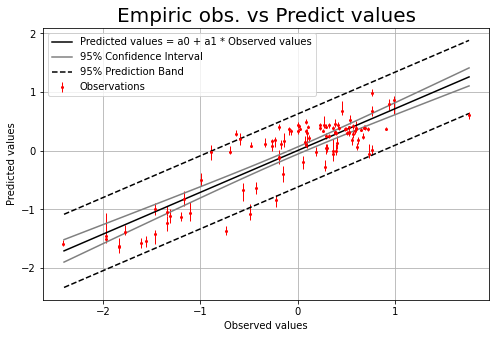

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-2.4, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [25]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: %_cover: mean - 0.148, median - 0.148, CI - [0.117-0.181]

SHAP-values for: mf_chm_MAX: mean - 0.26, median - 0.286, CI - [0.164-0.339]

SHAP-values for: mf_chm_MEAN: mean - 0.163, median - 0.15, CI - [0.109-0.231]



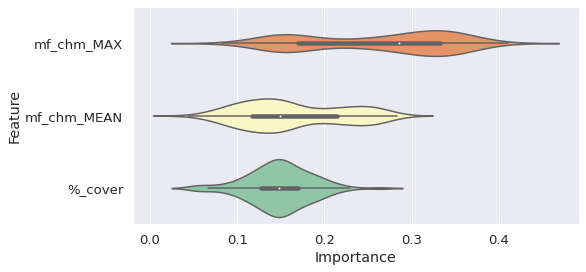

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['mf_chm_MAX', 'mf_chm_MEAN', '%_cover', ])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [30]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 28.2, median: 19.0,
 pred. interval (P(0.025)-P(0.975)): 5.0-89.0, 
 conf. interval (p-value=0.95): 10.872-47.898 
***
Aggregate bias statistic: 
 mean: 0.021, median: 0.018,
 pred. interval (P(0.025)-P(0.975)): -0.118-0.164, 
 conf. interval (p-value=0.95): -0.039-0.087 
***
Aggregate RMSE statistic: 
 mean: 0.385, median: 0.385, pred. interval (P(0.025)-P(0.975)): 0.268-0.519, 
 conf. interval (p-value=0.95): 0.326-0.447 
***
Aggregate MSE statistic: 
 mean: 0.153, median: 0.148, pred. interval (P(0.025)-P(0.975)): 0.072-0.269, 
 conf. interval (p-value=0.95): 0.107-0.2 
***
Aggregate R^2 statistic: 
 mean: 0.718, median: 0.745, pred. interval (P(0.025)-P(0.975)): 0.267-0.878, 
 conf. interval (p-value=0.95): 0.655-0.812 
***
Aggregate bias(%) statistic: 
 mean: -9.169, median: -15.571, pred. interval (P(0.025)-P(0.975)): -309.273-309.31, 
 conf. interval (p-value=0.95): -72.745-4

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

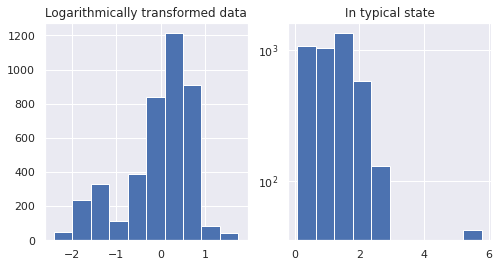

In [31]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [32]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-2, -1, -0.5, 0, 0.5, 1, 2])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 0.5, 1, 1.5, 2, 4])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

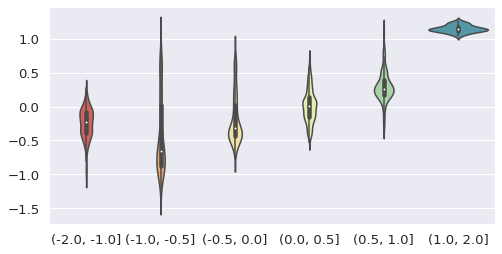

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [ ]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

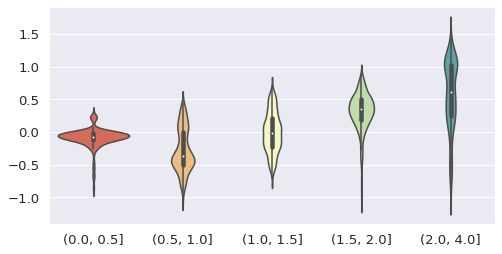

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

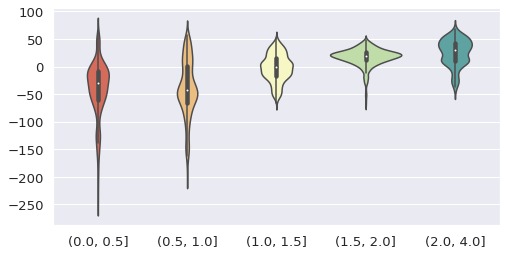

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [37]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [38]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [39]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:0.82917
[1]	validation_0-rmse:0.71362
[2]	validation_0-rmse:0.61983
[3]	validation_0-rmse:0.54189
[4]	validation_0-rmse:0.48029
[5]	validation_0-rmse:0.43150
[6]	validation_0-rmse:0.39382
[7]	validation_0-rmse:0.36795
[8]	validation_0-rmse:0.34276


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.32434
[10]	validation_0-rmse:0.31387
[11]	validation_0-rmse:0.30279
[12]	validation_0-rmse:0.29481
[13]	validation_0-rmse:0.28764
[14]	validation_0-rmse:0.28261
[15]	validation_0-rmse:0.27989
[16]	validation_0-rmse:0.27625
[17]	validation_0-rmse:0.27355
[18]	validation_0-rmse:0.26878
[19]	validation_0-rmse:0.26720
[20]	validation_0-rmse:0.26561
[21]	validation_0-rmse:0.26554
[22]	validation_0-rmse:0.26548
[23]	validation_0-rmse:0.26545
[24]	validation_0-rmse:0.26542
[25]	validation_0-rmse:0.26541
[26]	validation_0-rmse:0.26539
[27]	validation_0-rmse:0.26539
[28]	validation_0-rmse:0.26538
[29]	validation_0-rmse:0.26538
[30]	validation_0-rmse:0.26538
[31]	validation_0-rmse:0.26538
[32]	validation_0-rmse:0.26538
[33]	validation_0-rmse:0.26133
[34]	validation_0-rmse:0.26133
[35]	validation_0-rmse:0.26133
[36]	validation_0-rmse:0.26133
[37]	validation_0-rmse:0.26133
[38]	validation_0-rmse:0.26133
[39]	validation_0-rmse:0.26133
[40]	validation_0-rmse:0.26133
[41]	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [40]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 113


In [41]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

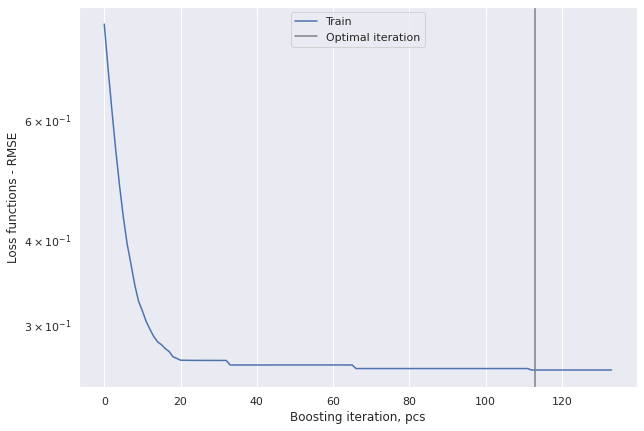

In [42]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [43]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -0.05
RMSE: 0.3
Relative RMSE(%):  -405.452
MSE: 0.1
R square: 89.5%


In [44]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.898
Uncertainty
a0: -0.010+/-0.022
a1: 0.841+/-0.028


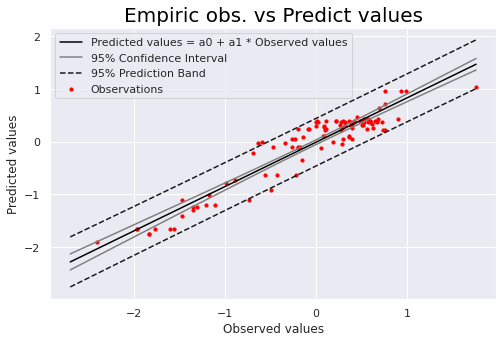

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-2.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

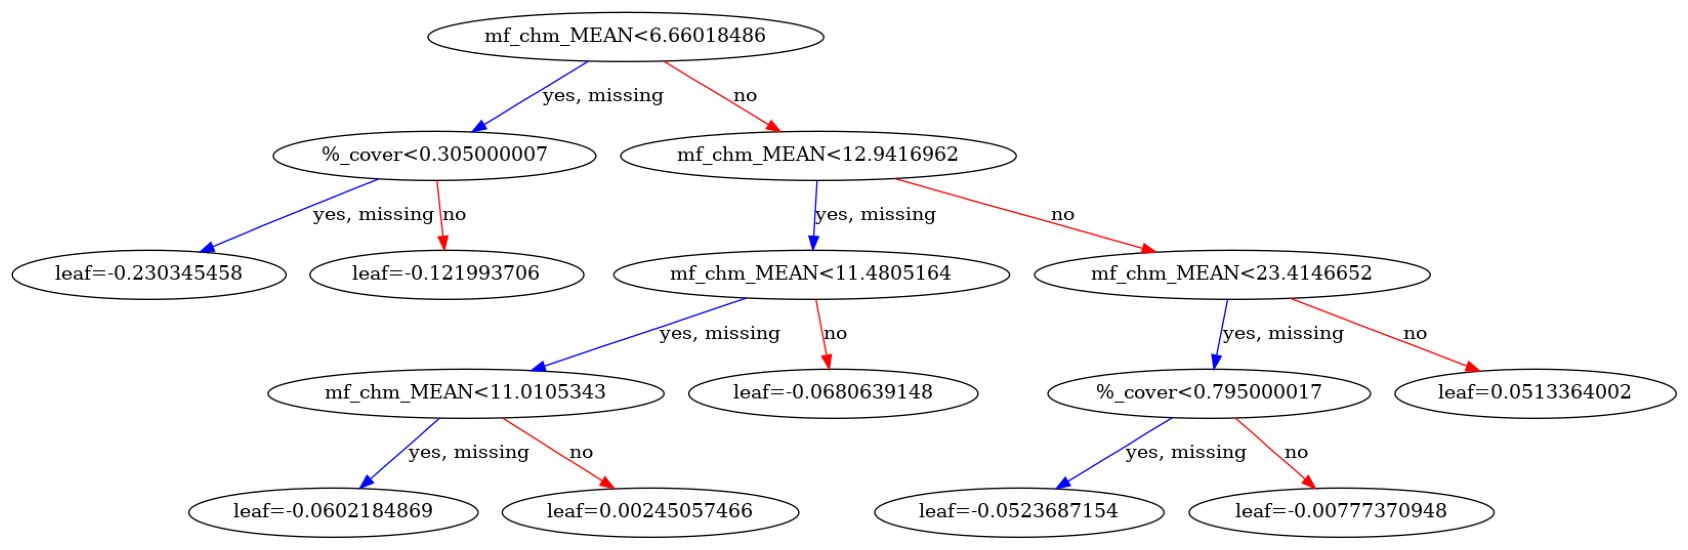

In [49]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

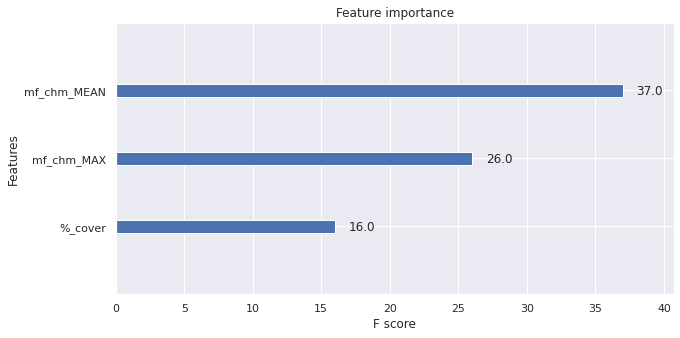

In [51]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

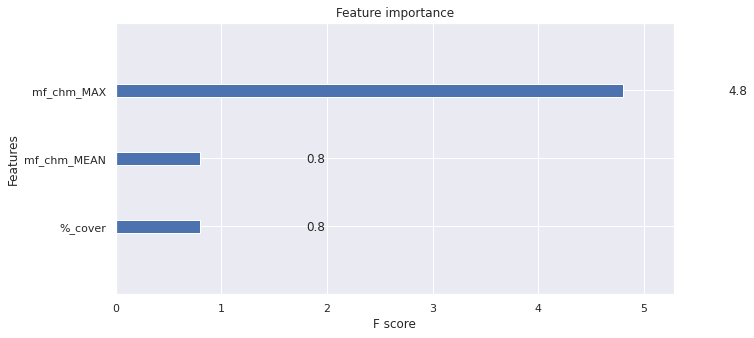

In [52]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

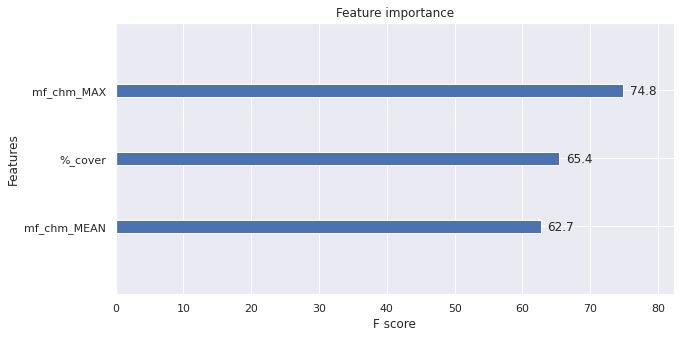

In [53]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [54]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


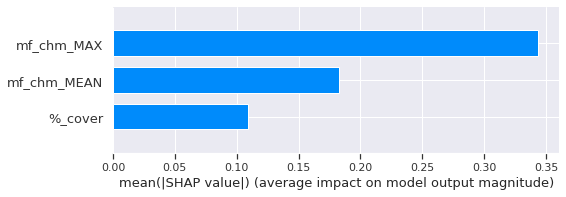

In [55]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

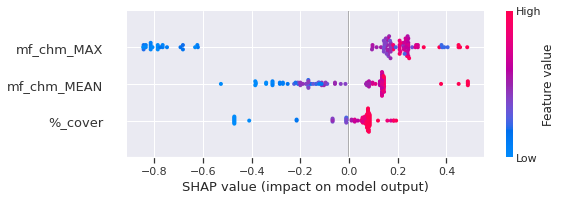

In [56]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

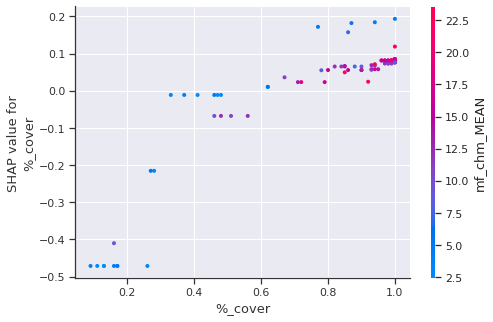

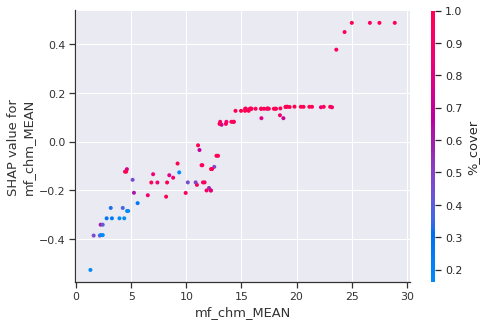

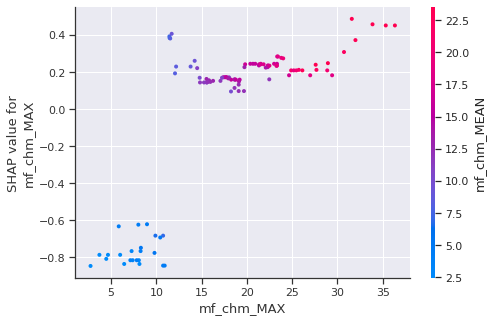

In [57]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [58]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/04_LN_Mbranch_CHM_without_RGB_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/04_LN_Mbranch_CHM_without_RGB_XGB_model.txt")